# EDA of Credit Data 
## By Ethan Ericson

This notebook performs exploratory data analysis on the Lending Club Dataset

## Notes: 

### Goals
-------------------
- We could gear our project to focus on evaluating how good of a predictor variables are of predicting if someone will fully pay off loan. 

- We could also predict how many current loans turn into fully paid

- This will help Customer Marketing determine target market and adapt their strategy accordingly.

- This will help Revolving Lines of Credit by illustrating the variables that make a loan "good", giving them areas of focus when conferring with individuals who have are likely to default. 
-------------------

### Variables
-------------------
- I am looking at annual_inc, which is self-reported income provided by borrower during registration. 

- annual_inc_joint might be interesting to look into, as it would tell me if co-borrowing increasing liklihood you will pay off loan. 
    - seperate by application_type if I try this

- grade is a good way to get an overview of what types of people fully pay off their loans. The aim of our project could potentially be figuring out how good a predictor grade is of fully paying off loan. 

- deling_2yrs is a good way to see how reliably someone made their payments while they had the loan. 
    - Test if high deling_2yrs values are outliers or the norm.
    - Pair with collections_12_mths_ex_med

- desc sentiment analysis would be SUPER COOL! We can look at the descs of people that fully paid off their loans and find out if there are keywords used within their response that indcates a higher liklihood to pay off a loan. 
    - We can also use this info to figure out loan purpose.

- earliest_cr_line would be good for seeing if the length someone has used LC has anything to do with them fully paying back their loans

- emp_length is valuable to investigate if emplyment length has anything to do with ability to pay back loans

- installments can be used to see if people who pay off loans have lower installments

- int_rate can be used for the same as installments

- verfication_status can be used to see if verfied or source verified incomes are more likely to pay off loans

- issue_d could indicate if there is an ideal time of year to take out a loan

-------------------
### Team Responsibilities
- Harvy: Loan-related factors - Loan amount, interest rate, loan term. 
- Andrew: Credit History - Number of delinquencies, inquiries, and public records
- Ethan Styles: Personal Demographics - Age, homeownership status, verfication status
- Ethan Ericson: Financial Indicators - Annual income, debt-to-income ratio, employment length, credit history. 

## Setup

In [1]:
# Import pandas for data processing and organization
import pandas as pd
# Import matplotlib for graphing
import matplotlib.pyplot as plt
# Import seaborn for pretty graphs
import seaborn as sns
# Import numpy for numbers stuff
import numpy as np

### Import Dataset

In [2]:
# Read in data
df = pd.read_csv("Dataset/LendingClub_Data.csv")

C:\Users\shade\AppData\Local\Temp\ipykernel_13384\434015454.py:2: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset/LendingClub_Data.csv")


In [3]:
# View data
df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0          54734      80364      25000        25000     19080.057200   
1          55521     107577       1000         1000         0.000000   
2          55742     114426       7000         7000       672.803839   
3          56413     129814       7000         7000         0.007494   
4          56705     133361      11000        11000     11000.000000   
...          ...        ...        ...          ...              ...   
887374  68616873   73519699       8000         8000      8000.000000   
887375  68616891   73519717      24000        24000     24000.000000   
887376  68616919   73519746      15000        15000     15000.000000   
887377  68617034   73519870      14650        14650     14650.000000   
887378  68617057   73519894      15000        15000     15000.000000   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
0        36 months     11.89       829.10     B        B4  ...          NaN   
1        36 months     16.08        35.20     F        F2  ...          NaN   
2        36 months     10.71       228.22     B        B5  ...          NaN   
3        36 months     16.08       246.38     F        F2  ...          NaN   
4        36 months      9.99       354.89     B        B3  ...          NaN   
...            ...       ...          ...   ...       ...  ...          ...   
887374   36 months     11.48       263.74     B        B5  ...     106748.0   
887375   36 months     11.48       791.20     B        B5  ...          0.0   
887376   36 months      5.32       451.73     A        A1  ...      11138.0   
887377   60 months     20.50       392.23     E        E4  ...      51435.0   
887378   60 months     10.78       324.50     B        B4  ...      71557.0   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
0          NaN         NaN          NaN        NaN      NaN              NaN   
1          NaN         NaN          NaN        NaN      NaN              NaN   
2          NaN         NaN          NaN        NaN      NaN              NaN   
3          NaN         NaN          NaN        NaN      NaN              NaN   
4          NaN         NaN          NaN        NaN      NaN          23500.0   
...        ...         ...          ...        ...      ...              ...   
887374    72.2         0.0          2.0     4725.0     48.8          18000.0   
887375     NaN         0.0          0.0     8641.0     86.5          26400.0   
887376    44.6         2.0          3.0     6299.0     22.6          78800.0   
887377    91.0         0.0          0.0    10159.0     92.7          11200.0   
887378    80.6         1.0          2.0     8415.0     75.6          35400.0   

       inq_fi total_cu_tl inq_last_12m  
0         NaN         NaN          NaN  
1         NaN         NaN          NaN  
2         NaN         NaN          NaN  
3         NaN         NaN          NaN  
4         NaN         NaN          NaN  
...       ...         ...          ...  
887374    0.0         0.0          1.0  
887375    0.0         0.0          0.0  
887376    0.0         2.0          0.0  
887377    0.0         0.0          0.0  
887378    0.0         1.0          1.0  

[887379 rows x 74 columns]

### Data Cleaning

In [4]:
# Drop missing values off the end of the df, error from sheets
cleaned_df = df.dropna(how = "all").copy()

# Checking for missing values
missing_values = cleaned_df.isnull().sum()
print(missing_values)

# Some missing values the result of a loan being joint or individual; therefore, I will clean individual features as needed later

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 74, dtype: int64


In [5]:
# Check for duplicates
duplicates_df = cleaned_df[cleaned_df.duplicated(subset = ["id"])].copy()

duplicates_df

# NO DUPLICATES

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m]
Index: []

[0 rows x 74 columns]

In [6]:
# Factorize Loan Statuses with dictionary map
status_map = {
    "Fully Paid" : "Fully Paid", 
    "Does not meet the credit policy. Status:Fully Paid" : "Fully Paid",
    "Charged Off" : "Charged Off / Default",
    "Does not meet the credit policy. Status:Charged Off" : "Charged Off / Default",
    "Default" : "Charged Off / Default",
    "Current" : "Current", 
    "In Grace Period" : "In Grace Period / Late",
    "Late (16-30 days)" : "In Grace Period / Late",
    "Late (31-120 days)" : "In Grace Period / Late",
    "Issued" : "Issued"
}

# Create factorized_status column representing loan groups
cleaned_df["factorized_status"] = cleaned_df["loan_status"].map(status_map).astype("category")

# Check that I got them all converted
print(cleaned_df["factorized_status"].isnull().sum())


0


In [7]:
# Print out cleaned data frame
cleaned_df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0          54734      80364      25000        25000     19080.057200   
1          55521     107577       1000         1000         0.000000   
2          55742     114426       7000         7000       672.803839   
3          56413     129814       7000         7000         0.007494   
4          56705     133361      11000        11000     11000.000000   
...          ...        ...        ...          ...              ...   
887374  68616873   73519699       8000         8000      8000.000000   
887375  68616891   73519717      24000        24000     24000.000000   
887376  68616919   73519746      15000        15000     15000.000000   
887377  68617034   73519870      14650        14650     14650.000000   
887378  68617057   73519894      15000        15000     15000.000000   

              term  int_rate  installment grade sub_grade  ... il_util  \
0        36 months     11.89       829.10     B        B4  ...     NaN   
1        36 months     16.08        35.20     F        F2  ...     NaN   
2        36 months     10.71       228.22     B        B5  ...     NaN   
3        36 months     16.08       246.38     F        F2  ...     NaN   
4        36 months      9.99       354.89     B        B3  ...     NaN   
...            ...       ...          ...   ...       ...  ...     ...   
887374   36 months     11.48       263.74     B        B5  ...    72.2   
887375   36 months     11.48       791.20     B        B5  ...     NaN   
887376   36 months      5.32       451.73     A        A1  ...    44.6   
887377   60 months     20.50       392.23     E        E4  ...    91.0   
887378   60 months     10.78       324.50     B        B4  ...    80.6   

       open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0              NaN         NaN         NaN      NaN              NaN    NaN   
1              NaN         NaN         NaN      NaN              NaN    NaN   
2              NaN         NaN         NaN      NaN              NaN    NaN   
3              NaN         NaN         NaN      NaN              NaN    NaN   
4              NaN         NaN         NaN      NaN          23500.0    NaN   
...            ...         ...         ...      ...              ...    ...   
887374         0.0         2.0      4725.0     48.8          18000.0    0.0   
887375         0.0         0.0      8641.0     86.5          26400.0    0.0   
887376         2.0         3.0      6299.0     22.6          78800.0    0.0   
887377         0.0         0.0     10159.0     92.7          11200.0    0.0   
887378         1.0         2.0      8415.0     75.6          35400.0    0.0   

       total_cu_tl inq_last_12m      factorized_status  
0              NaN          NaN             Fully Paid  
1              NaN          NaN             Fully Paid  
2              NaN          NaN             Fully Paid  
3              NaN          NaN  Charged Off / Default  
4              NaN          NaN                Current  
...            ...          ...                    ...  
887374         0.0          1.0                 Issued  
887375         0.0          0.0                 Issued  
887376         2.0          0.0                 Issued  
887377         0.0          0.0                 Issued  
887378         1.0          1.0                 Issued  

[887379 rows x 75 columns]

## EDA

### Setup

#### Cleaning Functions

In [8]:
# Pre-Clean Data
def clean_feature_and_groupers(feature, purpose, status):
    
    # Take out null values from features and groups
    feature_df = cleaned_df.dropna(subset= [feature, purpose, status]).copy()

    # Check
    print(f"Nulls in {feature}: " + str(feature_df[feature].isnull().sum()))
    print(f"Nulls in {purpose}: " + str(feature_df[purpose].isnull().sum()))
    print(f"Nulls in {status}: " + str(feature_df[status].isnull().sum()))

    return(feature_df)

# Remove Outliers function
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data >= lower_bound) & (data <= upper_bound)]

#### Groups Initialization

In [9]:
# List of loan statuses
statuses = ["Fully Paid", "Charged Off / Default", "Current", "In Grace Period / Late", "Issued"] # Explicitly listed b/c I care about the order

# List of purposes
purposes = cleaned_df["purpose"].unique()

#### Calculation Functions

##### Calculate Total Individuals Function

In [10]:
def calculate_total_individuals(feature, feature_df, statuses, purposes, trim):   

    # Check if purposes is null
    if(purposes == "null"):

        # Total Individuals across all subsets
        total_individuals = 0

        # Use a for loop to go through each element of statuses from earlier
        for status in statuses:

            # For each of the statuses, filter the cleaned income and create a subset dataframe to plot
            subset_df = feature_df[(feature_df['factorized_status'] == status)].copy()

            # Make sure we don't have any empty subsets that we try to graph
            if(len(subset_df) > 0):
                    
                if(trim):
                    # Remove outliers from feature data
                    subset_df[feature] = remove_outliers(subset_df[feature])

                # Calculating the total amount of individuals across all subsets
                total_individuals += len(subset_df[feature])
        
        return total_individuals
    
    # Else generate visualizations with purpose
    else:
        # Total Individuals across all subsets
        total_individuals = 0

        # Use a for loop to go through each element of statuses from earlier and purporses
        for purpose in purposes:
            for status in statuses:

                # For each of the statuses, filter the cleaned income and create a subset dataframe to plot
                subset_df = feature_df[(feature_df['factorized_status'] == status) & (feature_df["purpose"] == purpose)].copy()

                # Make sure we don't have any empty subsets that we try to graph
                if(len(subset_df) > 0):
                        
                    if(trim):
                        # Remove outliers from feature data
                        subset_df[feature] = remove_outliers(subset_df[feature])

                    # Calculating the total amount of individuals across all subsets
                    total_individuals += len(subset_df[feature])
        
        return total_individuals

#### Visulization Functions

##### Visualize Feature Function

In [11]:
def feature_visualization(feature, feature_df, statuses, purposes, total_individuals, bin_max_x, mean_lower, mean_upper, trim):

    #Check if purposes not given
    if(purposes == "null"):

        # Means List
        mean_feature_values = []

        # Total Individuals within each subset
        subset_individuals = 0

        # Number of Bins
        num_bins = 10

        # Determine the number of plots needed based on the number of statuses 
        num_plots = len(statuses)

        # Calculate the number of rows and columns needed for the subplots
        num_cols = 2
        num_rows = int(np.ceil(num_plots / num_cols))

        # Get figure reference and axes for indexing
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

        # Adjust spacing
        plt.subplots_adjust(wspace=0.5, hspace=0.5)

        # Set plot index (iterator)
        plot_index = 0

        # Use a for loop to go through each element of statuses from earlier and purporses
        for status in statuses:

            # For each of the statuses, filter the cleaned feature and create a subset dataframe to plot
            subset_df = feature_df[(feature_df['factorized_status'] == status)].copy()
            
            # Make sure we don't have any empty subsets that we try to graph
            if(len(subset_df) > 0):
            
                if(trim == True):
                    
                    # Remove outliers from income data
                    subset_df[feature] = remove_outliers(subset_df[feature])

                # Calculating the amount of individuals within each subset
                subset_individuals = len(subset_df[feature])

                # Calculate mean feature value
                mean_feature_value = subset_df[feature].mean()
                
                # Add to a list of mean feature values to graph distribution
                mean_feature_values.append(mean_feature_value)

                # Create a histogram for the distribution of feature values (np.linspace creates evenly spaced bin edges) (ax argument is the location in the subplot)
                plot = sns.histplot(data = subset_df, x = feature, bins = np.linspace(0, bin_max_x, num_bins), ax = axes[plot_index // num_cols, plot_index % num_cols])

                # Rotate x-axis labels and right justify
                plot.tick_params(axis='x', labelrotation=45)

                # Labels and Aesthetics
                axes[plot_index // num_cols, plot_index % num_cols].set_title(f"Loan Status: {status}")
                axes[plot_index // num_cols, plot_index % num_cols].set_xlabel(feature)
                axes[plot_index // num_cols, plot_index % num_cols].set_ylabel("Frequency")

                # Annotate histplot with percentage of individuals
                plot.text(plot.get_xlim()[1]*0.99, plot.get_ylim()[1]*0.8, f"% of Total Borrowers: {100 * (subset_individuals / total_individuals):.2f}%", ha = "right")

                # Annotate histplot with mean income
                plot.axvline(mean_feature_value, color='r', linestyle='--', linewidth=2, label=f'Mean {feature}: {mean_feature_value:.2f}')
                plot.legend(fontsize = "small")
                
                plot_index += 1

            else:
                print(f"This subset is empty: \nStatus: {status}\n")
                    

        # Plot the boxplot distribution
        sns.boxplot(mean_feature_values)
        plt.ylabel('Mean Values')
        plt.title(f'Mean {feature} Distribution')
        plt.ylim(mean_lower, mean_upper)

        plt.show()

    # Else generate visualizations with purpose
    else:

        # Means List
        mean_feature_values = []

        # Total Individuals within each subset
        subset_individuals = 0

        # Number of Bins
        num_bins = 10

        # Determine the number of plots needed based on the number of combinations of statuses and purposes
        num_plots = len(statuses) * len(purposes)

        # Calculate the number of rows and columns needed for the subplots
        num_cols = 2
        num_rows = int(np.ceil(num_plots / num_cols))

        # Get figure reference and axes for indexing
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

        # Adjust spacing
        plt.subplots_adjust(wspace=0.5, hspace=0.5)

        # Set plot index (iterator)
        plot_index = 0

        # Use a for loop to go through each element of statuses from earlier and purporses
        for purpose in purposes:
            for status in statuses:

                # For each of the statuses, filter the cleaned feature and create a subset dataframe to plot
                subset_df = feature_df[(feature_df['factorized_status'] == status) & (feature_df["purpose"] == purpose)].copy()
                
                # Make sure we don't have any empty subsets that we try to graph
                if(len(subset_df) > 0):
                
                    if(trim == True):
                        # Remove outliers from income data
                        subset_df[feature] = remove_outliers(subset_df[feature])

                    # Calculating the amount of individuals within each subset
                    subset_individuals = len(subset_df[feature])

                    # Calculate mean feature value
                    mean_feature_value = subset_df[feature].mean()
                    
                    # Add to a list of mean feature values to graph distribution
                    mean_feature_values.append(mean_feature_value)

                    # Create a histogram for the distribution of feature values (np.linspace creates evenly spaced bin edges) (ax argument is the location in the subplot)
                    plot = sns.histplot(data = subset_df, x = feature, bins = np.linspace(0, bin_max_x, num_bins), ax = axes[plot_index // num_cols, plot_index % num_cols])

                    # Rotate x-axis labels and right justify
                    plot.tick_params(axis='x', labelrotation=45)

                    # Labels and Aesthetics
                    axes[plot_index // num_cols, plot_index % num_cols].set_title(f"Loan Status: {status} | Purpose: {purpose}")
                    axes[plot_index // num_cols, plot_index % num_cols].set_xlabel(feature)
                    axes[plot_index // num_cols, plot_index % num_cols].set_ylabel("Frequency")

                    # Annotate histplot with percentage of individuals
                    plot.text(plot.get_xlim()[1]*0.99, plot.get_ylim()[1]*0.8, f"% of Total Borrowers: {100 * (subset_individuals / total_individuals):.2f}%", ha = "right")

                    # Annotate histplot with mean income
                    plot.axvline(mean_feature_value, color='r', linestyle='--', linewidth=2, label=f'Mean {feature}: {mean_feature_value:.2f}')
                    plot.legend(fontsize = "small")
                    
                    plot_index += 1

                else:
                    print(f"This subset is empty: \nStatus: {status}\nPurpose: {purpose}\n")
                    

        # Plot the boxplot distribution
        sns.boxplot(mean_feature_values)
        plt.ylabel('Mean Values')
        plt.title(f'Mean {feature} Distribution')
        plt.ylim(mean_lower, mean_upper)

        plt.show()
    
        


### Loan Status Distribution

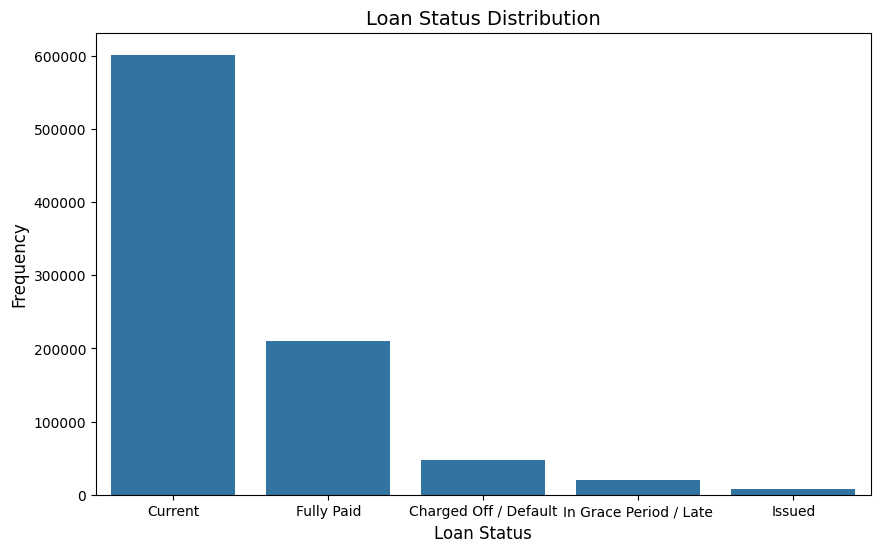

In [12]:
# Adjusting figure size
plt.figure(figsize = (10, 6))

# Creating the distribution
sns.countplot(cleaned_df, x = "factorized_status", order= pd.Series(cleaned_df["factorized_status"]).value_counts().index) # Sorts by most frequent

# Labels and Aesthetics
plt.title("Loan Status Distribution", fontsize = 14)
plt.xlabel("Loan Status", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)

plt.show()

### Loan Purpose Distribution

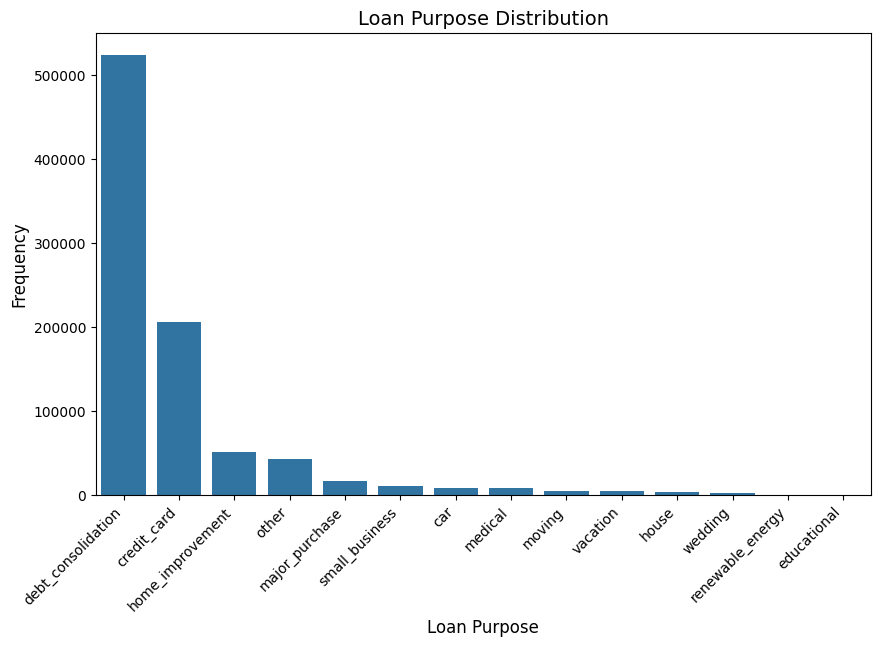

In [13]:
# Adjusting figure size
plt.figure(figsize = (10, 6))

# Creating the distribution
sns.countplot(cleaned_df, x = "purpose", order= pd.Series(cleaned_df["purpose"]).value_counts().index) # Sorts by most frequent

# Labels and Aesthetics
plt.title("Loan Purpose Distribution", fontsize = 14)
plt.xlabel("Loan Purpose", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.xticks(rotation=45, ha = "right")

plt.show()

### Income Distributions

#### Cleaning 

In [14]:
# Cleaning annual_inc and the purpose / loan_status)
annual_inc_df = clean_feature_and_groupers("annual_inc", "purpose", "loan_status" )

Nulls in annual_inc: 0
Nulls in purpose: 0
Nulls in loan_status: 0


#### Income Distribution by Loan Status

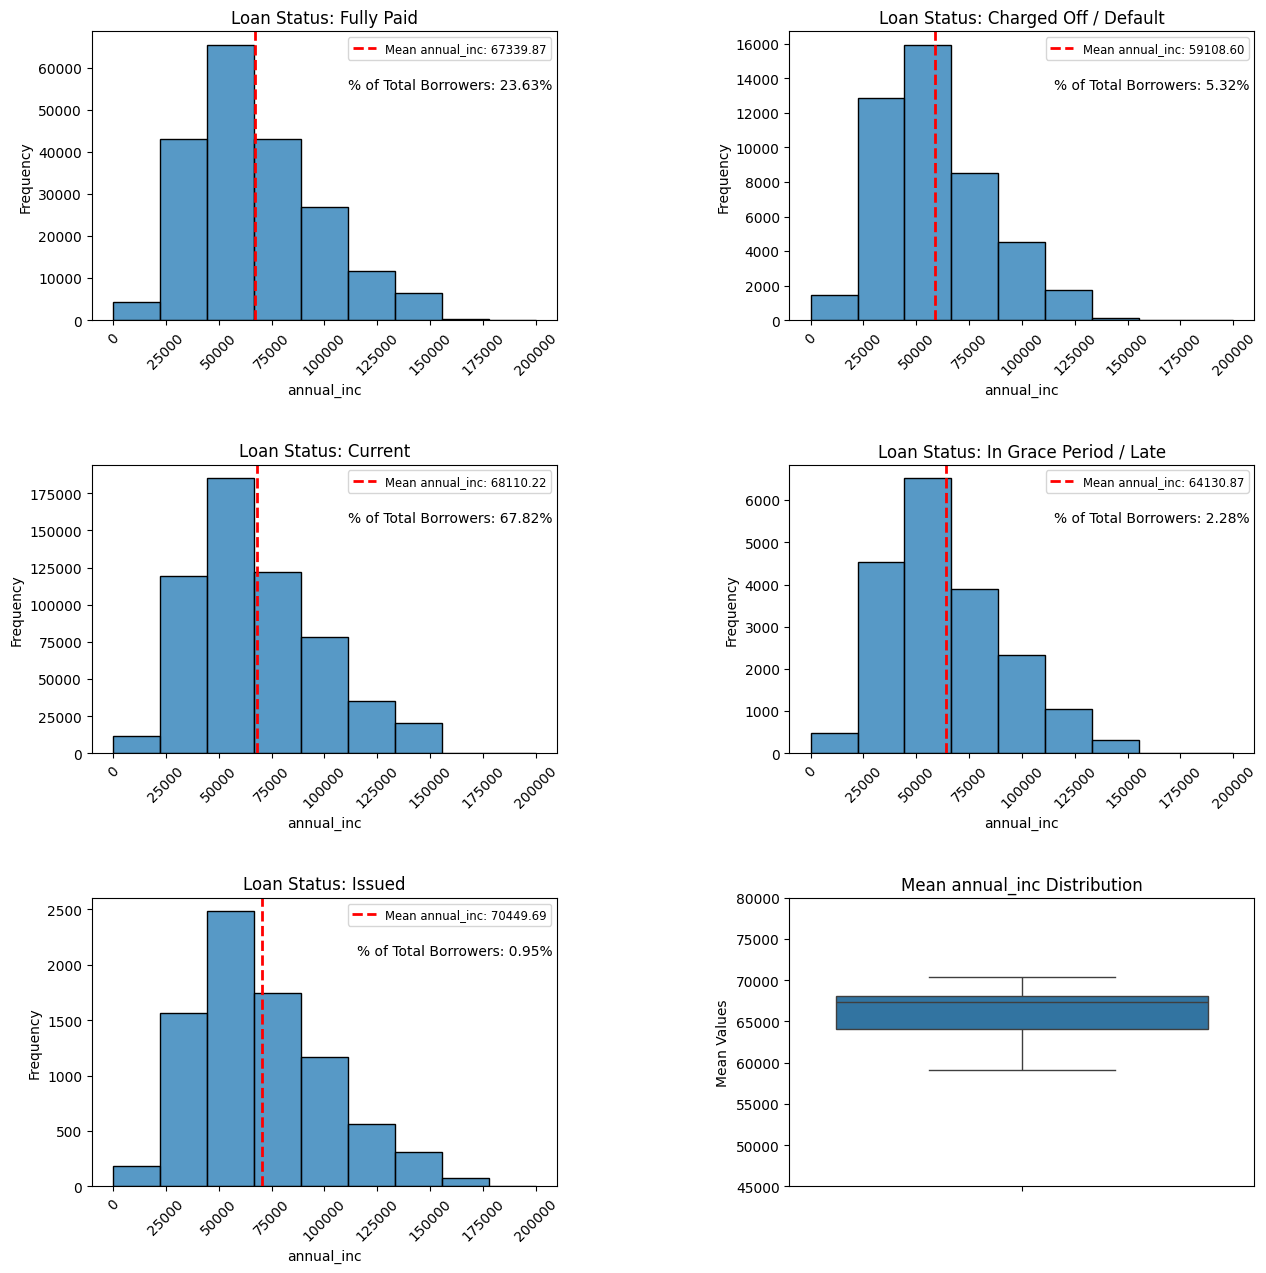

In [15]:
# Calling the feature by status visualization function
feature_visualization("annual_inc", annual_inc_df, statuses, "null", calculate_total_individuals("annual_inc", annual_inc_df, statuses, "null", True), 200000, 45000, 80000, True)    

#### Income Distribution by Loan Status and Loan Purpose

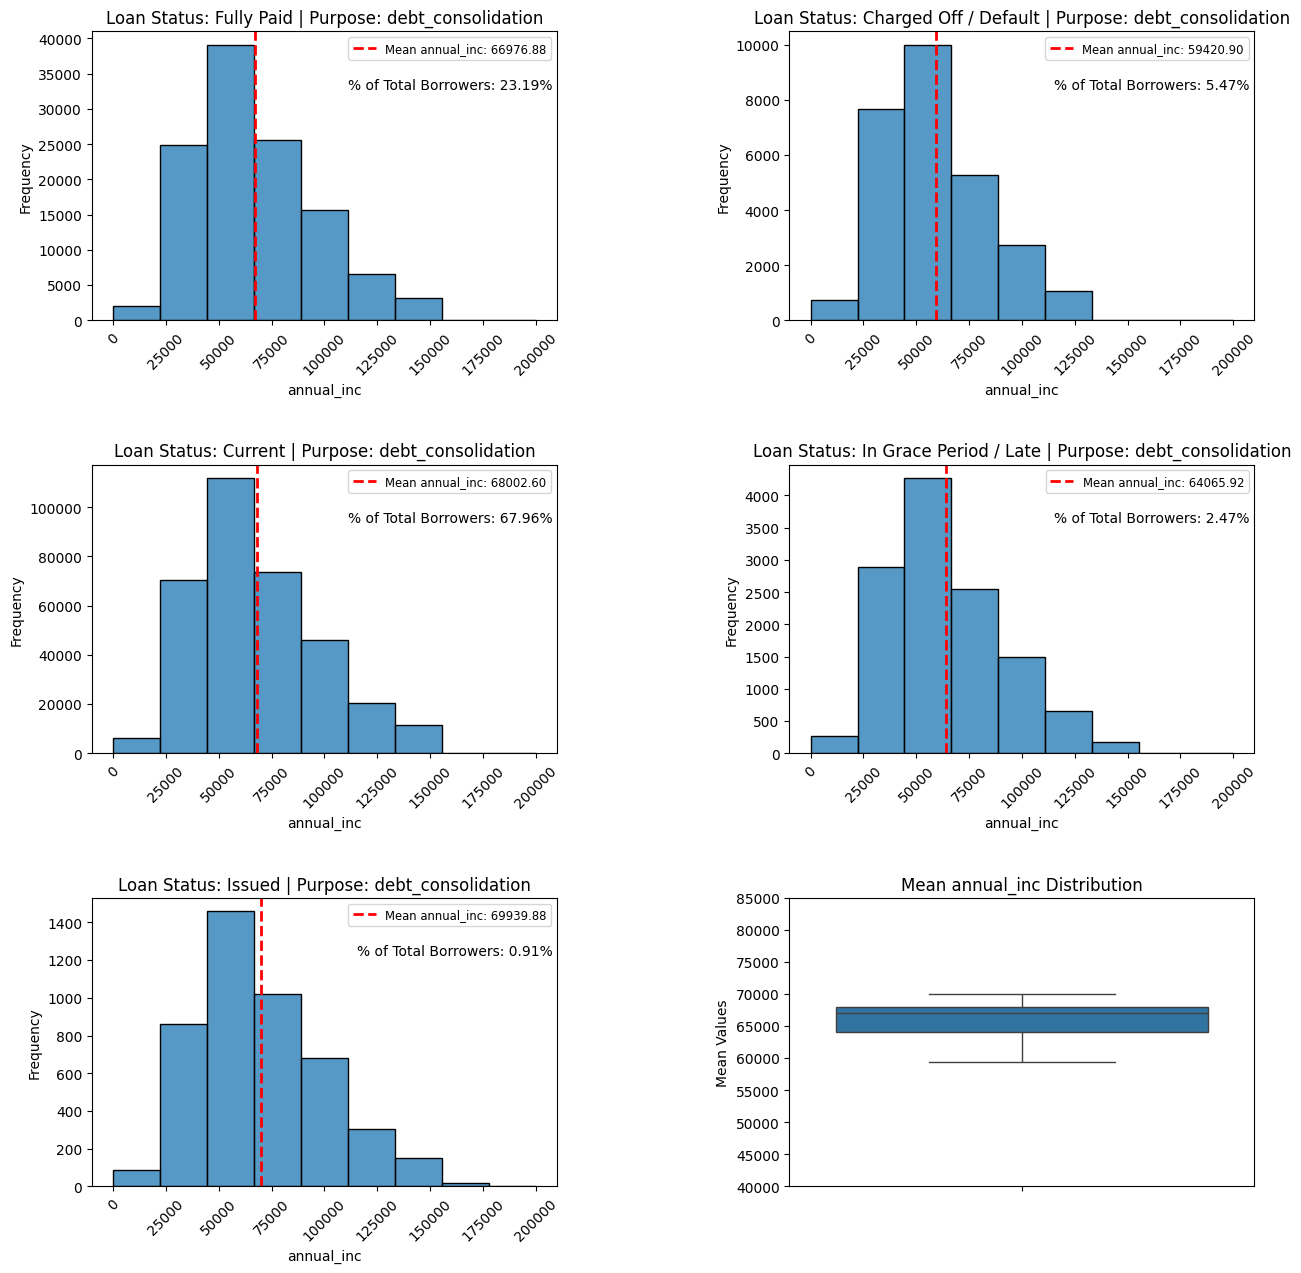

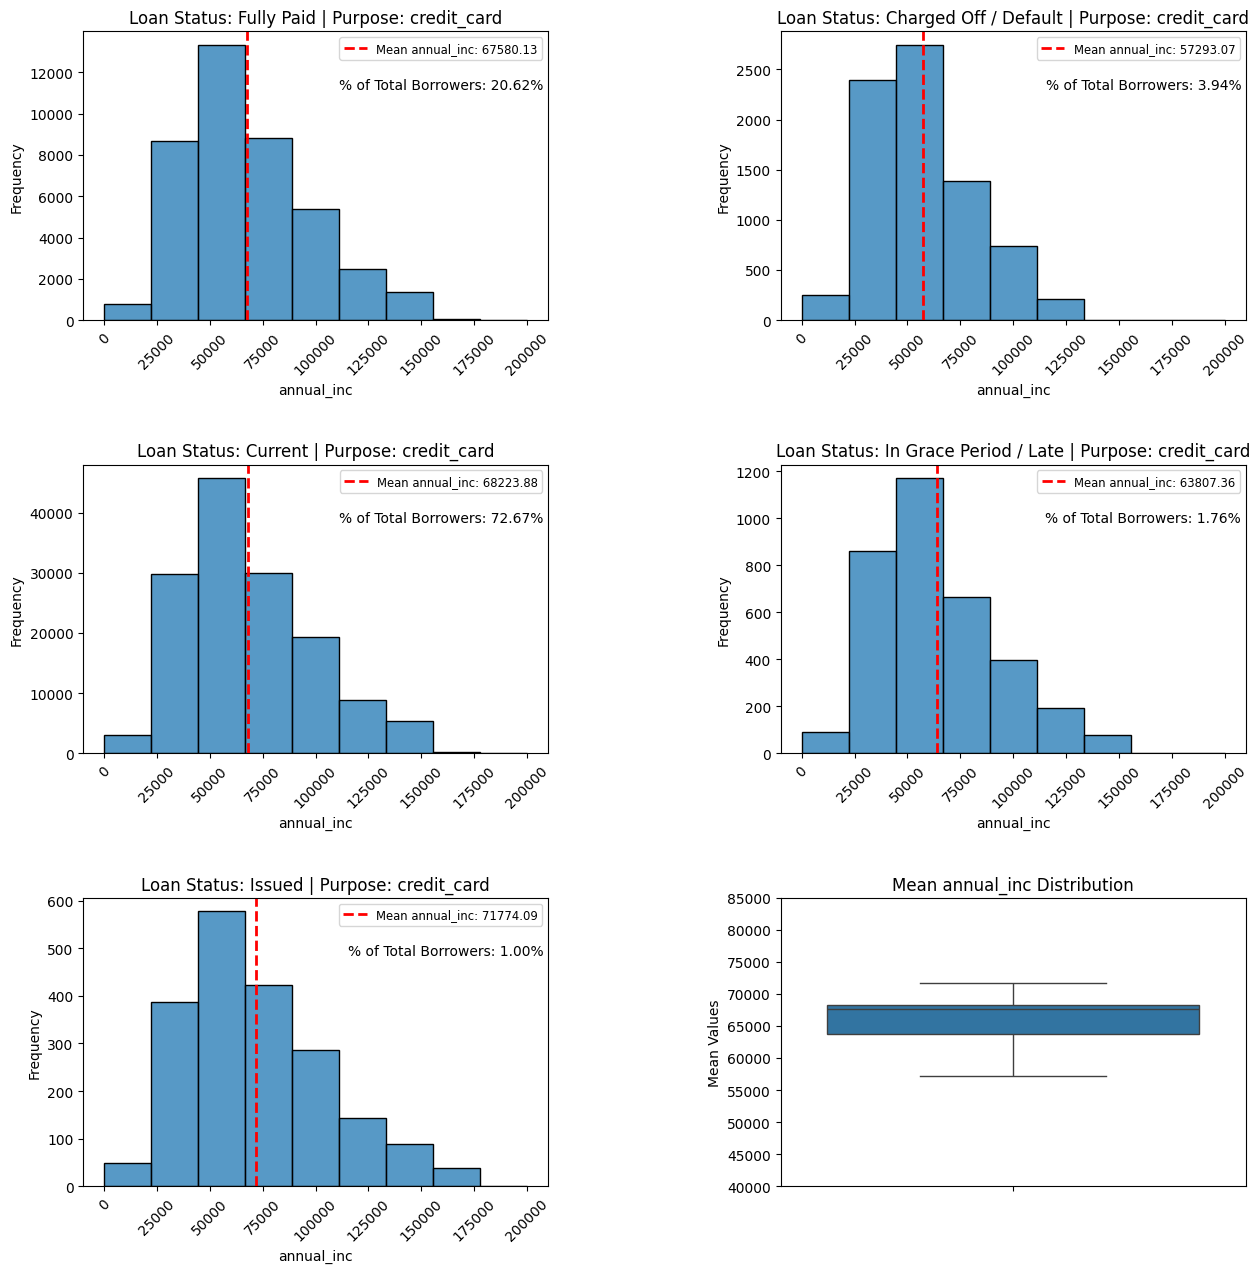

This subset is empty: 
Status: In Grace Period / Late
Purpose: educational

This subset is empty: 
Status: Issued
Purpose: educational



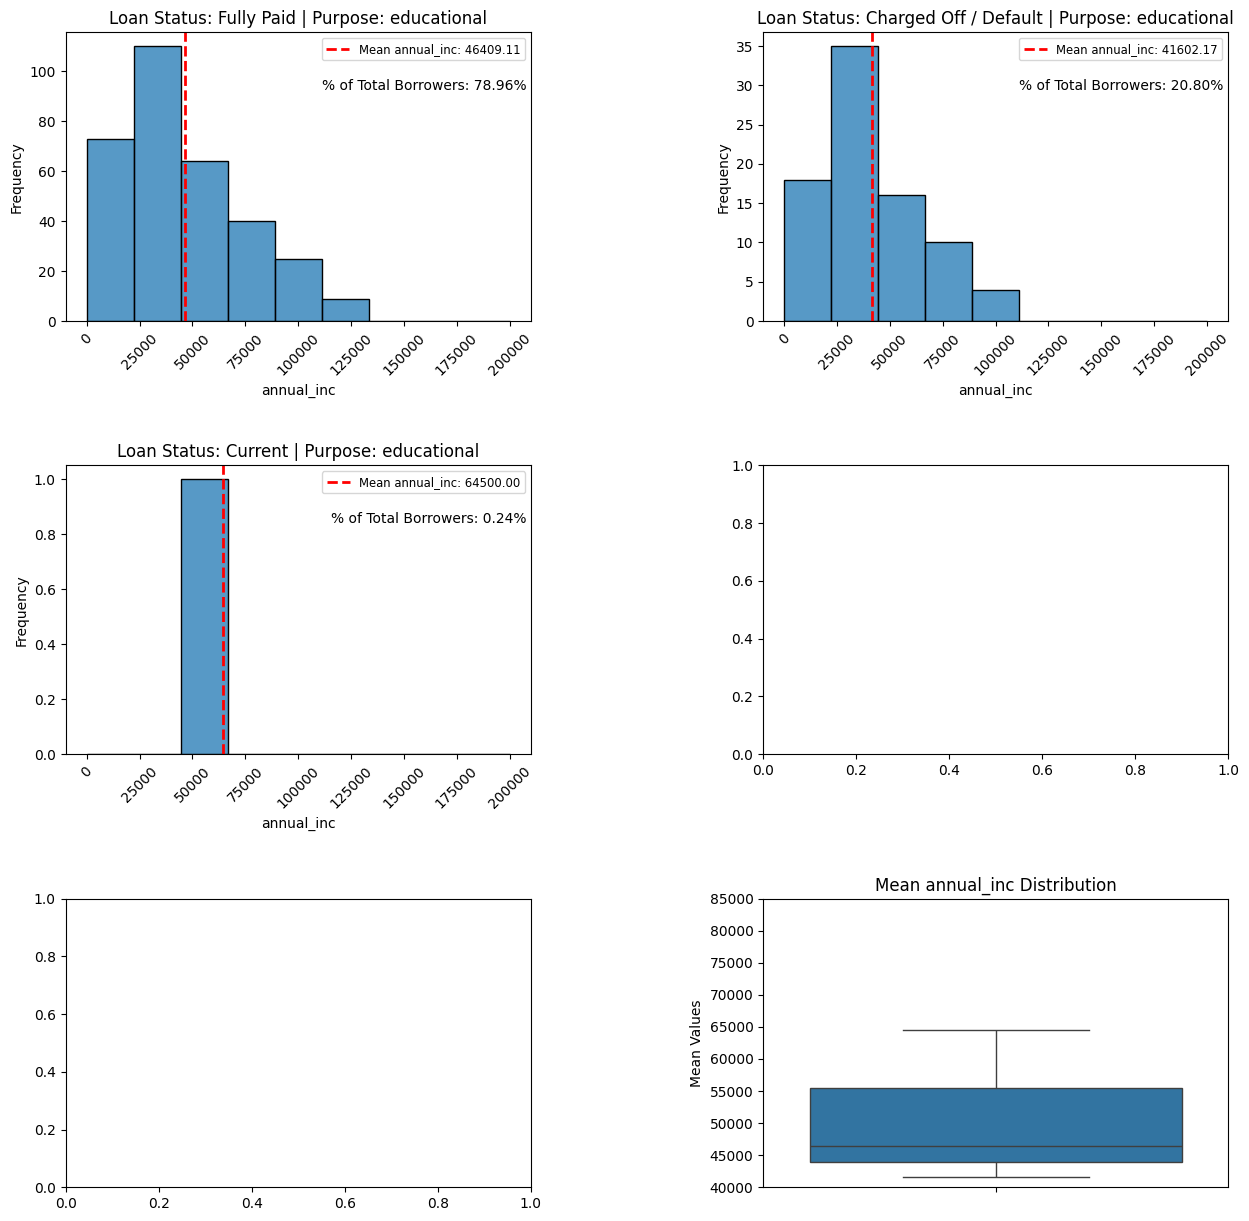

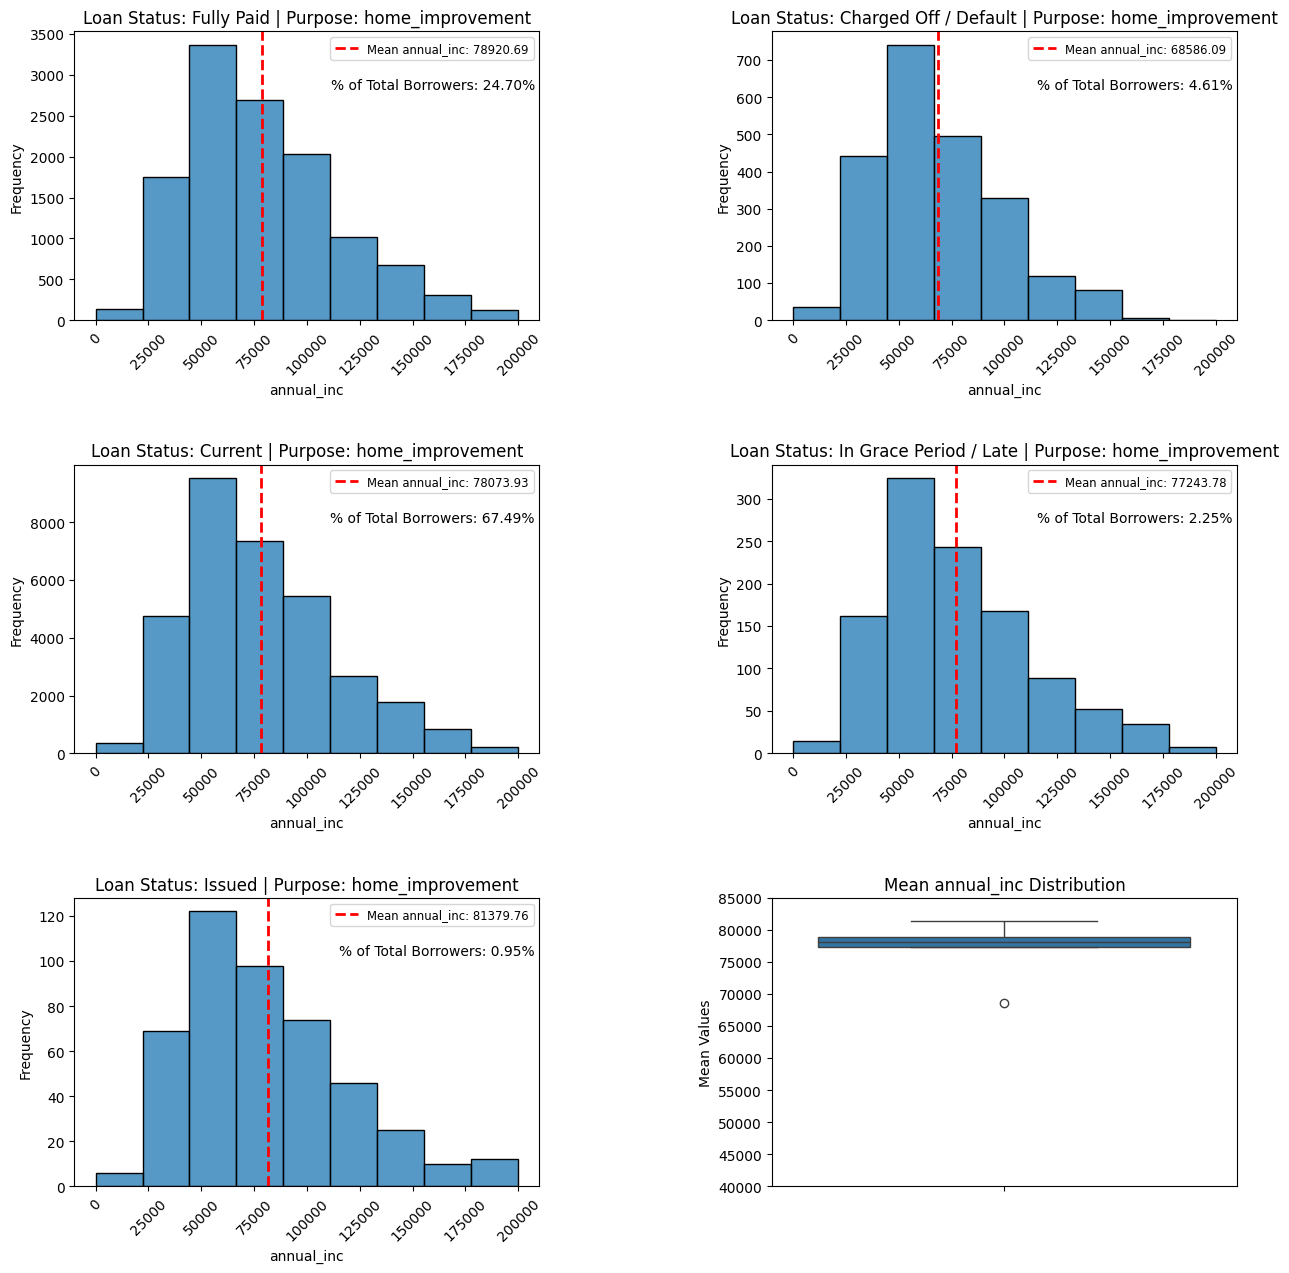

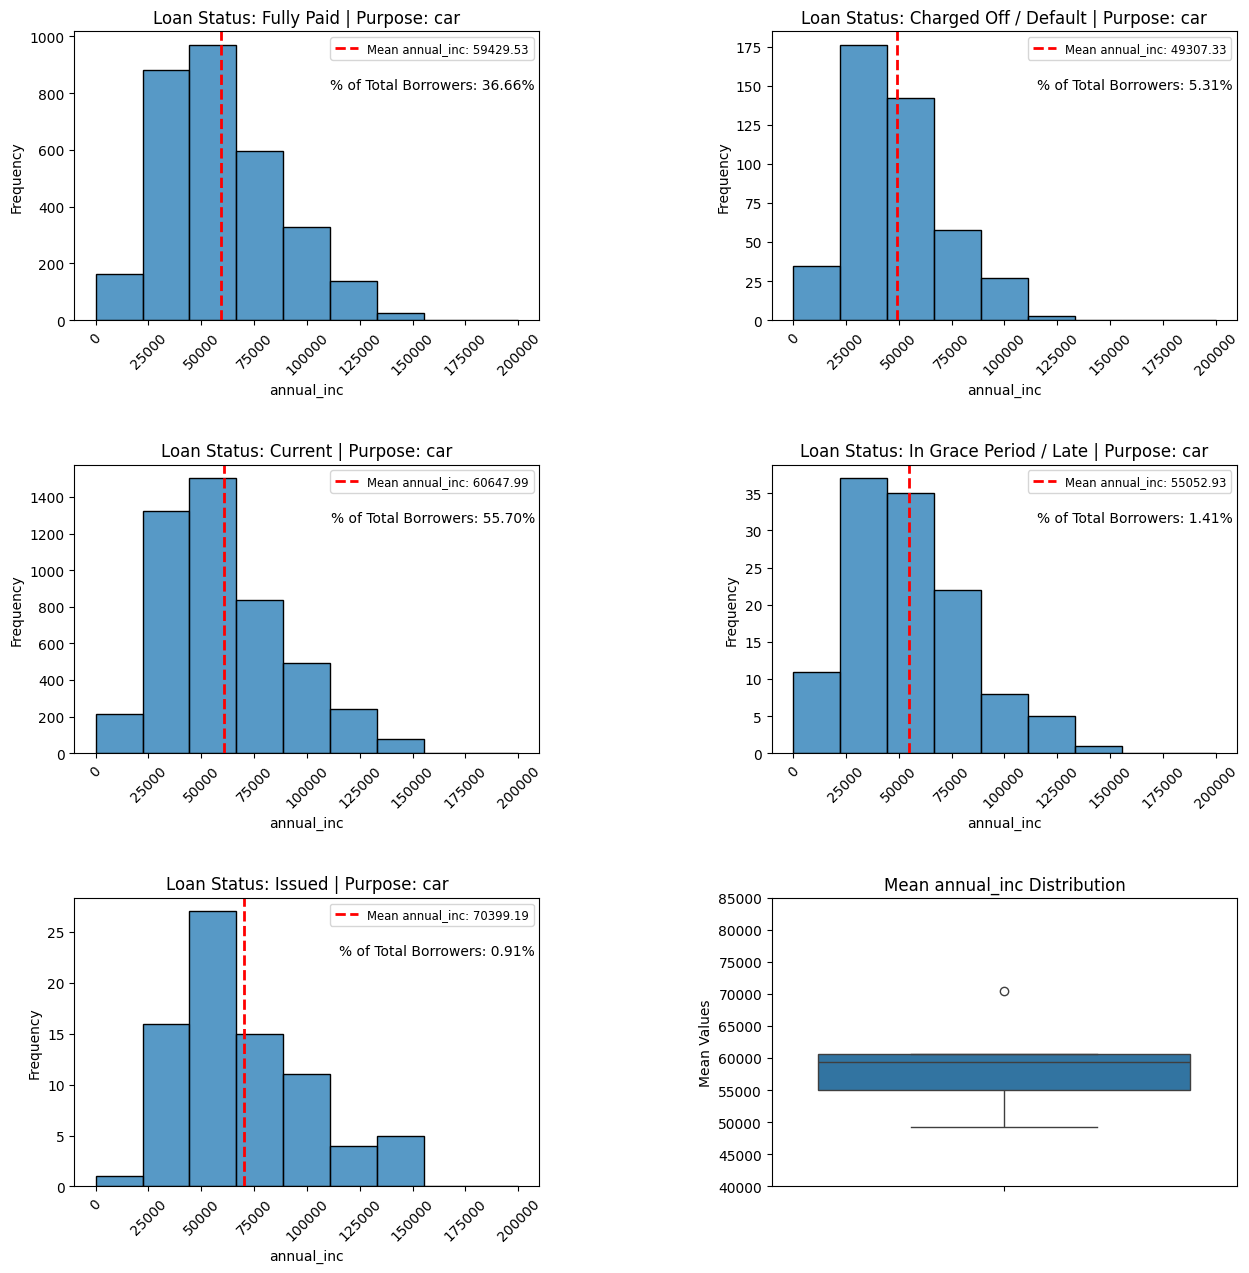

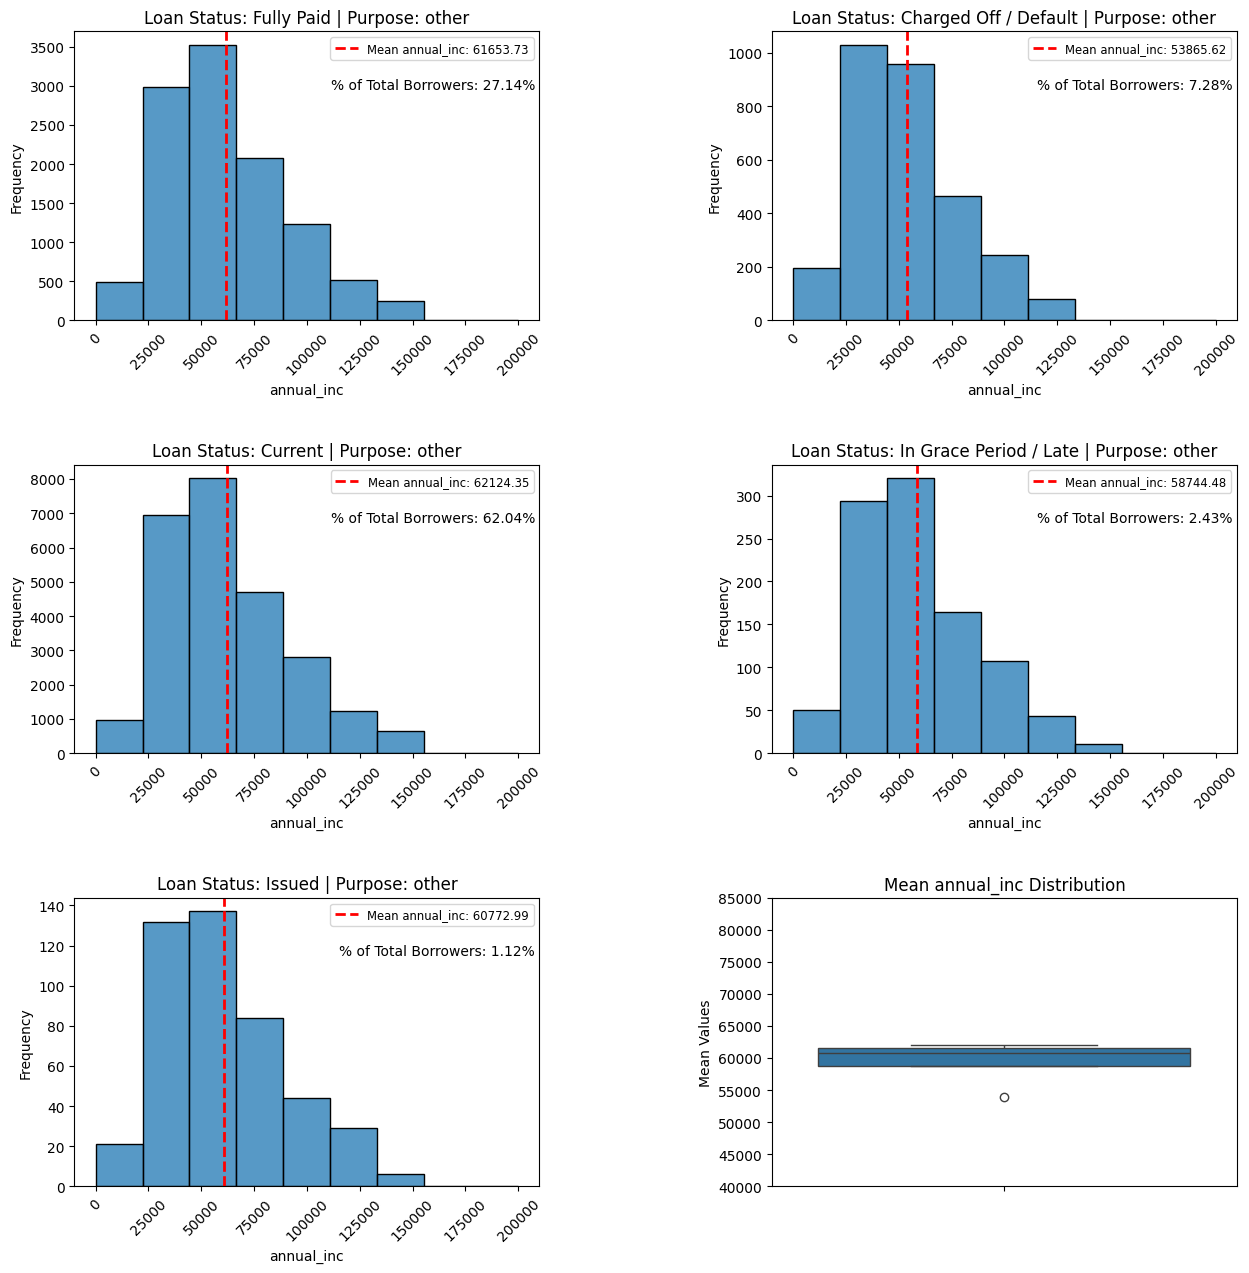

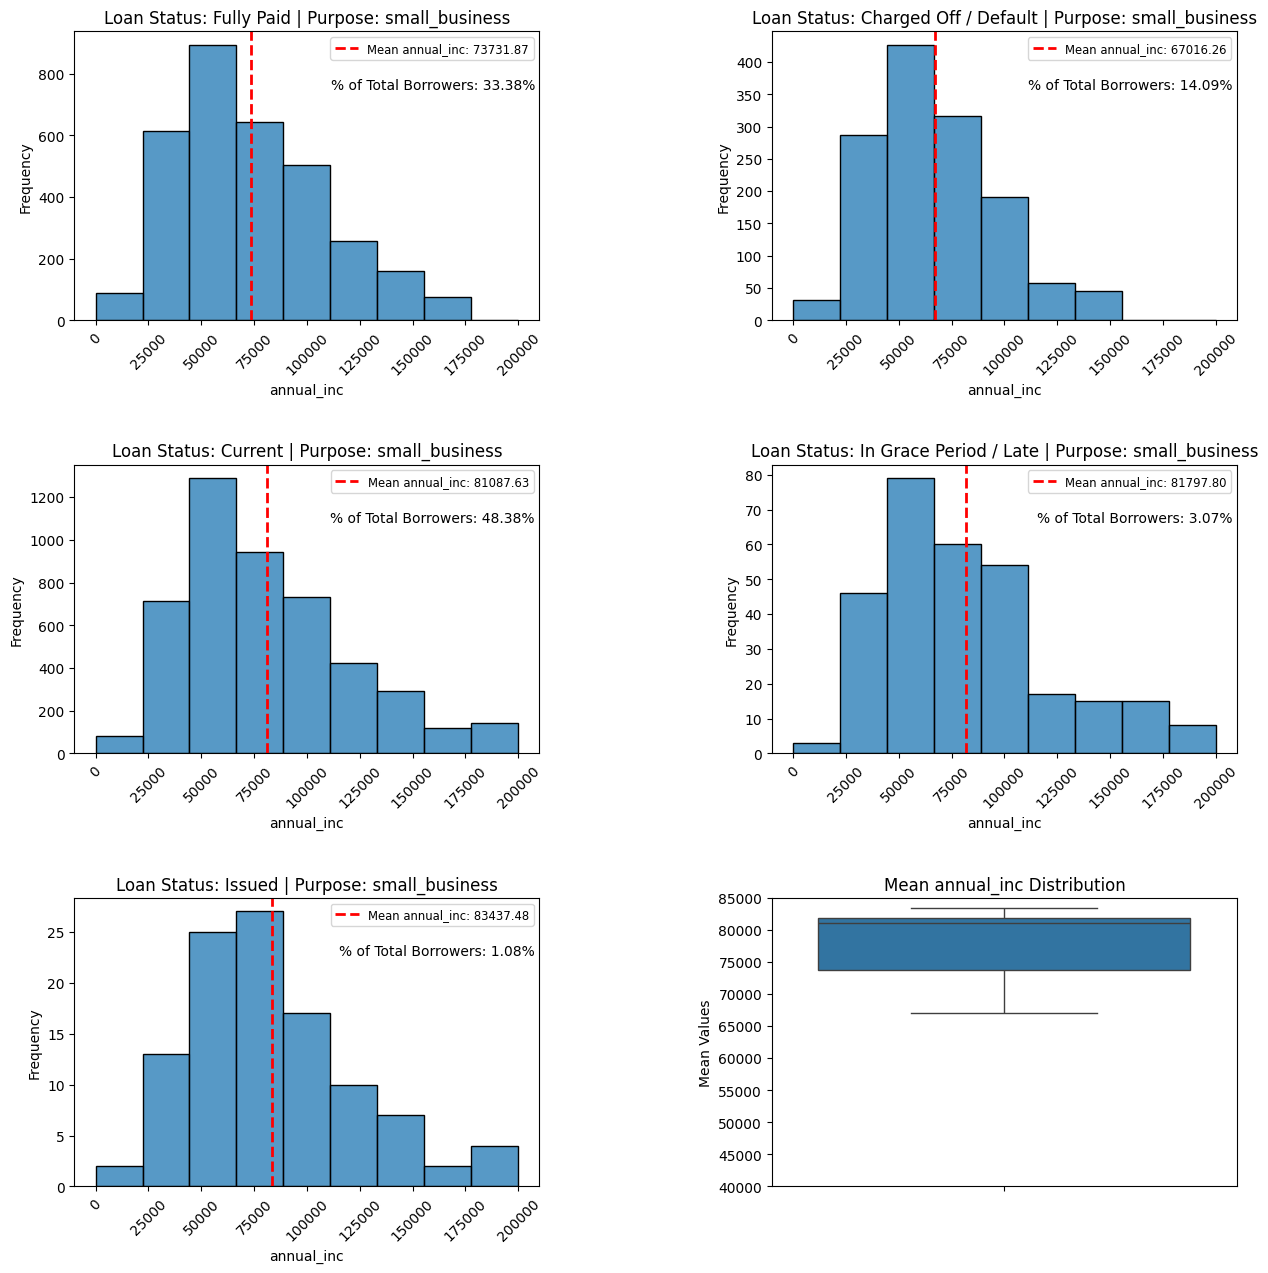

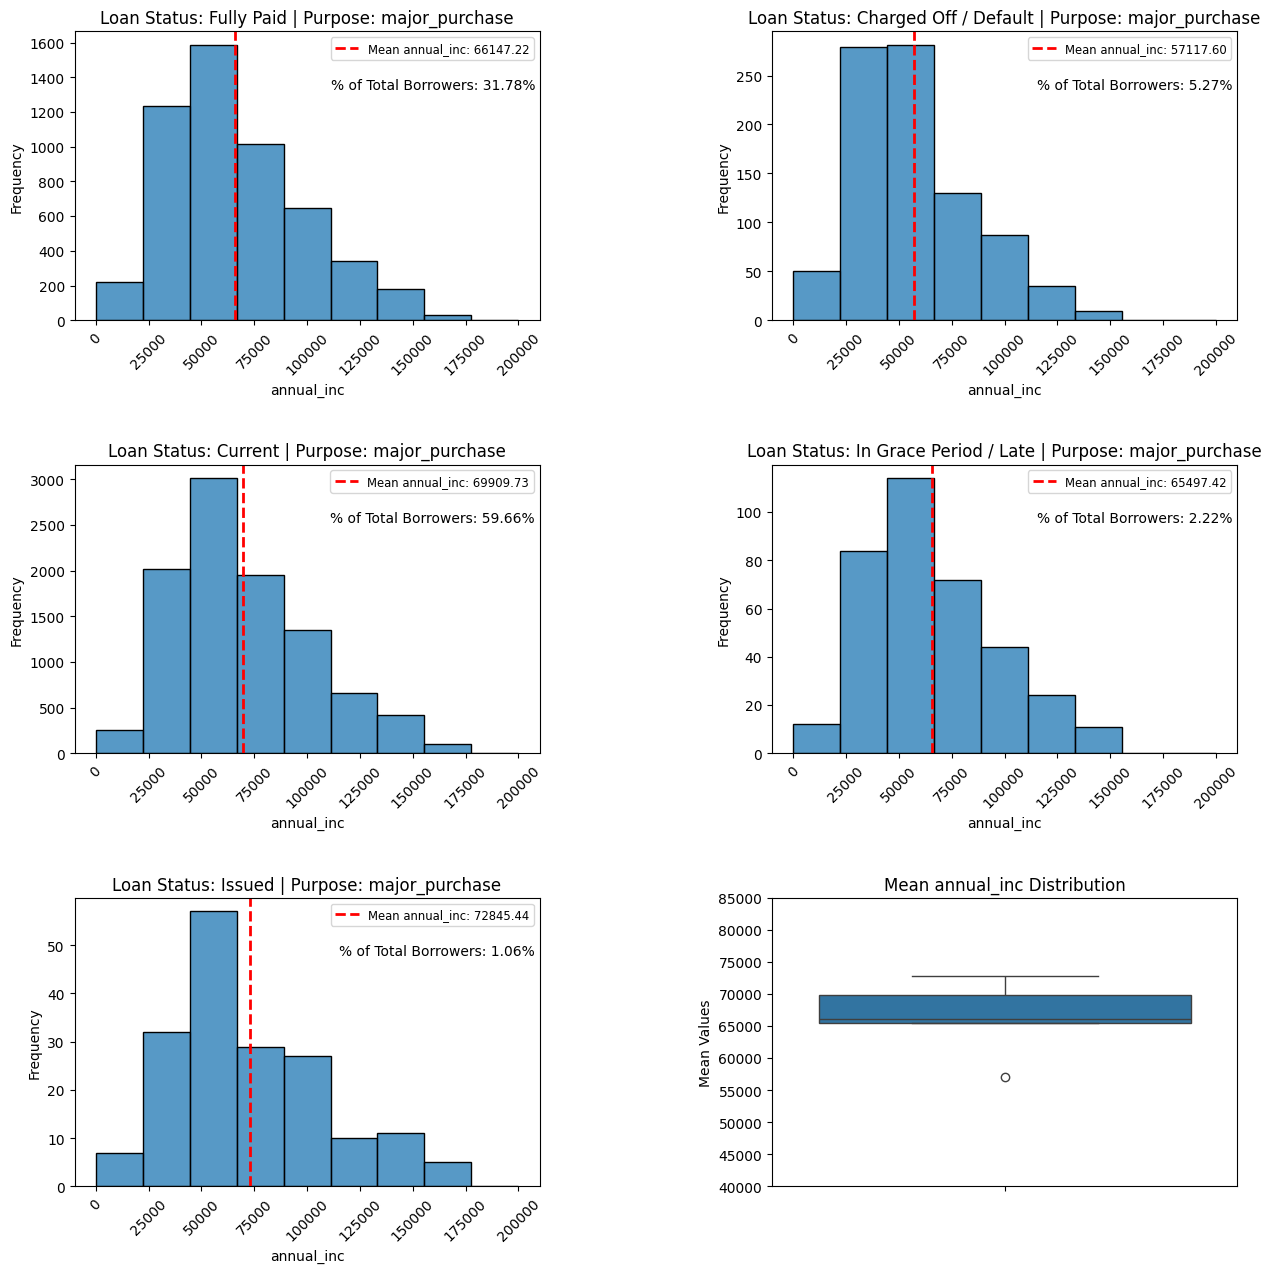

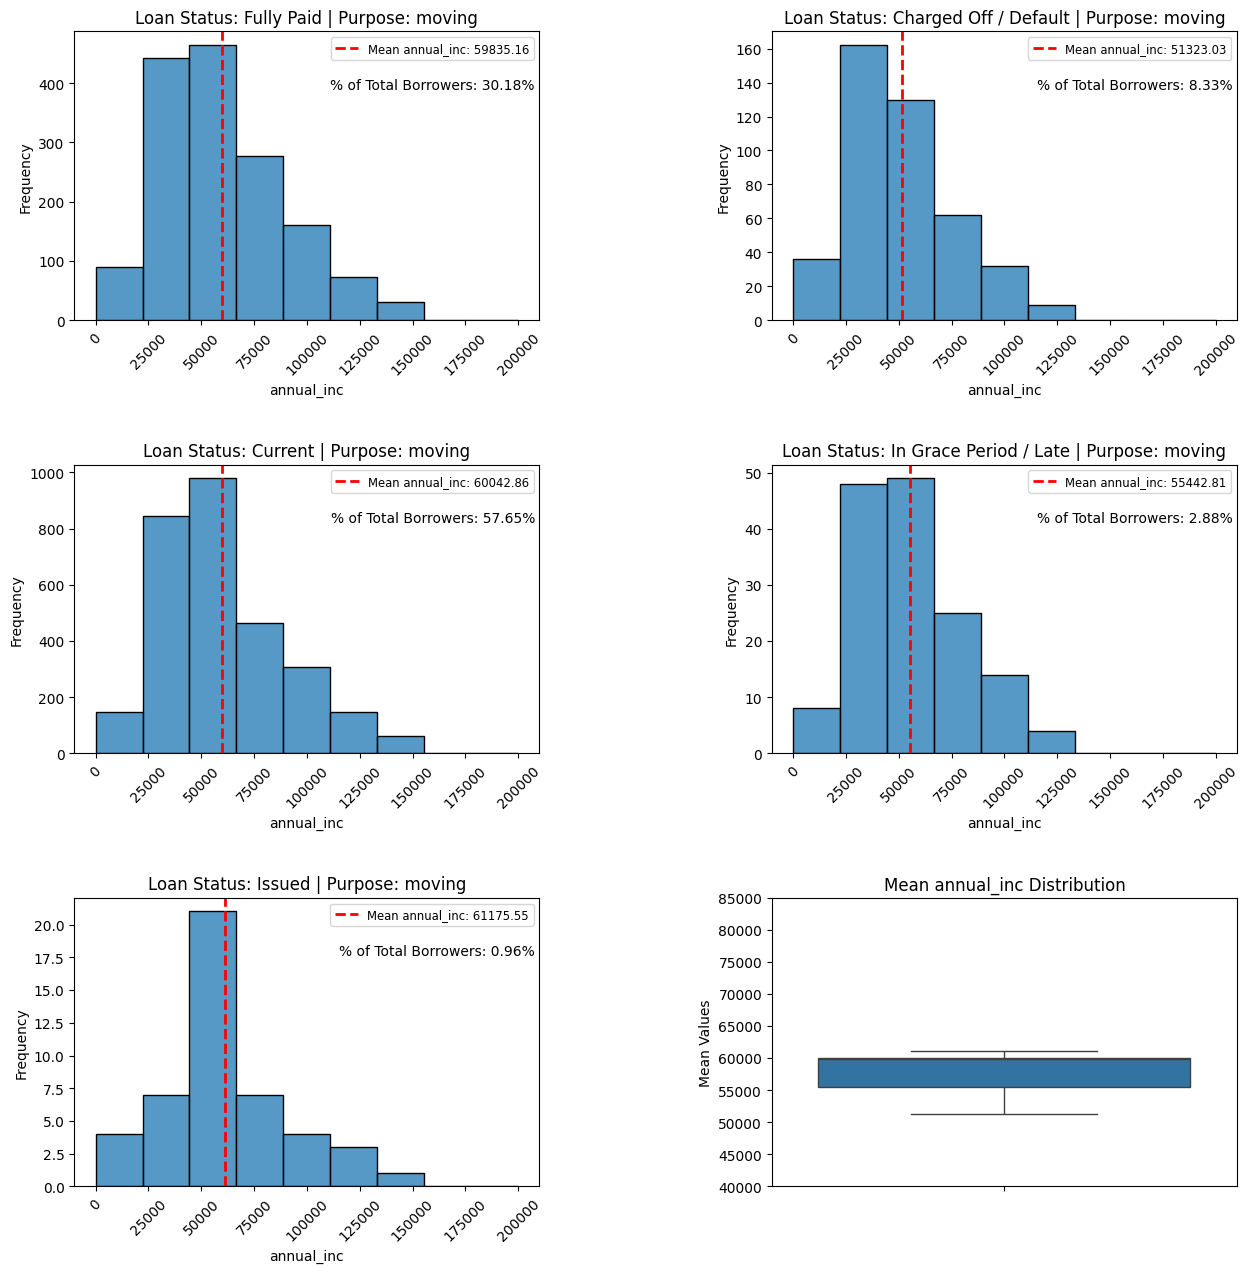

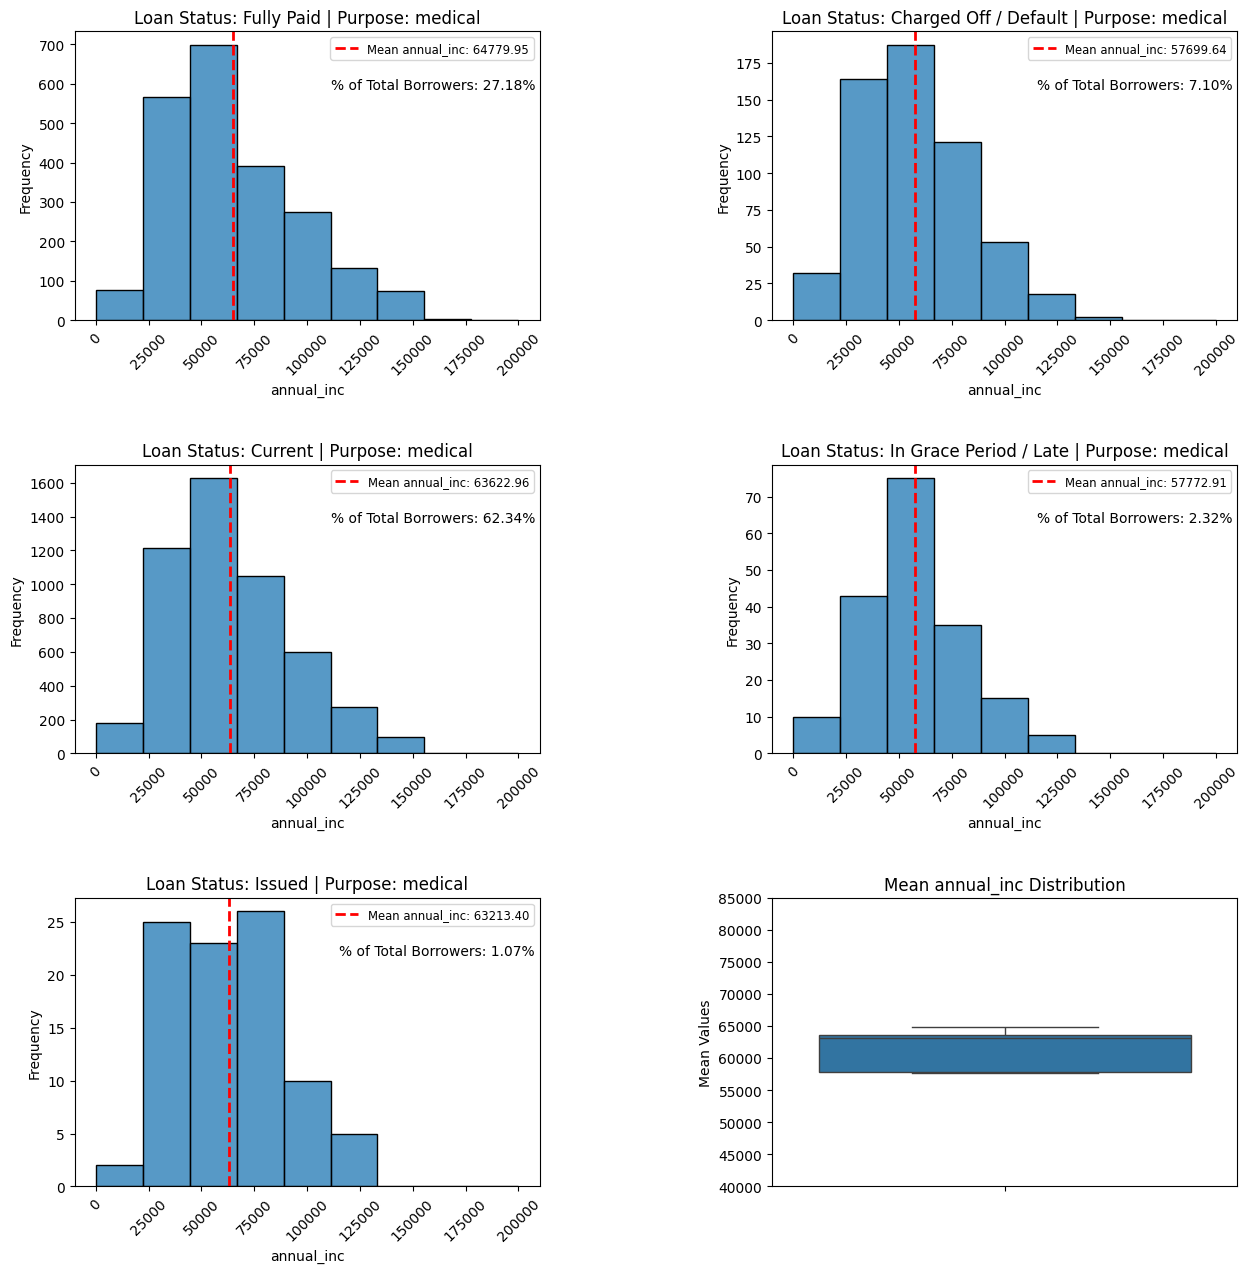

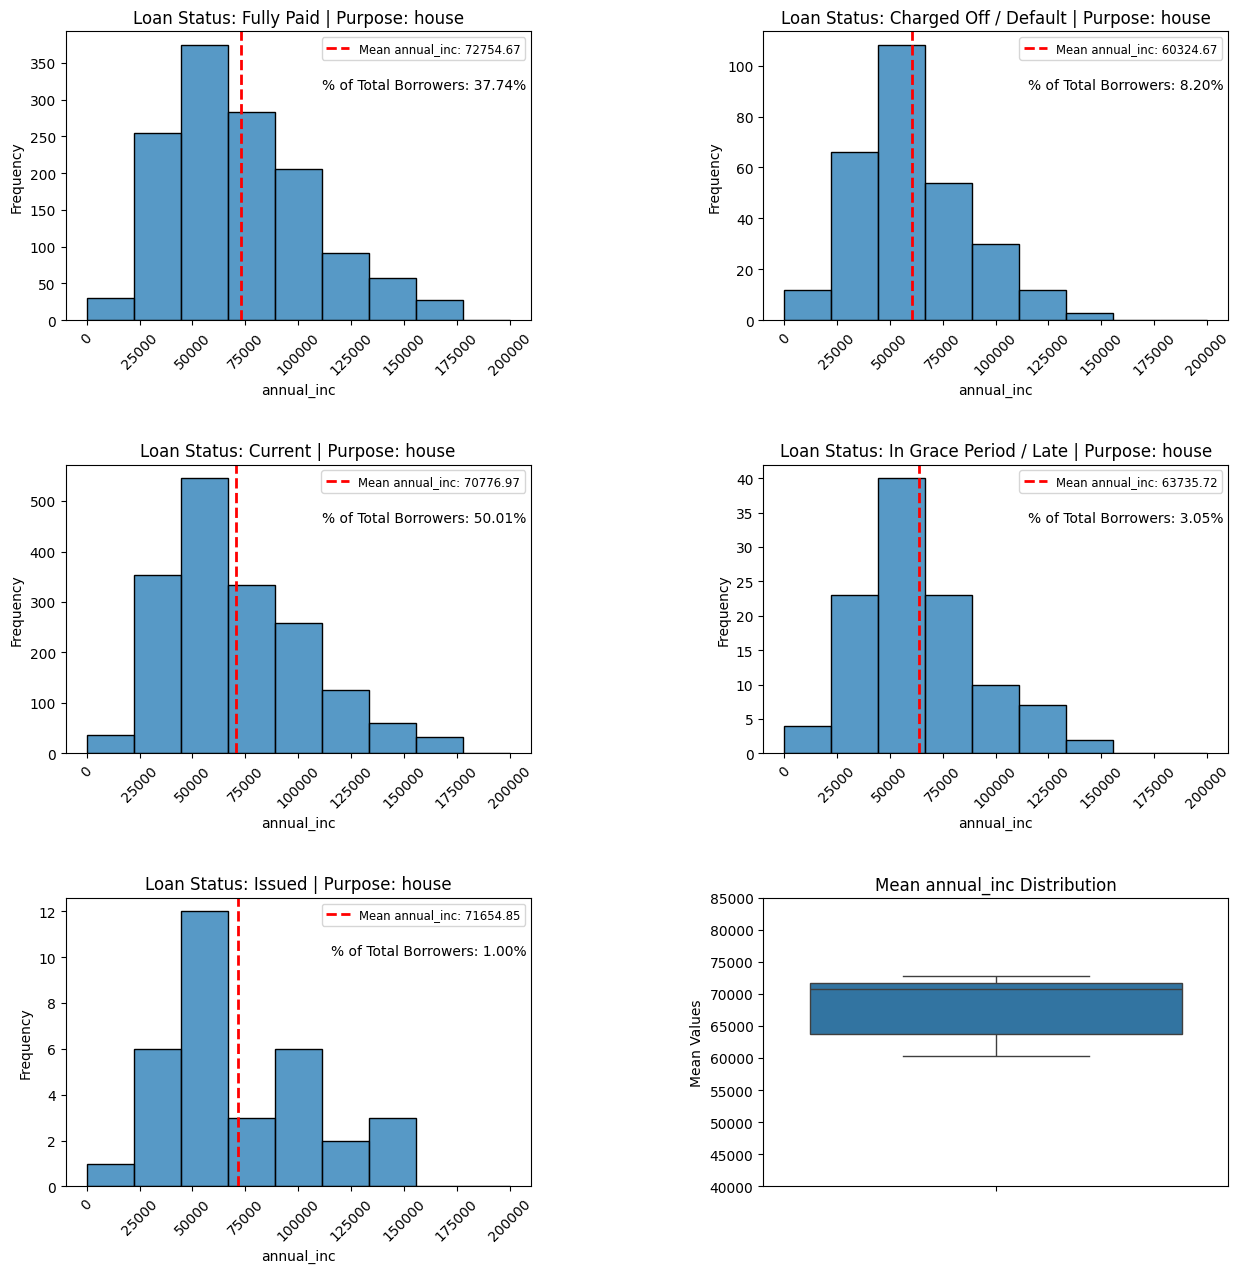

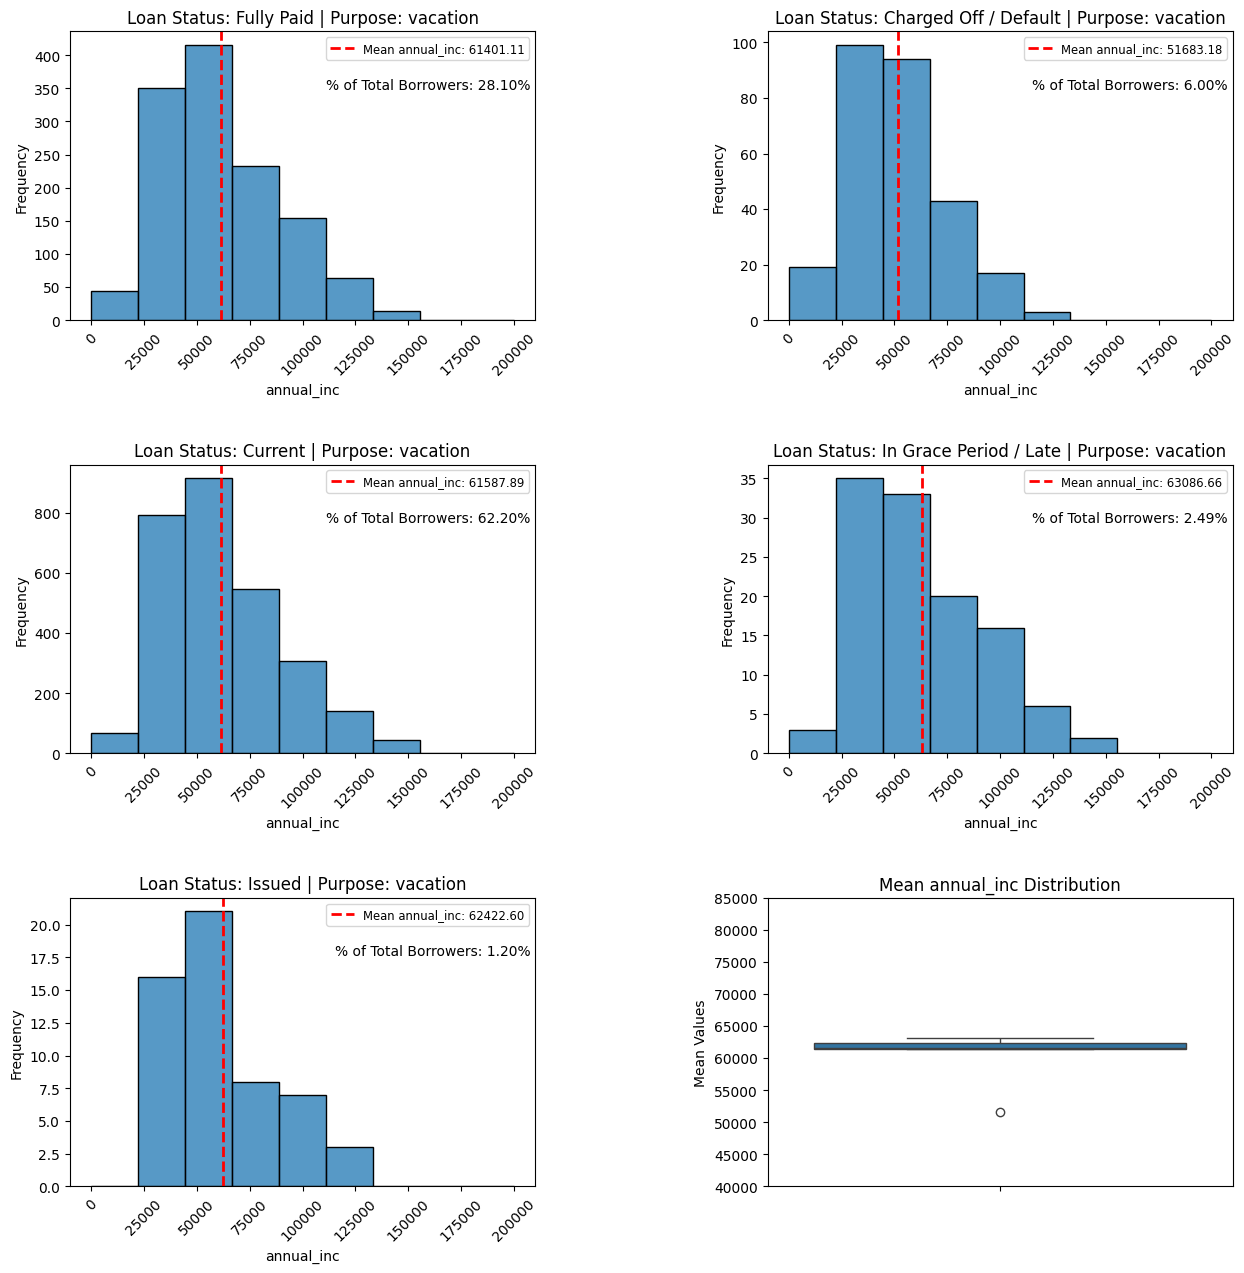

This subset is empty: 
Status: Issued
Purpose: wedding



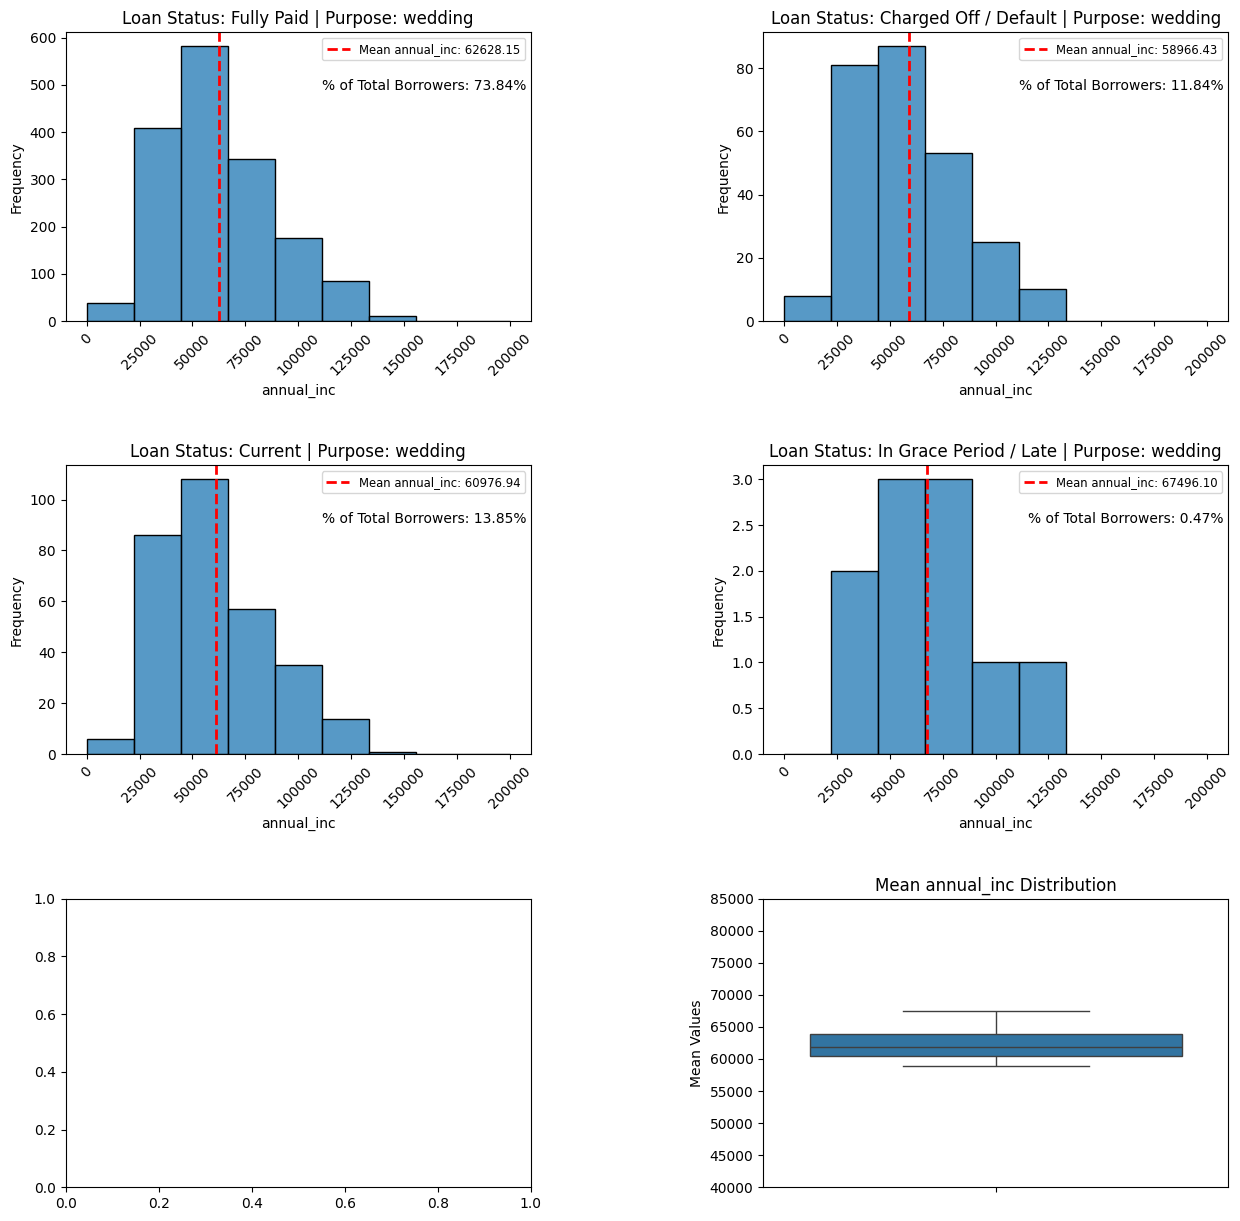

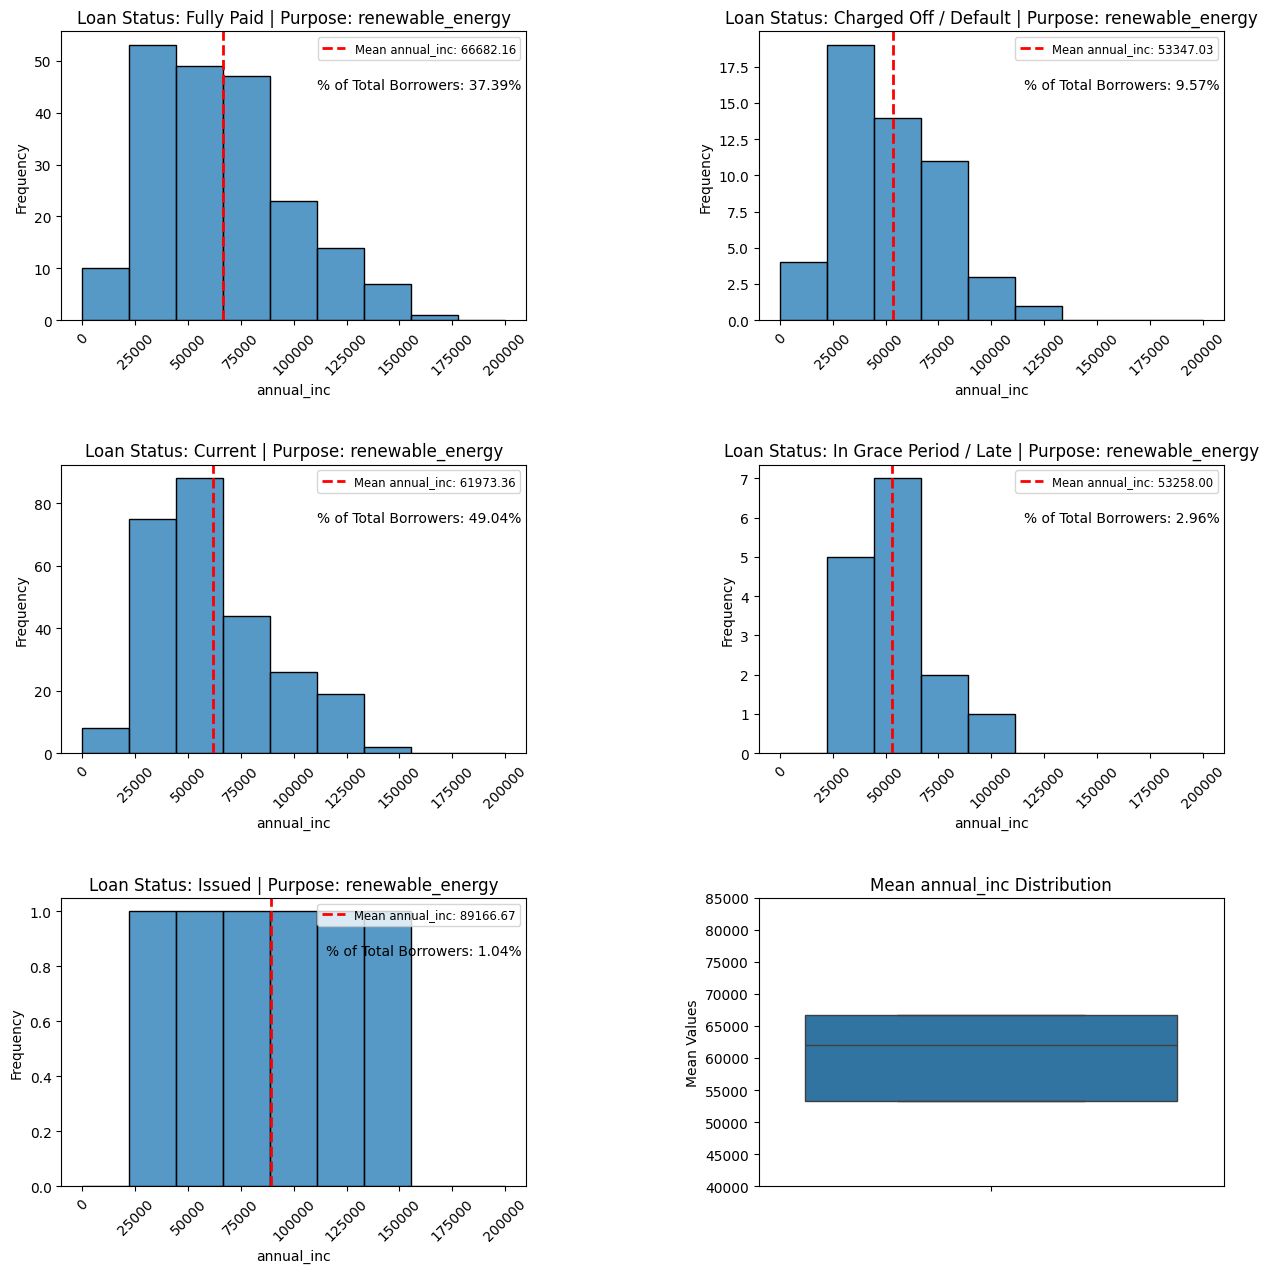

In [16]:
# Calling the function to make all income distributions for Loan Status and Loan Purpose
for purpose in purposes:
    feature_visualization("annual_inc", annual_inc_df, statuses, [purpose], calculate_total_individuals("annual_inc", annual_inc_df, statuses, [purpose], True), 200000, 40000, 85000, True)

### Debt to Income Ratio

#### Cleaning

In [17]:
# Cleaning annual_inc and the purpose / loan_status)
dti_df = clean_feature_and_groupers("dti", "purpose", "loan_status" )

Nulls in dti: 0
Nulls in purpose: 0
Nulls in loan_status: 0


#### Debt to Income Distribution by Loan Status

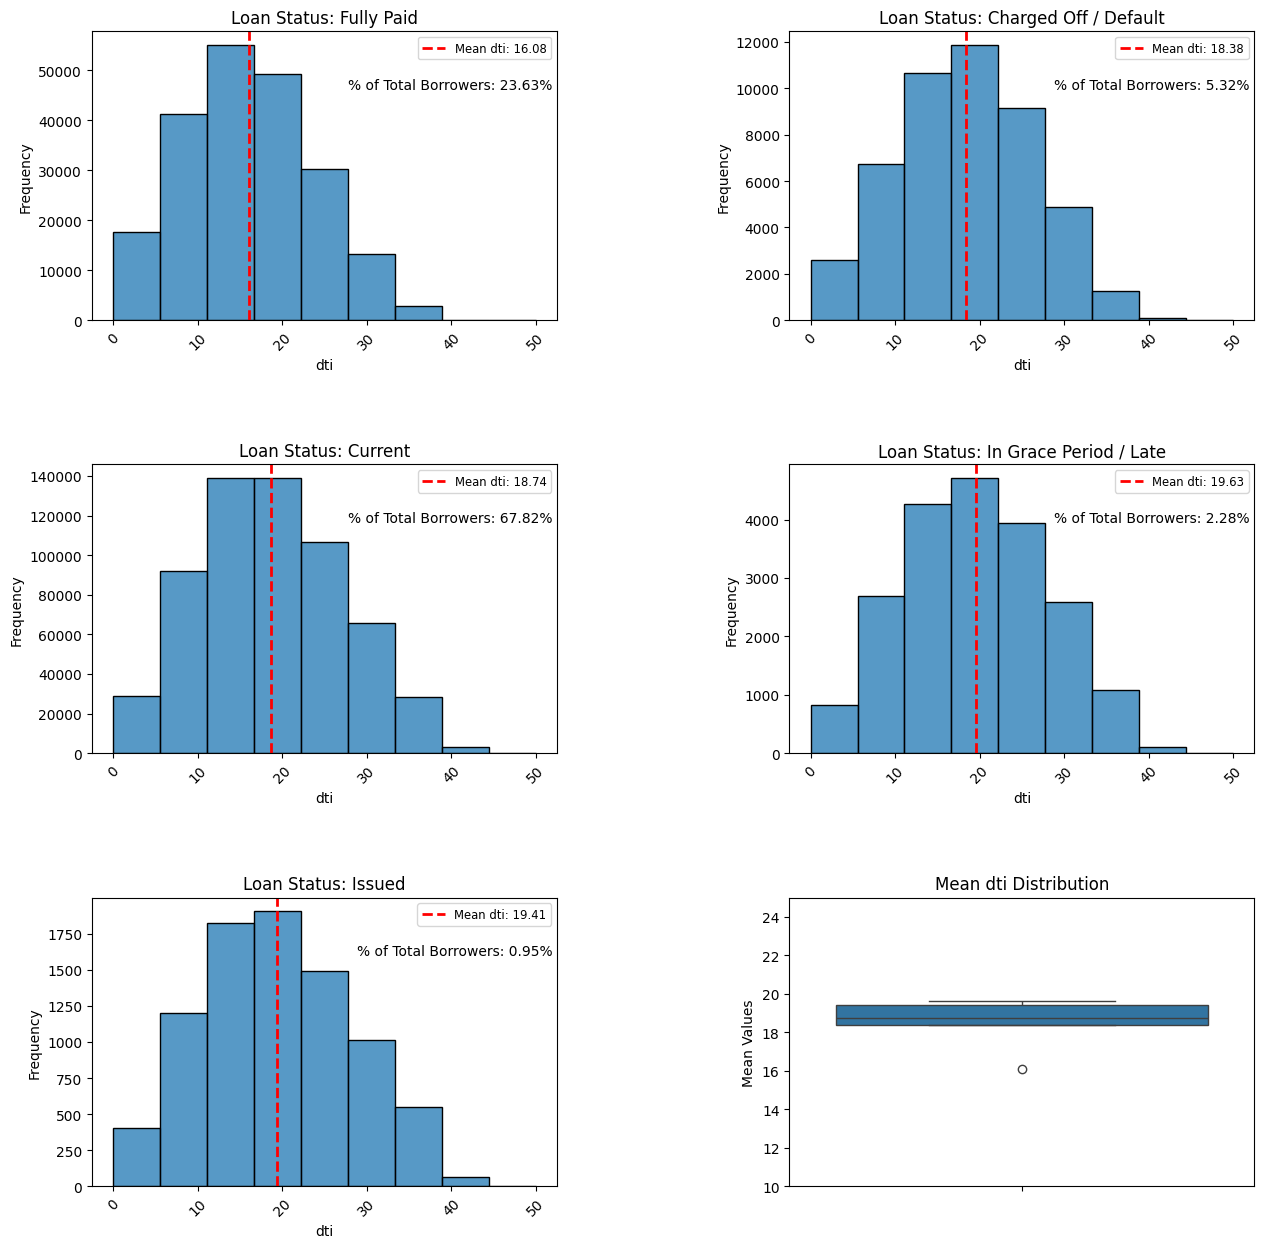

In [18]:
# Calling feature by status function
feature_visualization("dti", dti_df, statuses, "null", calculate_total_individuals("dti", dti_df, statuses, "null", True), 50, 10, 25, True)

#### Debt to Income Distribution by Loan Status and Loan Purpose

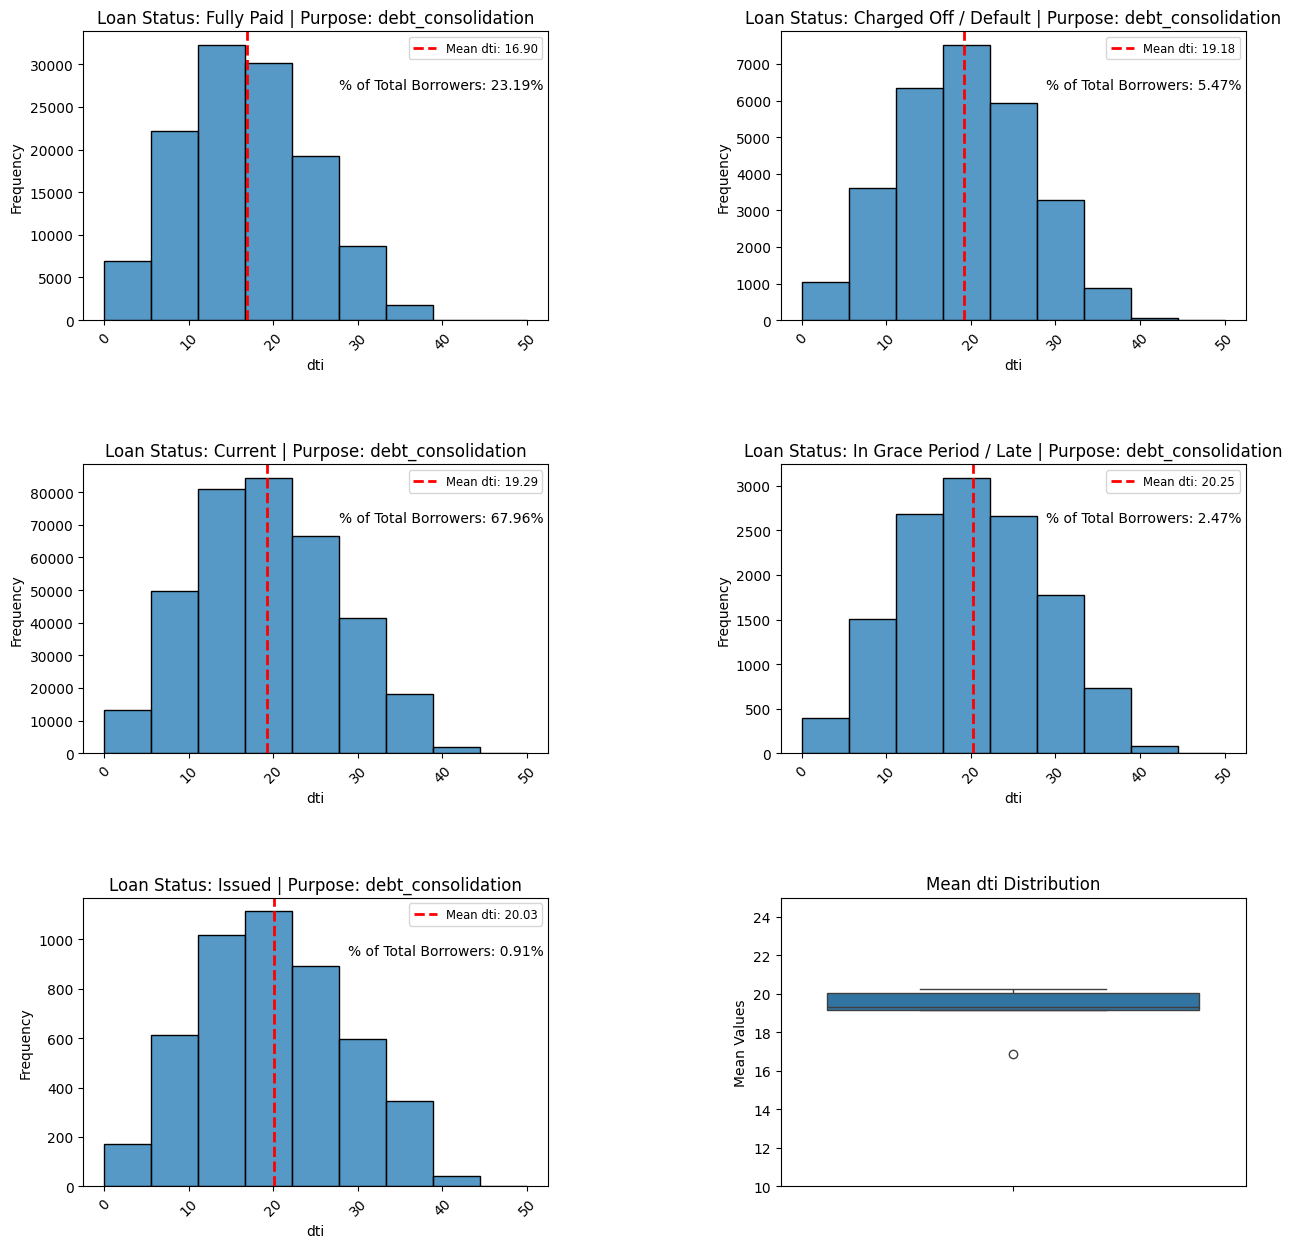

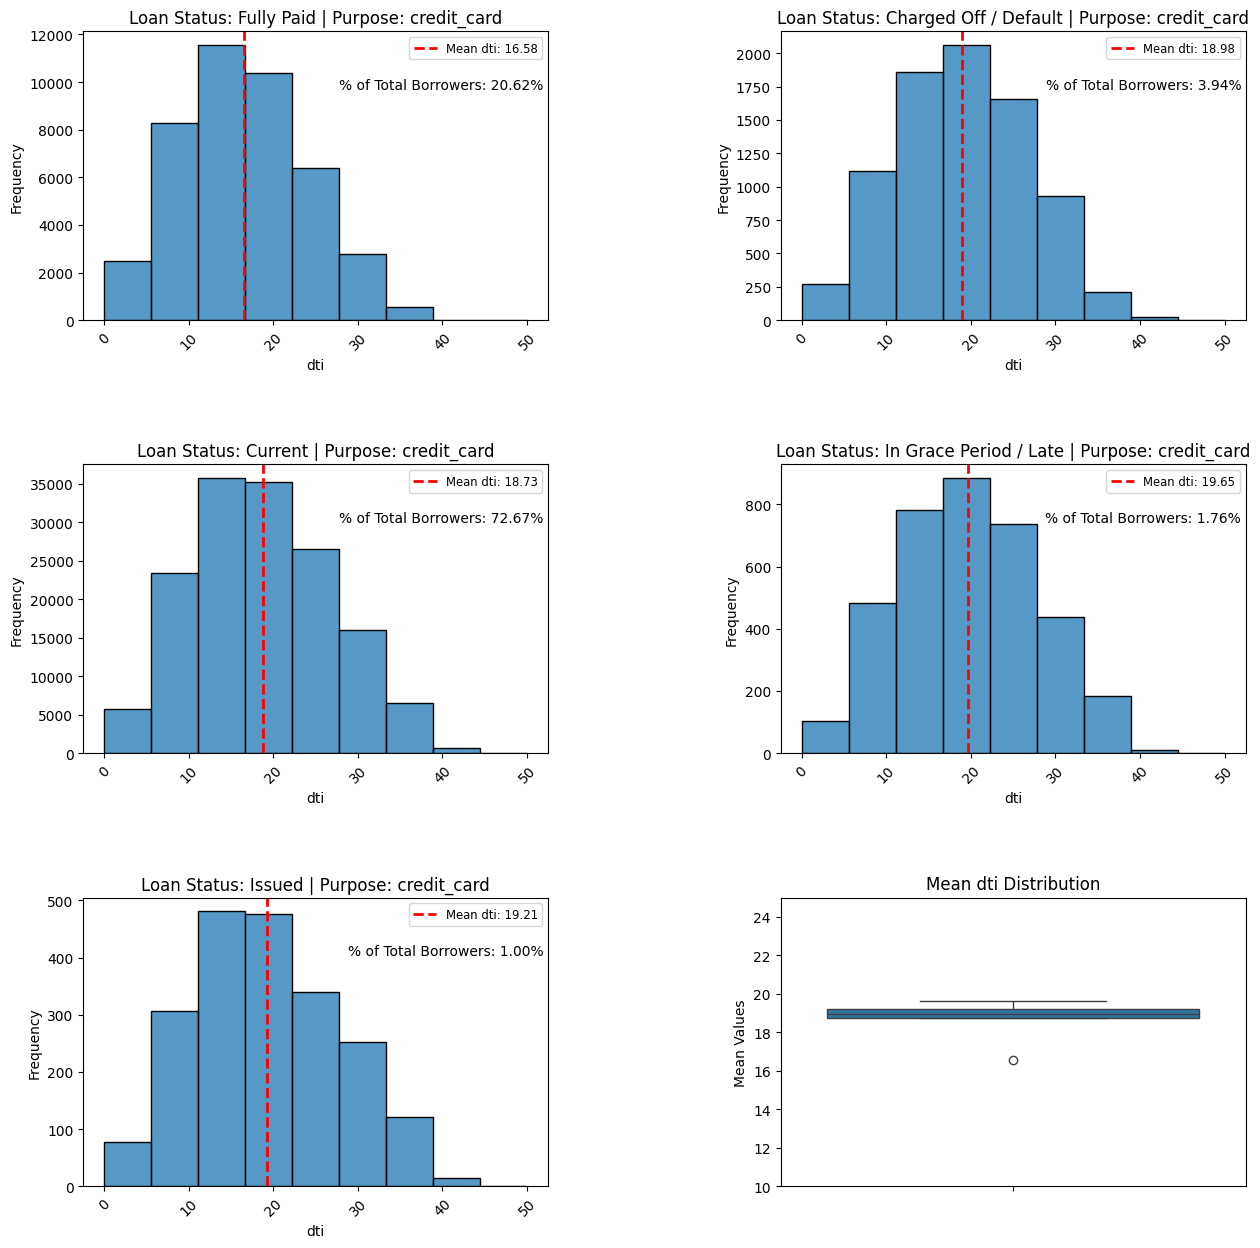

This subset is empty: 
Status: In Grace Period / Late
Purpose: educational

This subset is empty: 
Status: Issued
Purpose: educational



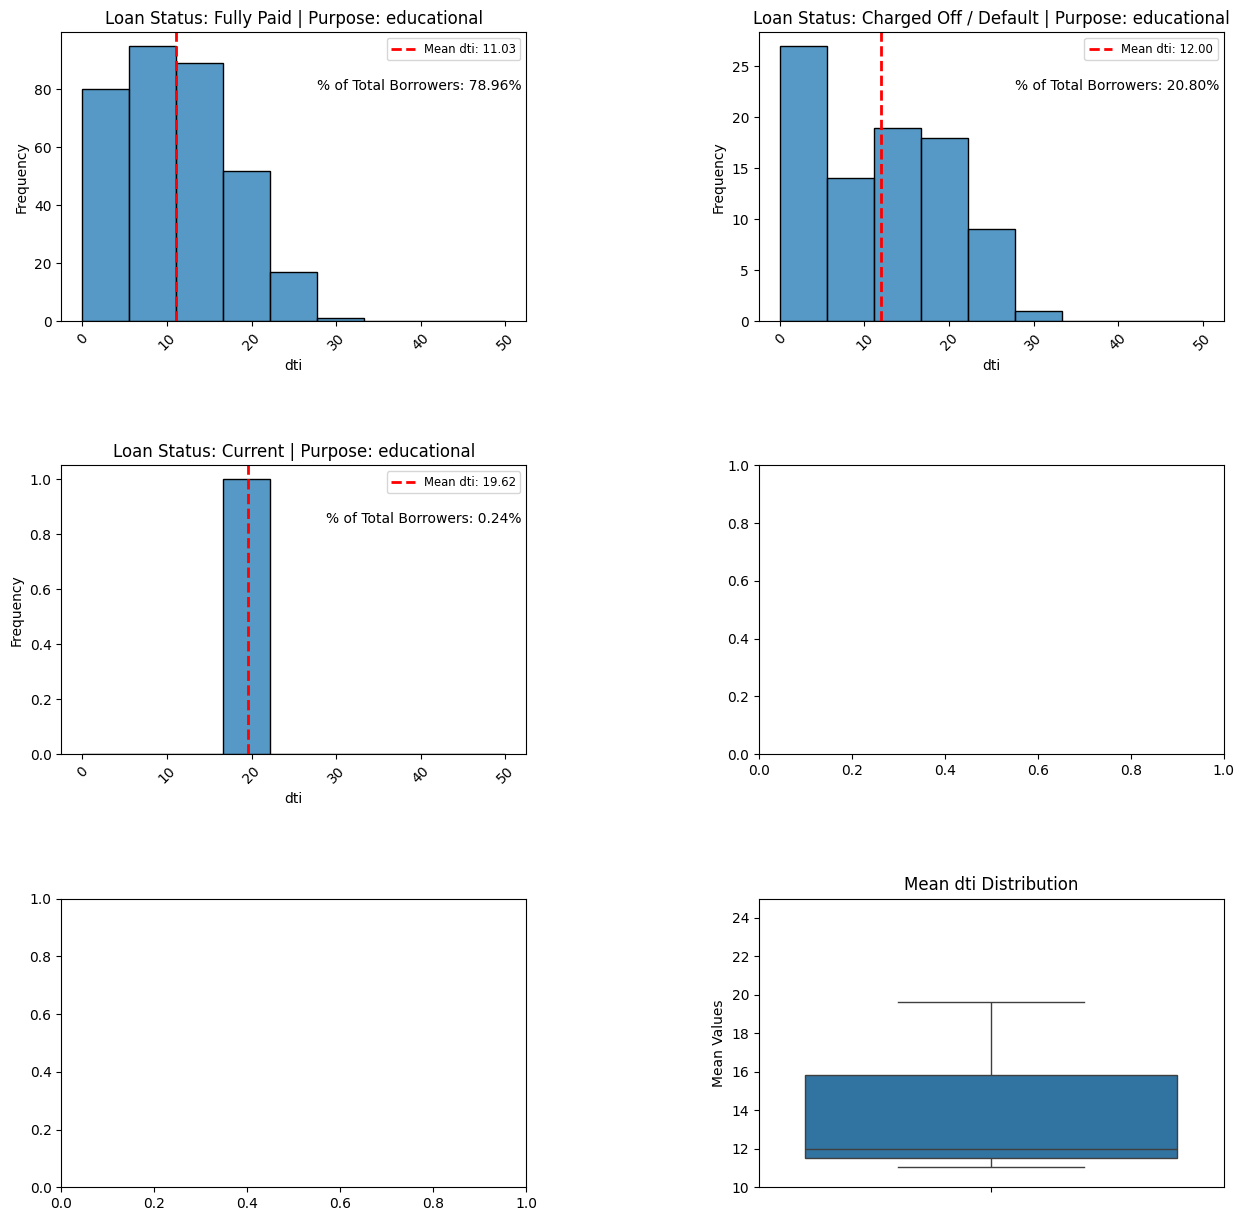

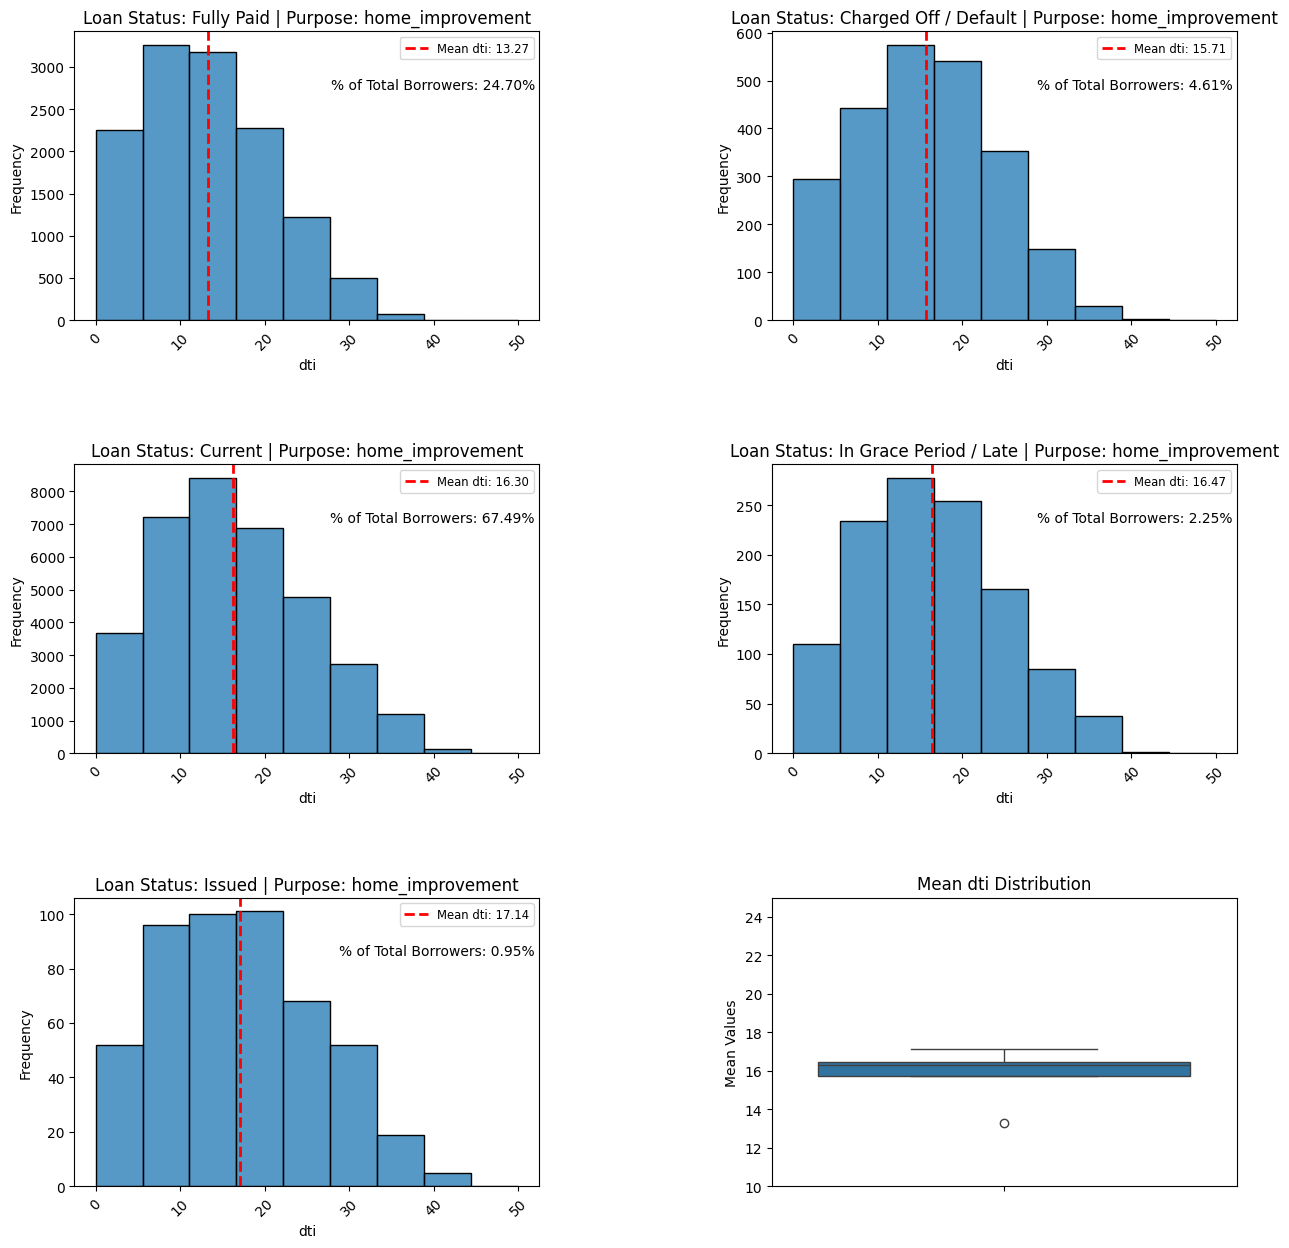

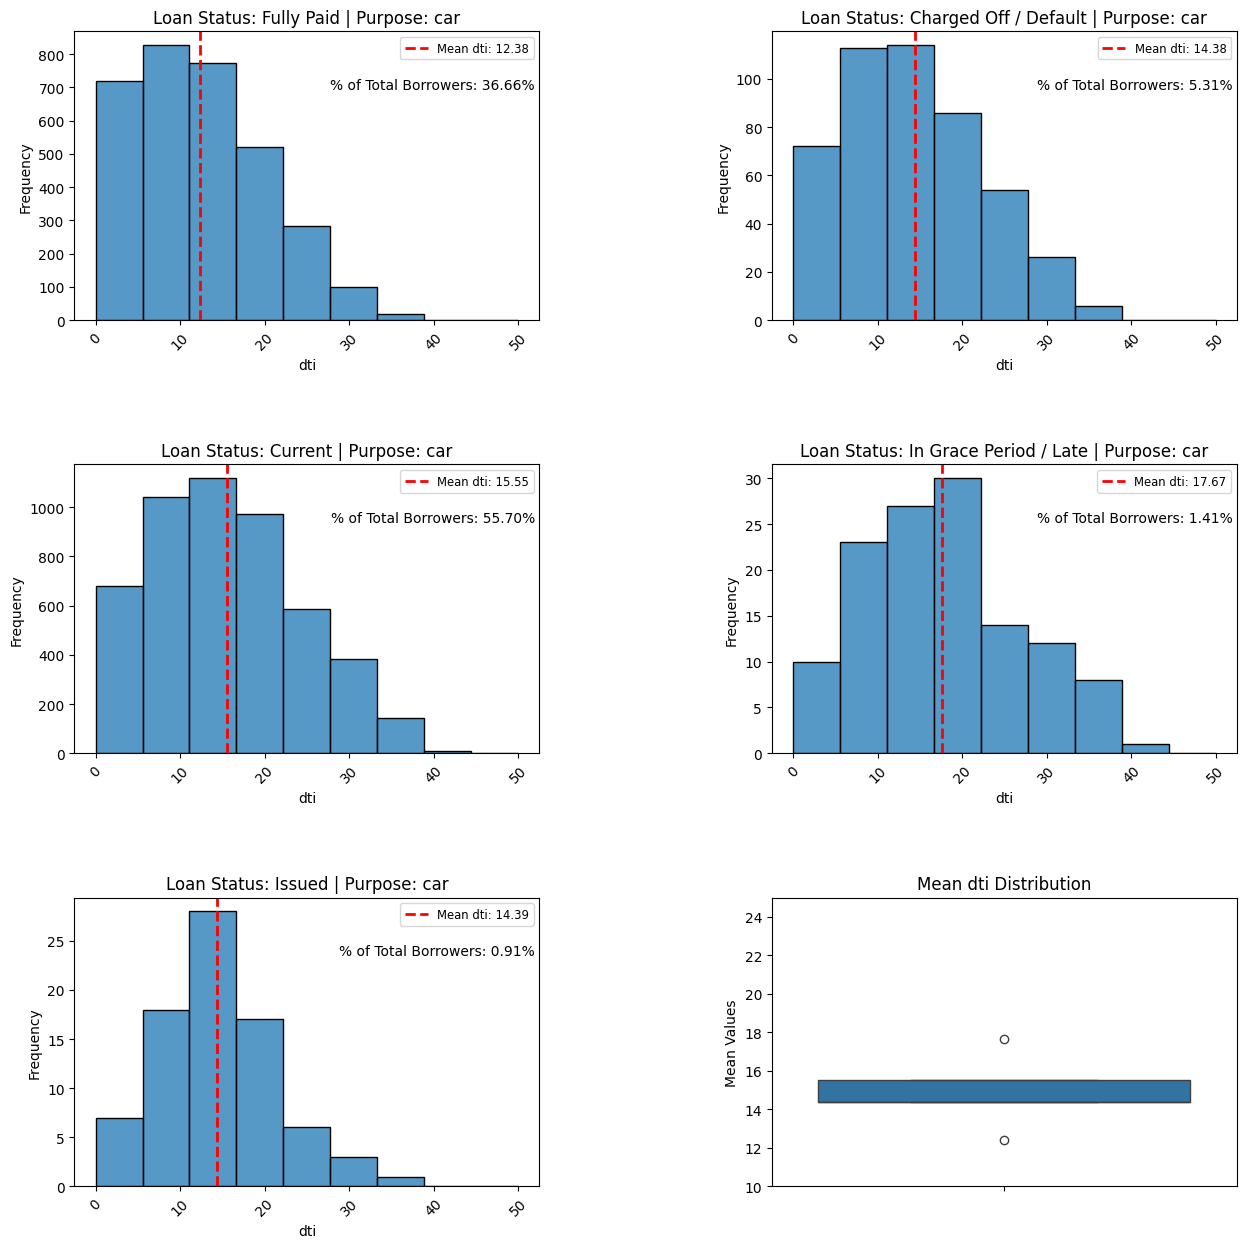

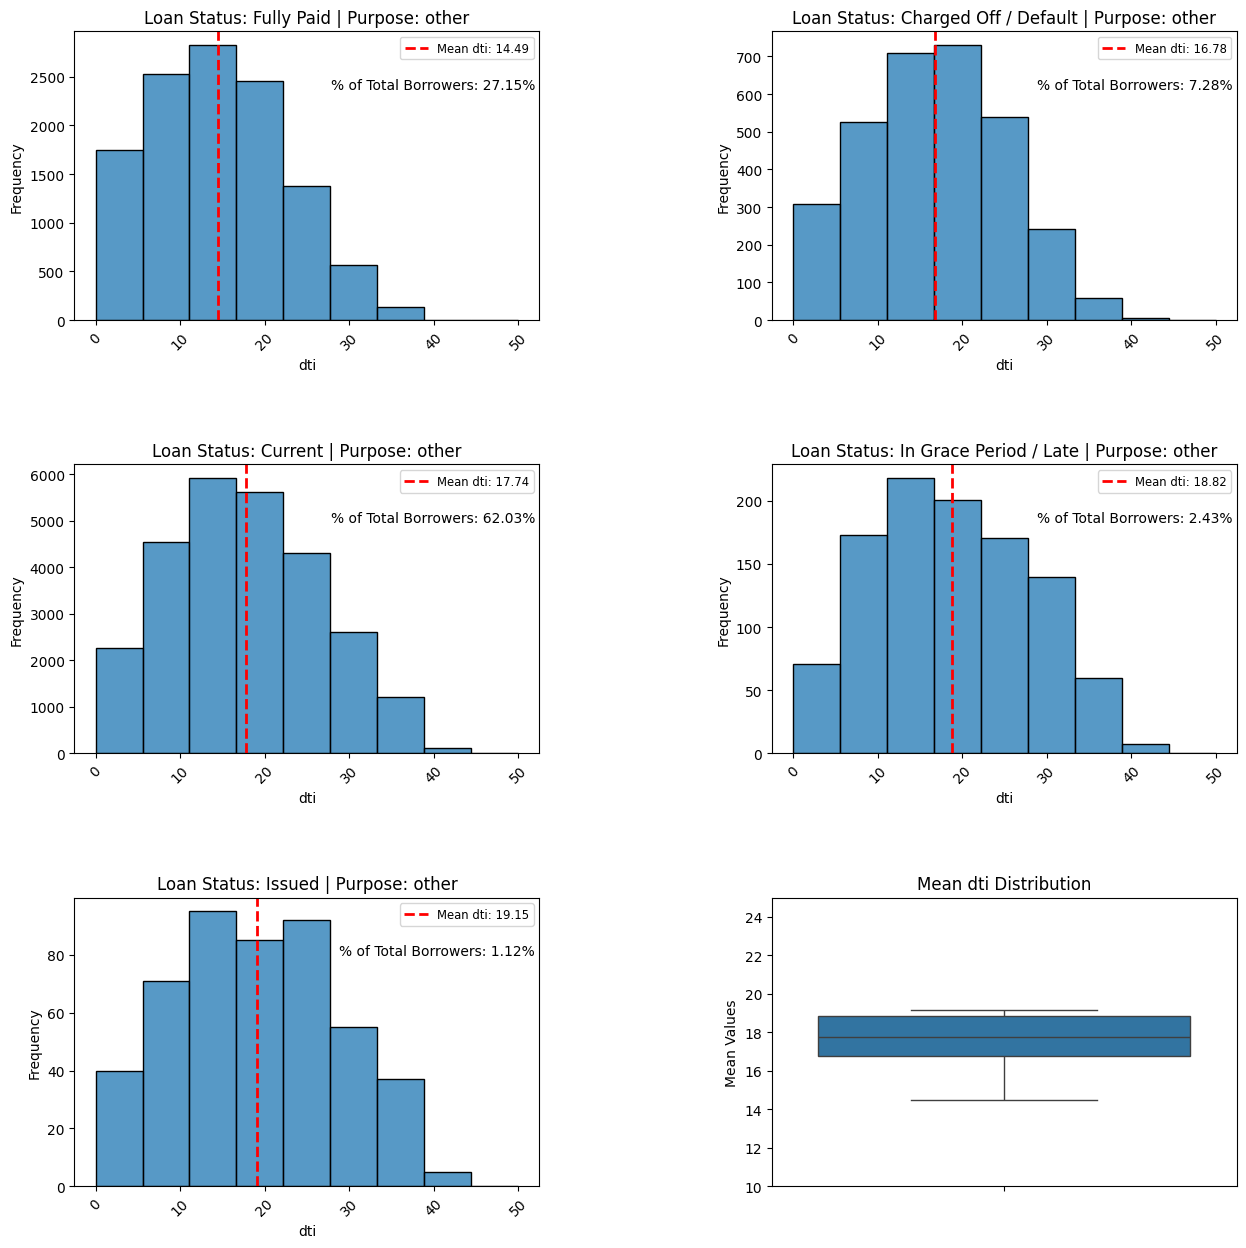

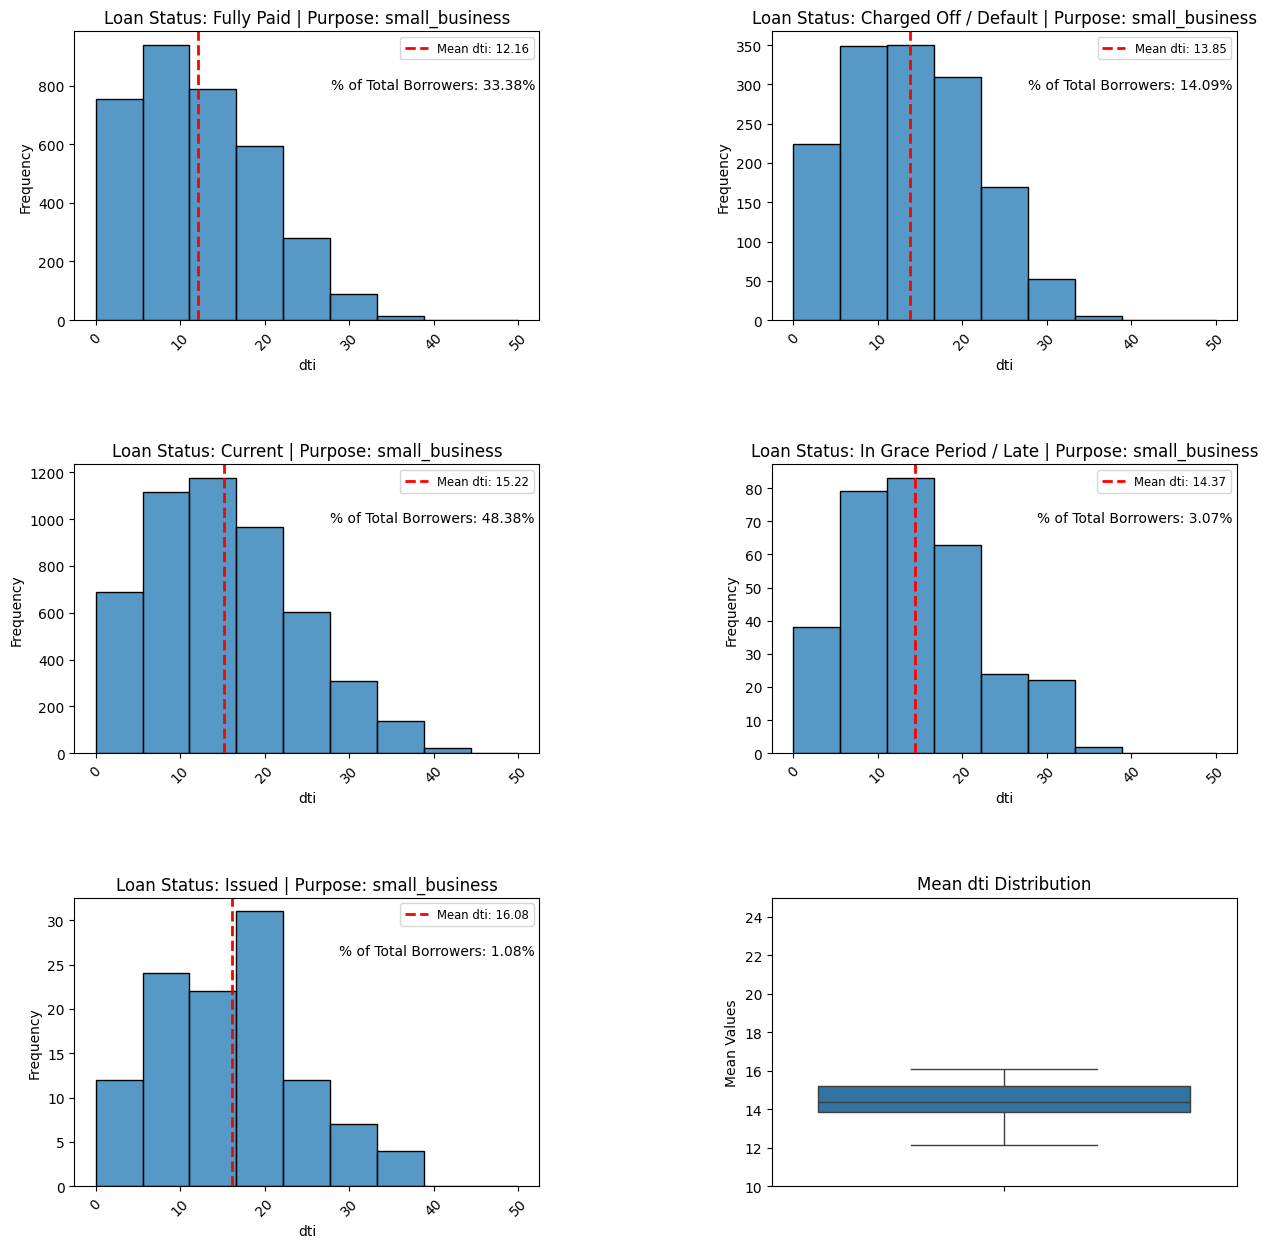

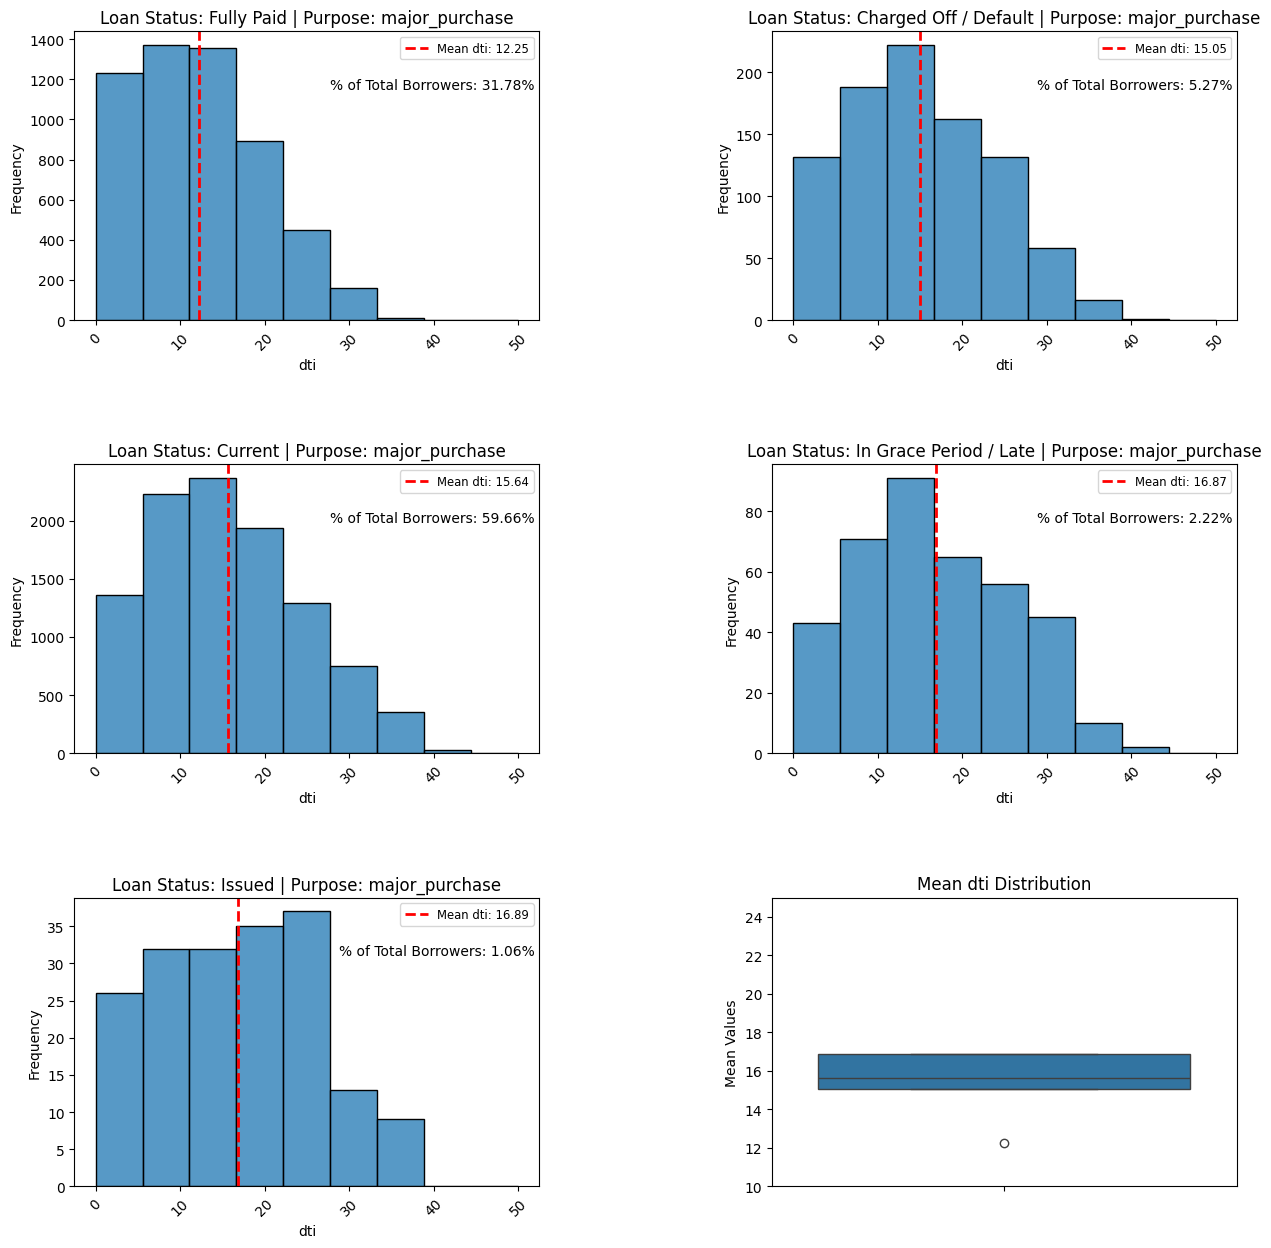

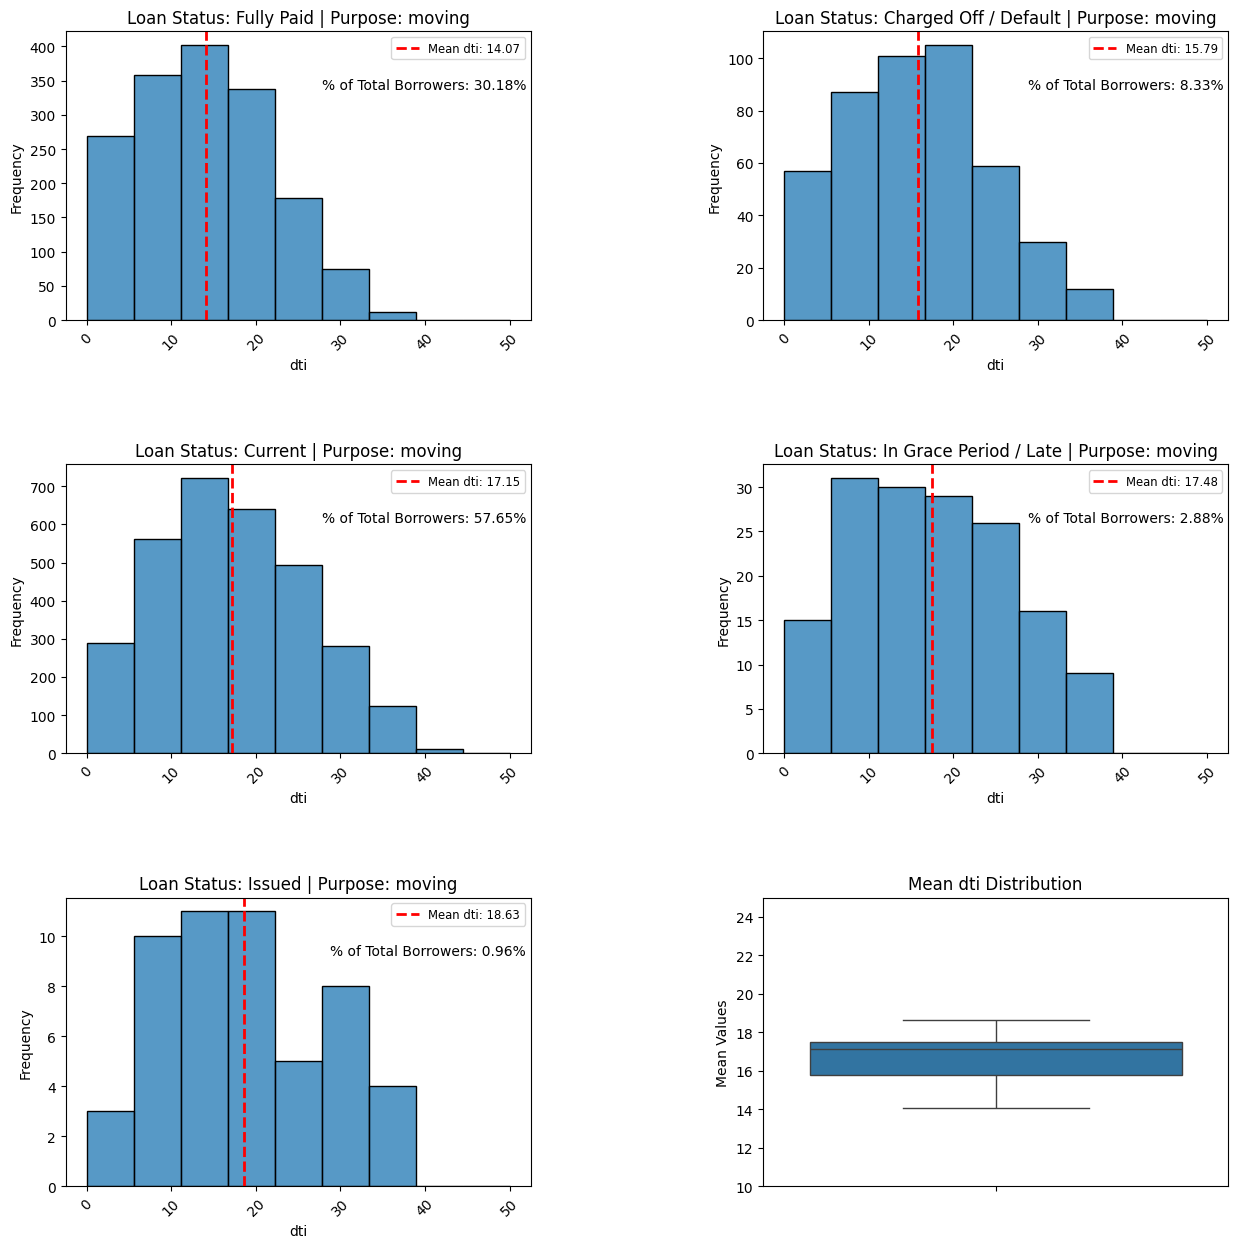

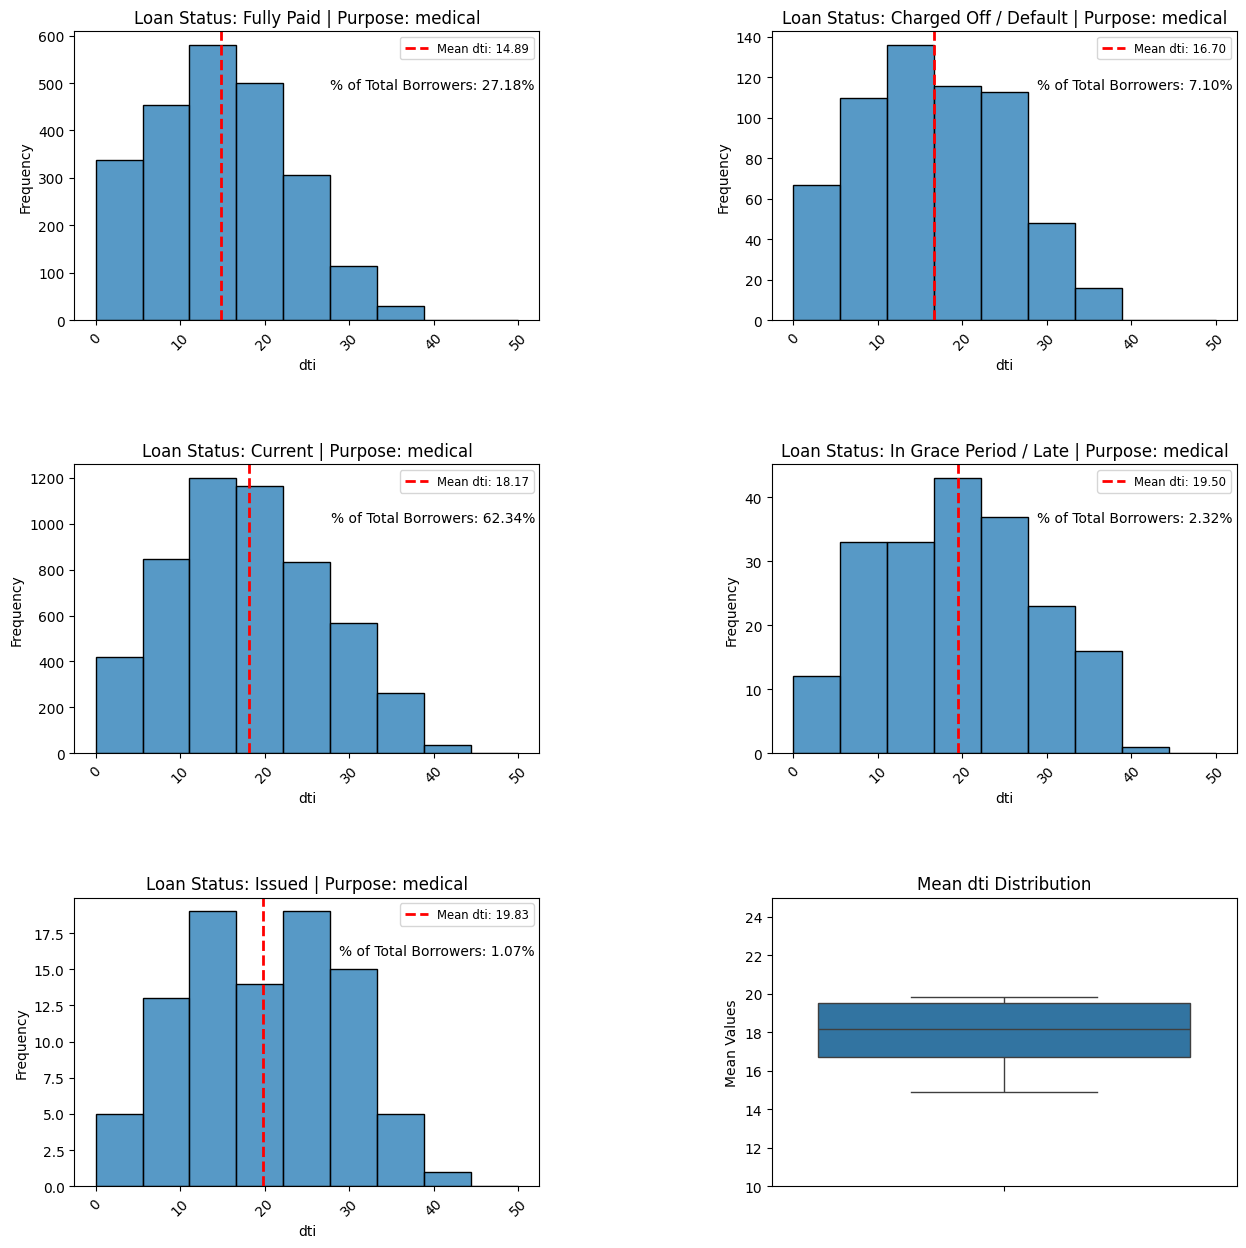

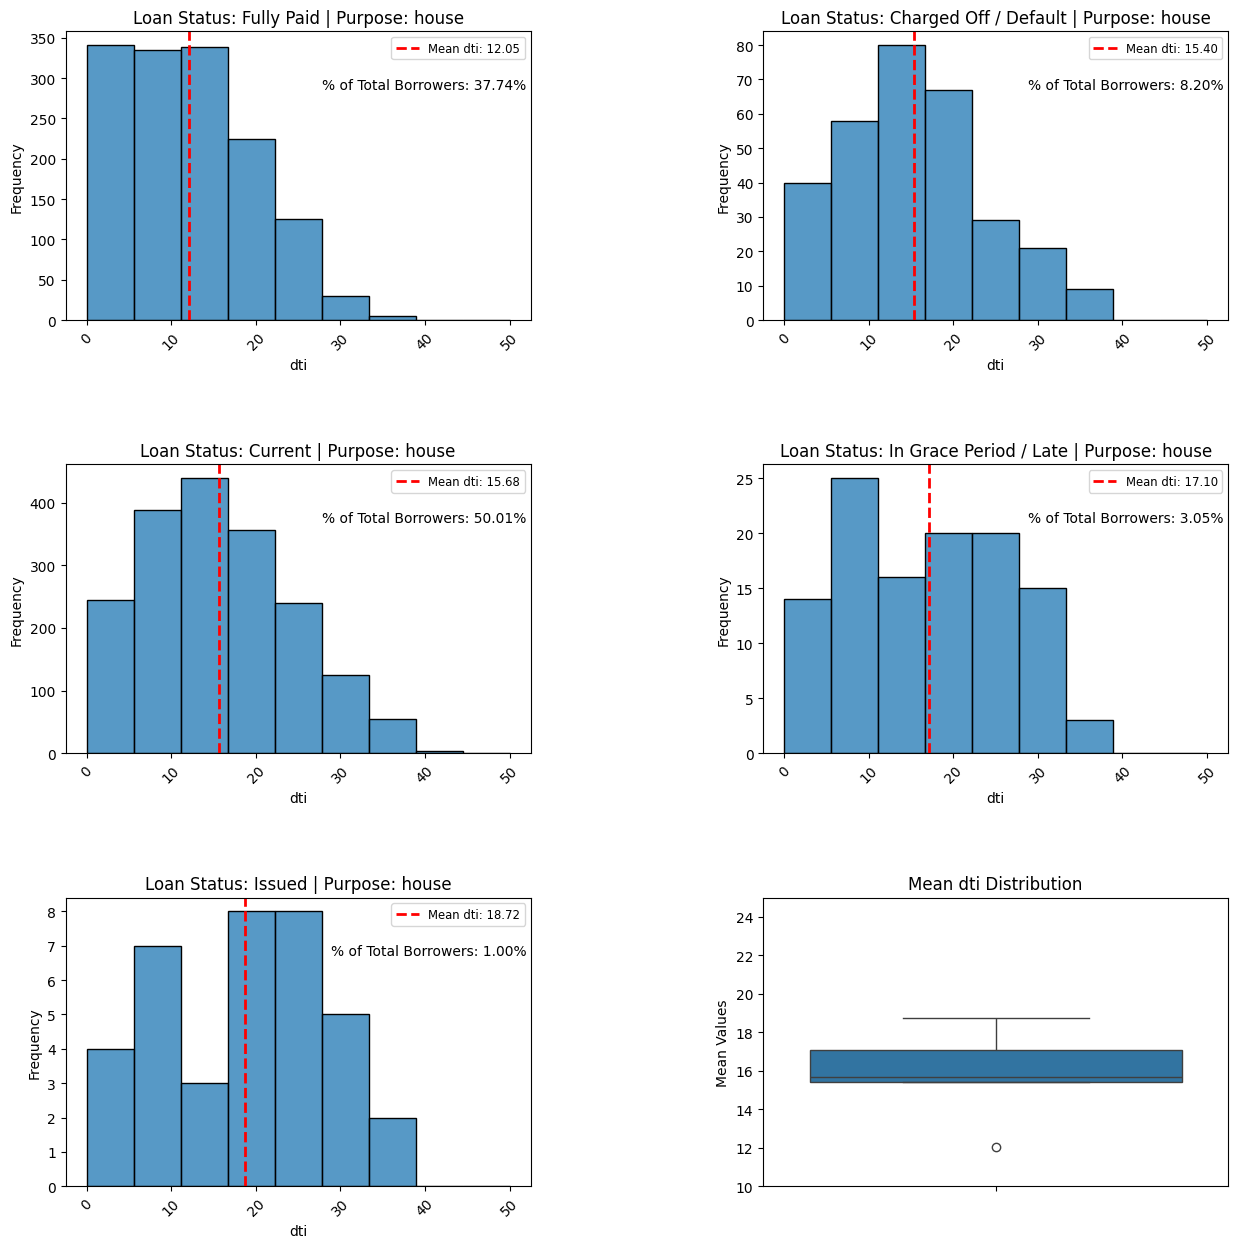

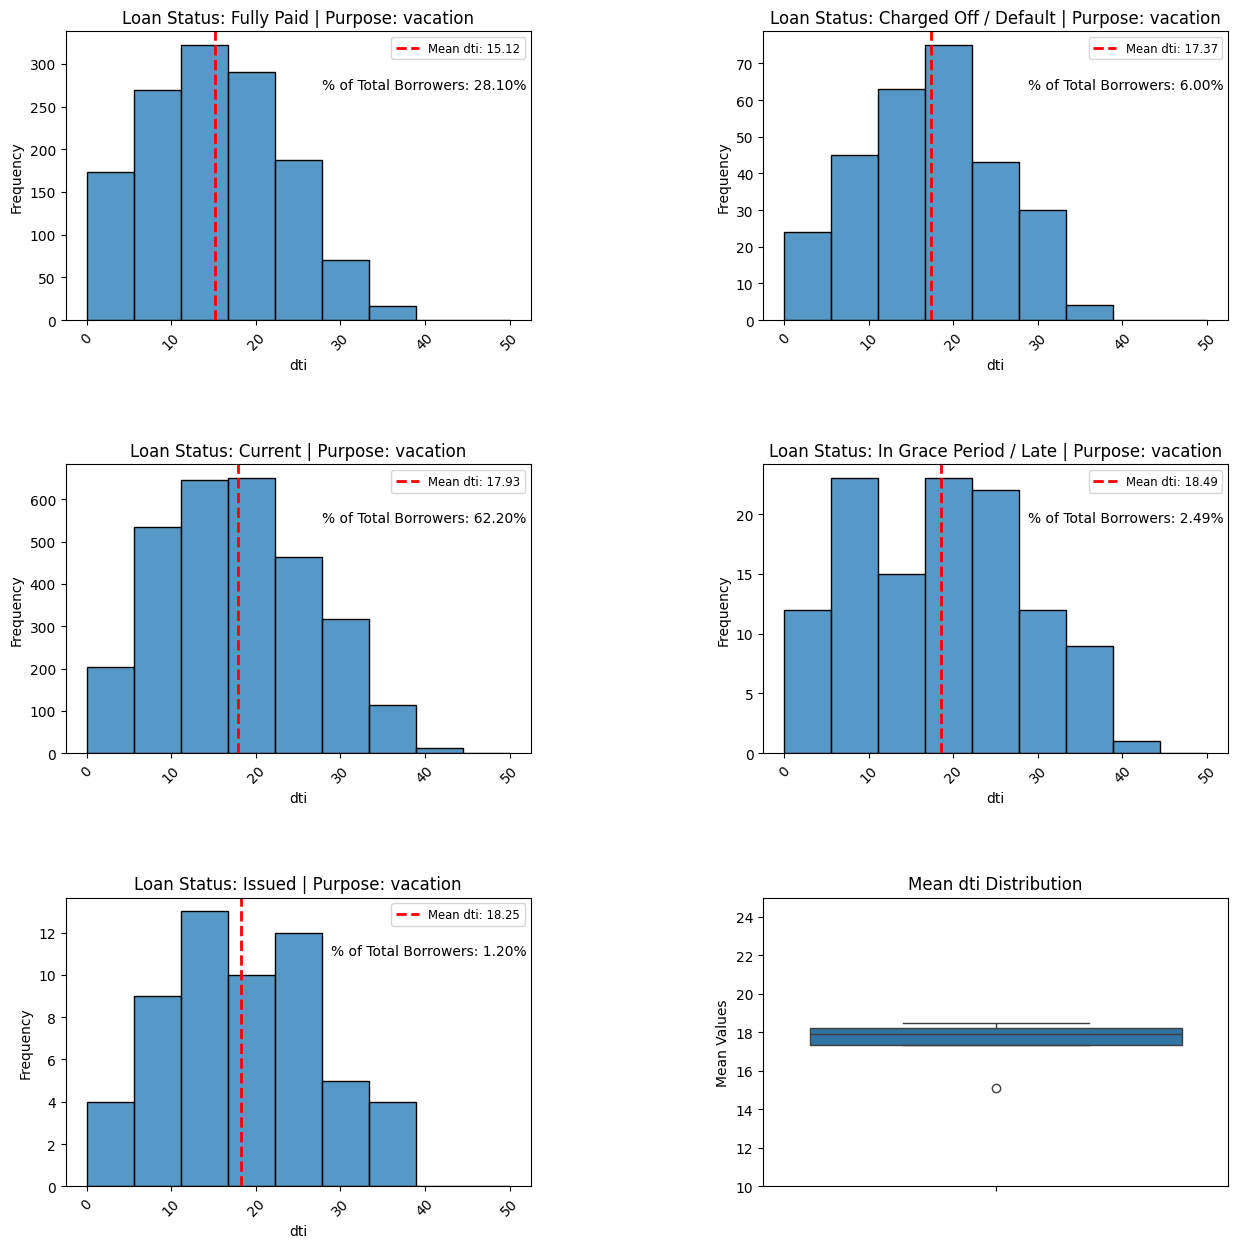

This subset is empty: 
Status: Issued
Purpose: wedding



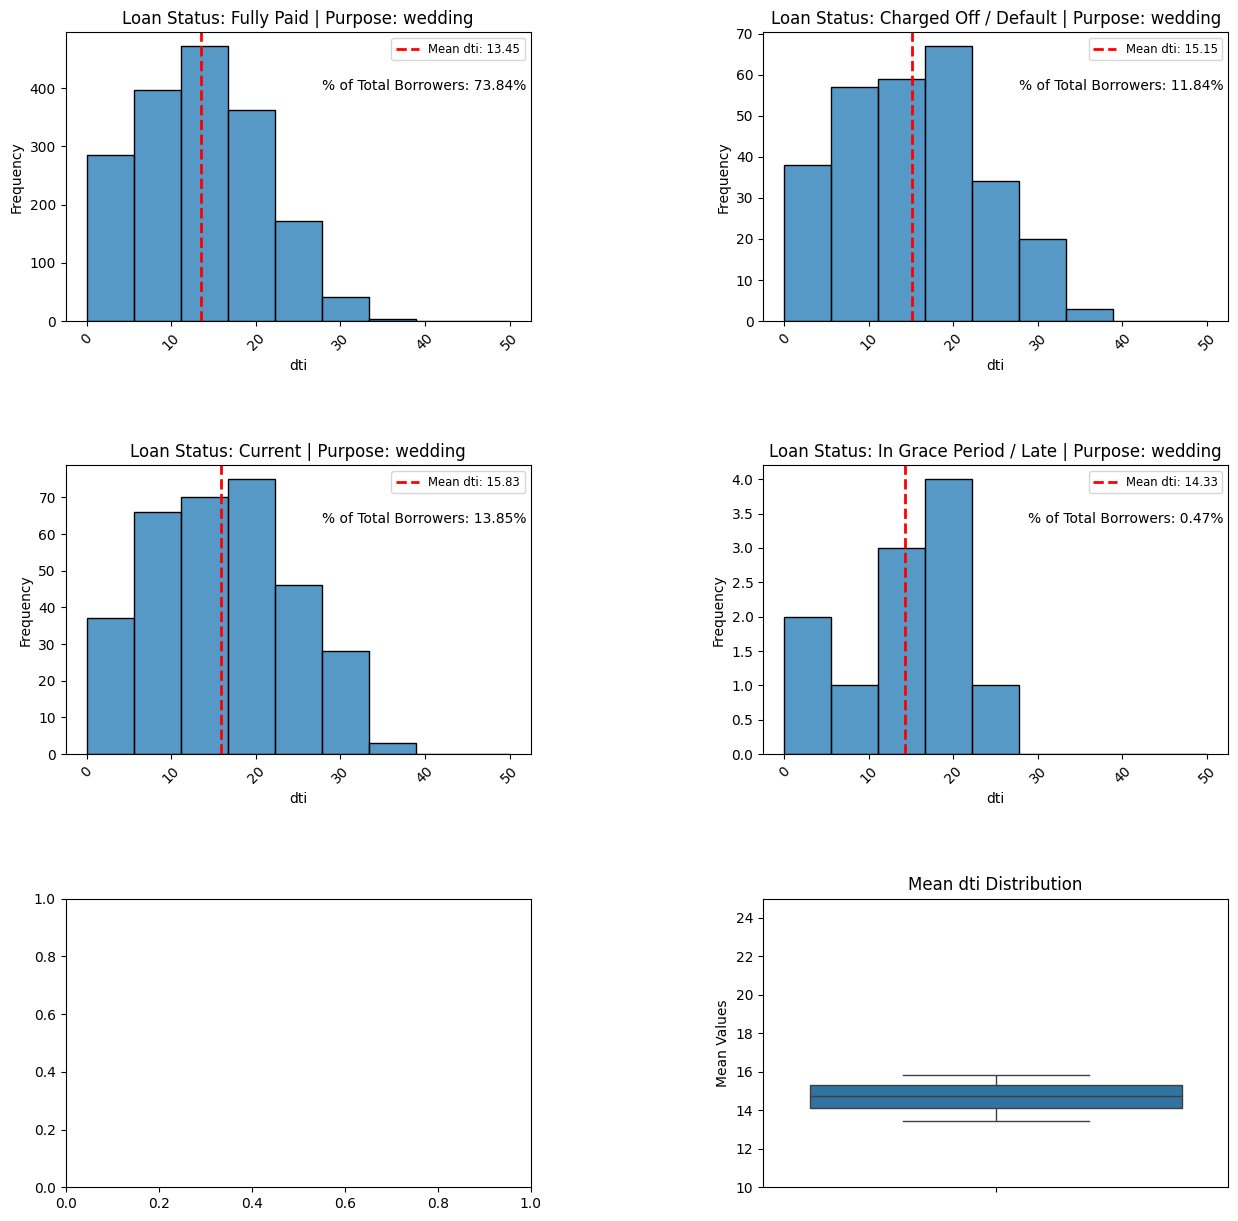

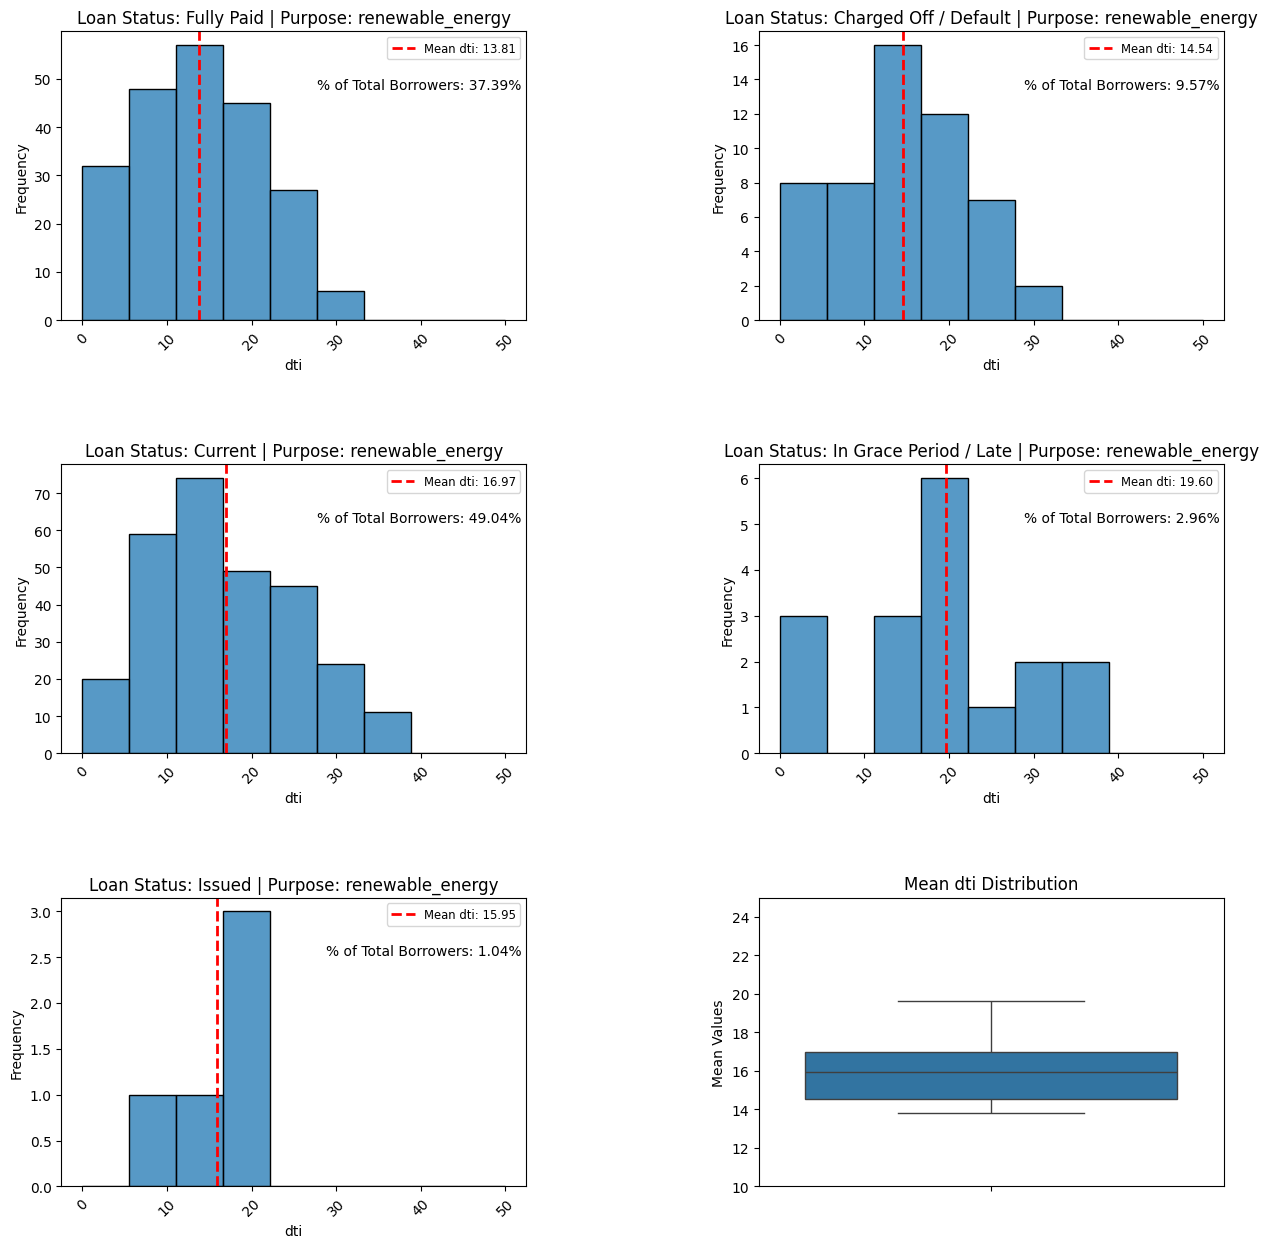

In [19]:
# Calling the function to make all income distributions for Loan Status and Loan Purpose
for purpose in purposes:
    feature_visualization("dti", dti_df, statuses, [purpose], calculate_total_individuals("dti", dti_df, statuses, [purpose], True), 50, 10, 25, True)

### Employment Length

#### Cleaning

In [20]:
# Clean emp_length column
emp_length_df = clean_feature_and_groupers("emp_length", "purpose", "loan_status" )

Nulls in emp_length: 0
Nulls in purpose: 0
Nulls in loan_status: 0


In [21]:
# Factorize Employment Length
employ_map = {
    "< 1 year" : 0,
    "1 year" : 1,
    "2 years" : 2,
    "3 years" : 3,
    "4 years" : 4,
    "5 years" : 5, 
    "6 years" : 6,
    "7 years" : 7, 
    "8 years" : 8,
    "9 years" : 9,
    "10+ years" : 10
}

# Creating new factor feature for emp_length
emp_length_df["factorized_emp_length"] = emp_length_df["emp_length"].map(employ_map).astype("int")

# Checking that I converted everything
print(emp_length_df["factorized_emp_length"].isnull().sum())

0


#### Employment Length Distribution by Loan Status and Loan Purpose

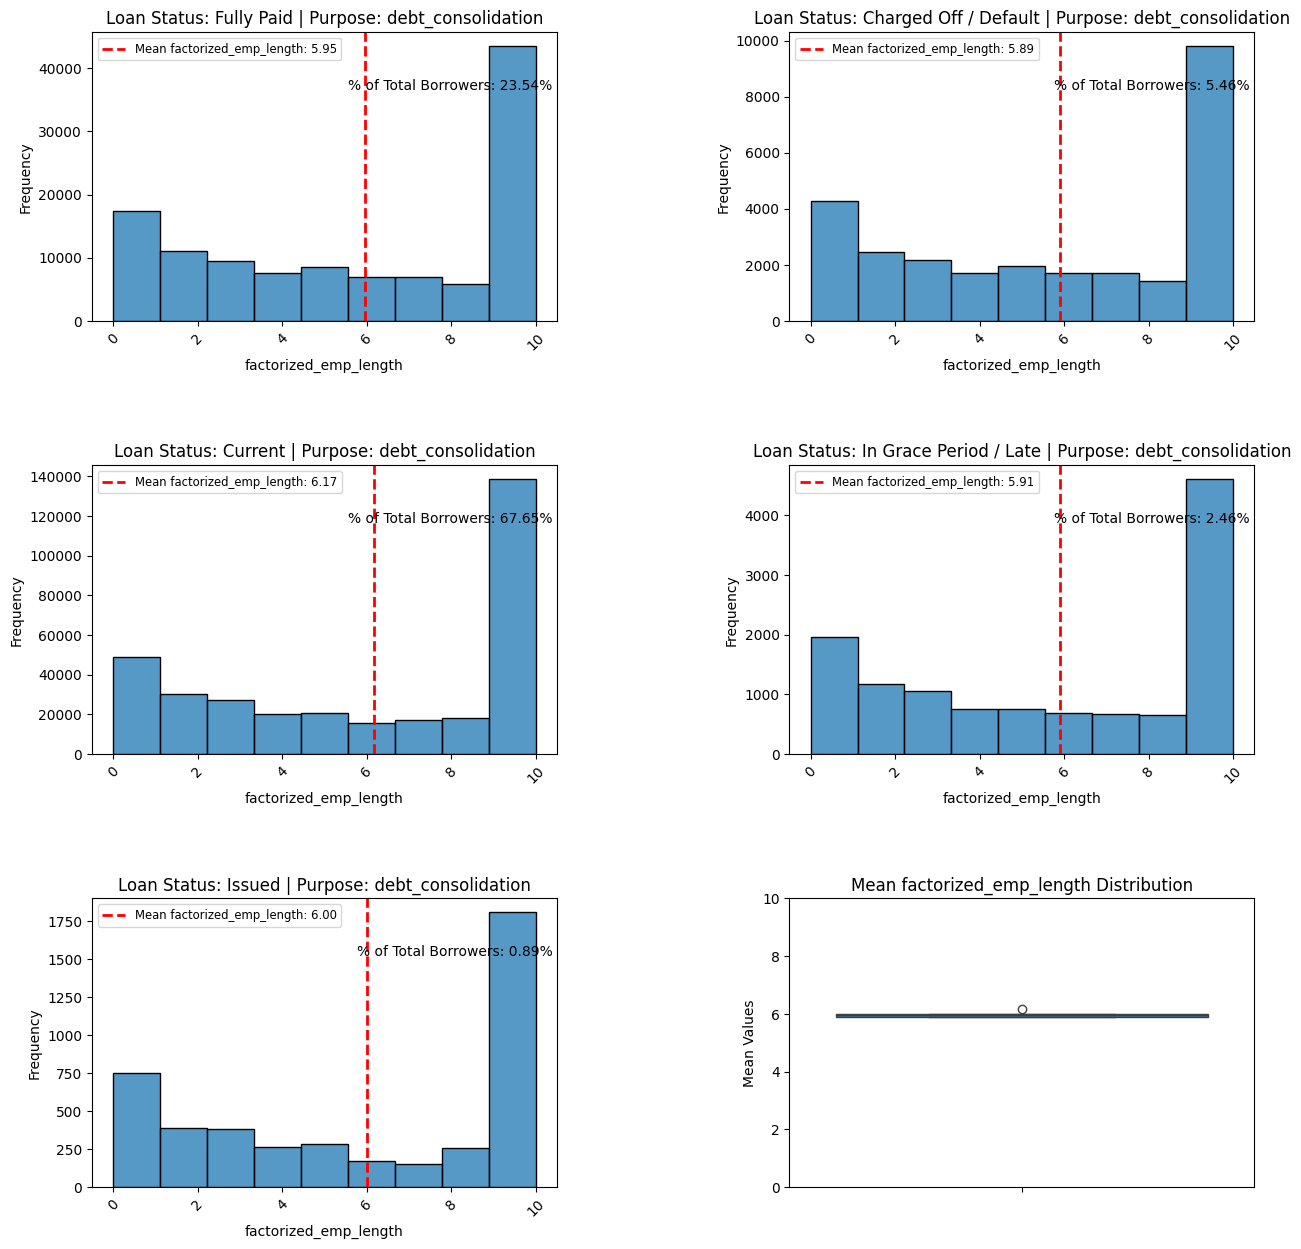

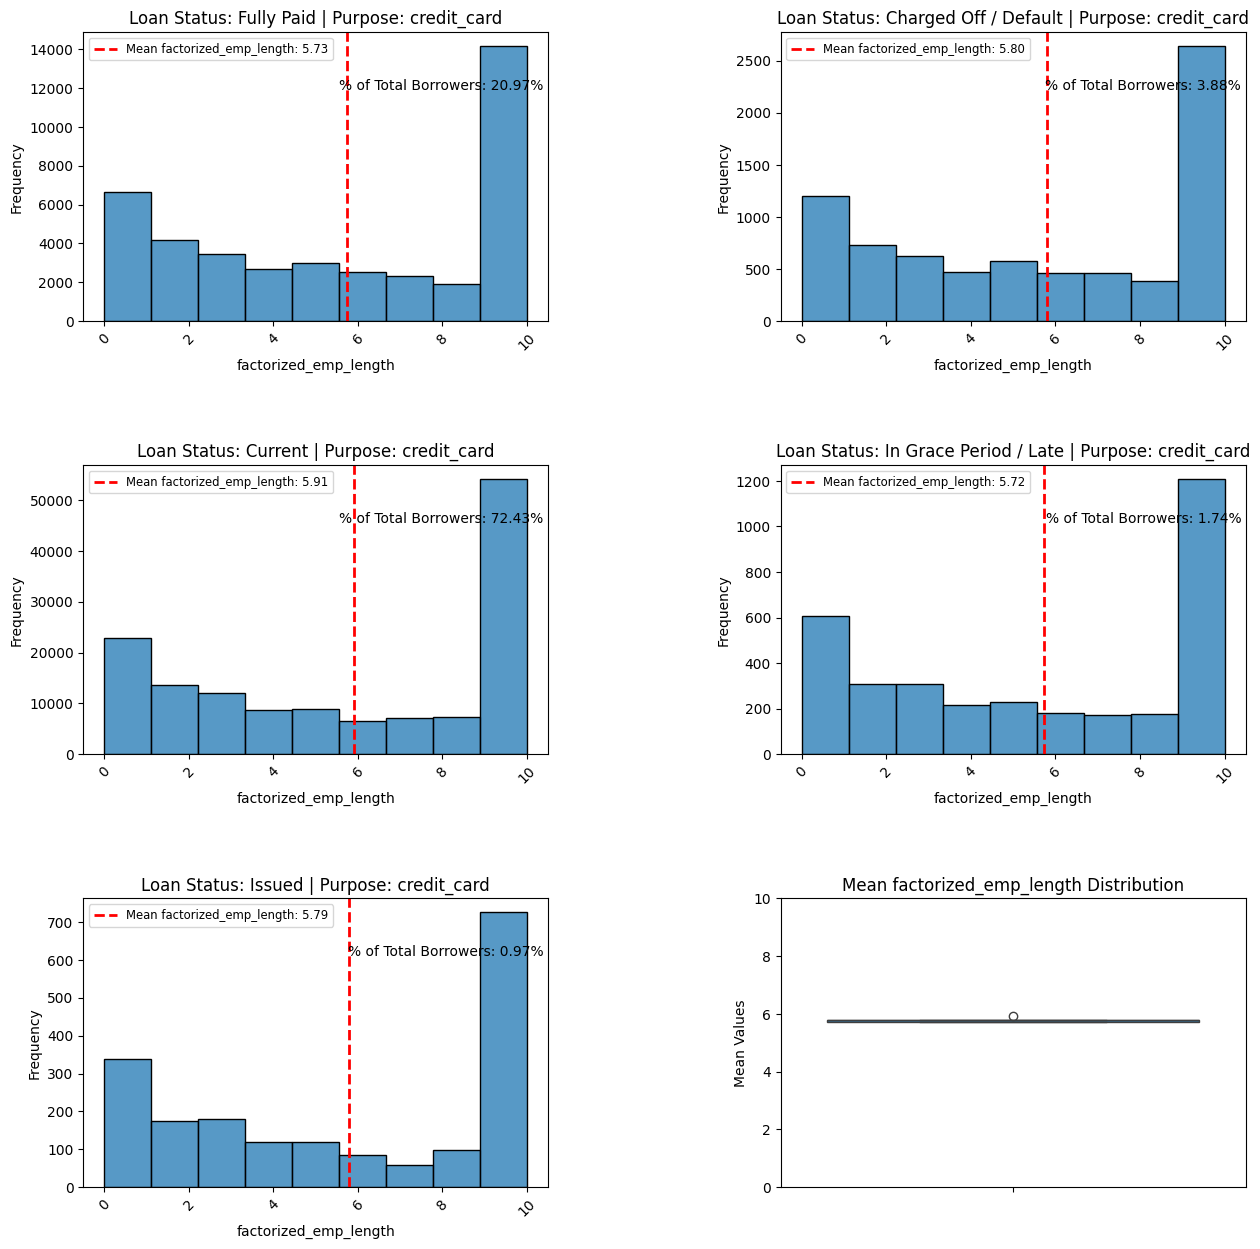

This subset is empty: 
Status: In Grace Period / Late
Purpose: educational

This subset is empty: 
Status: Issued
Purpose: educational



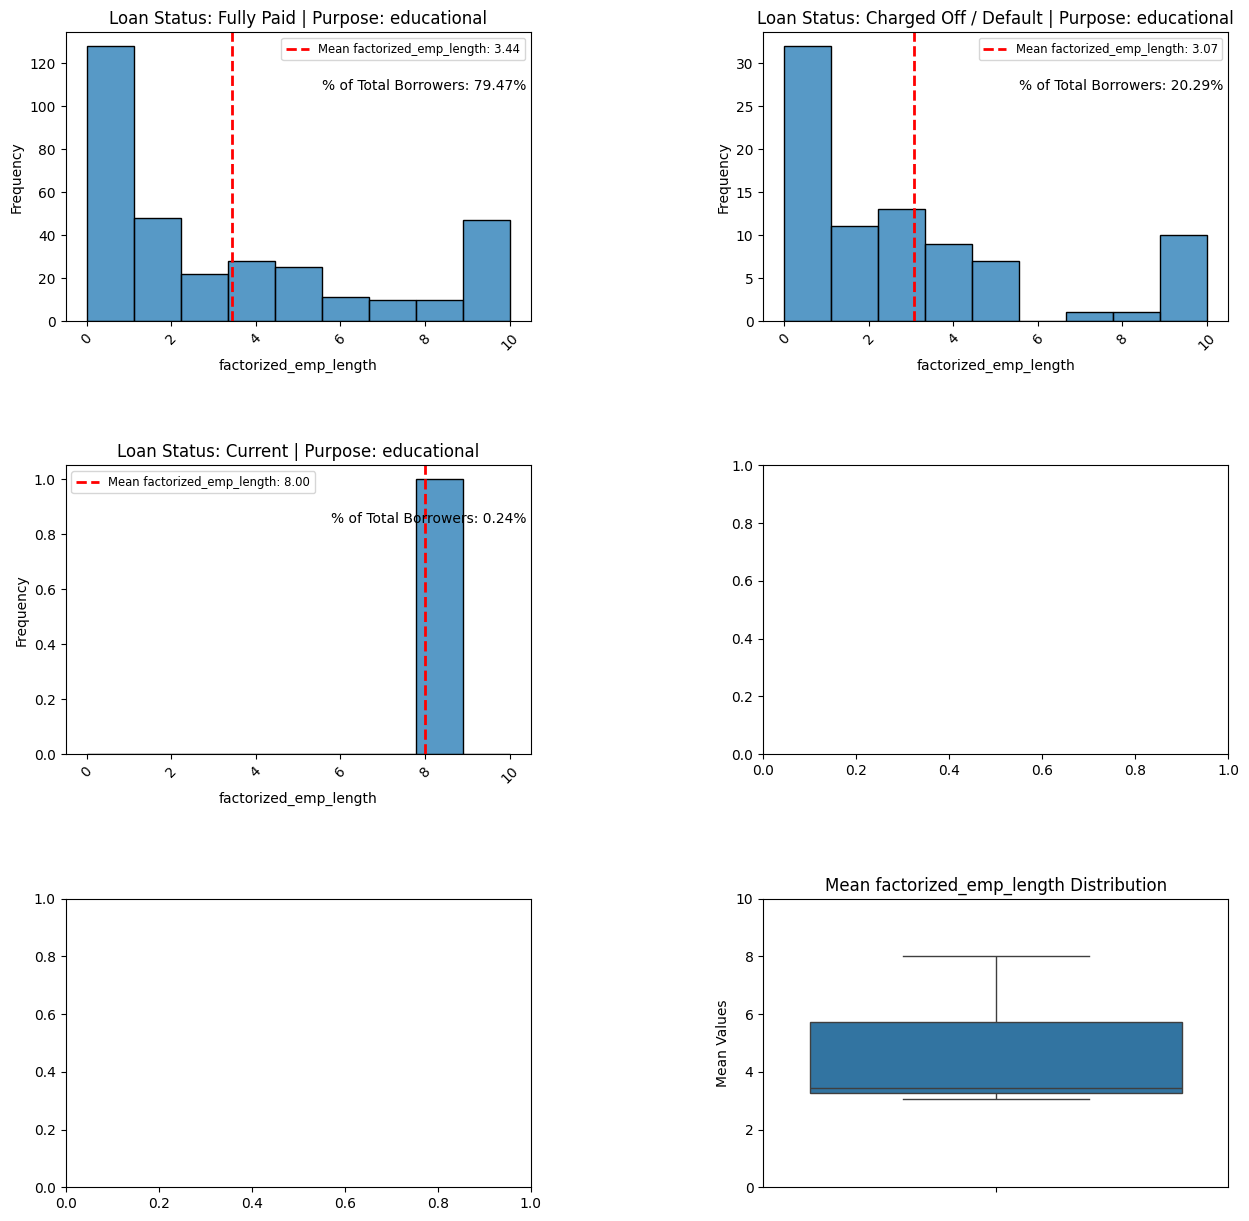

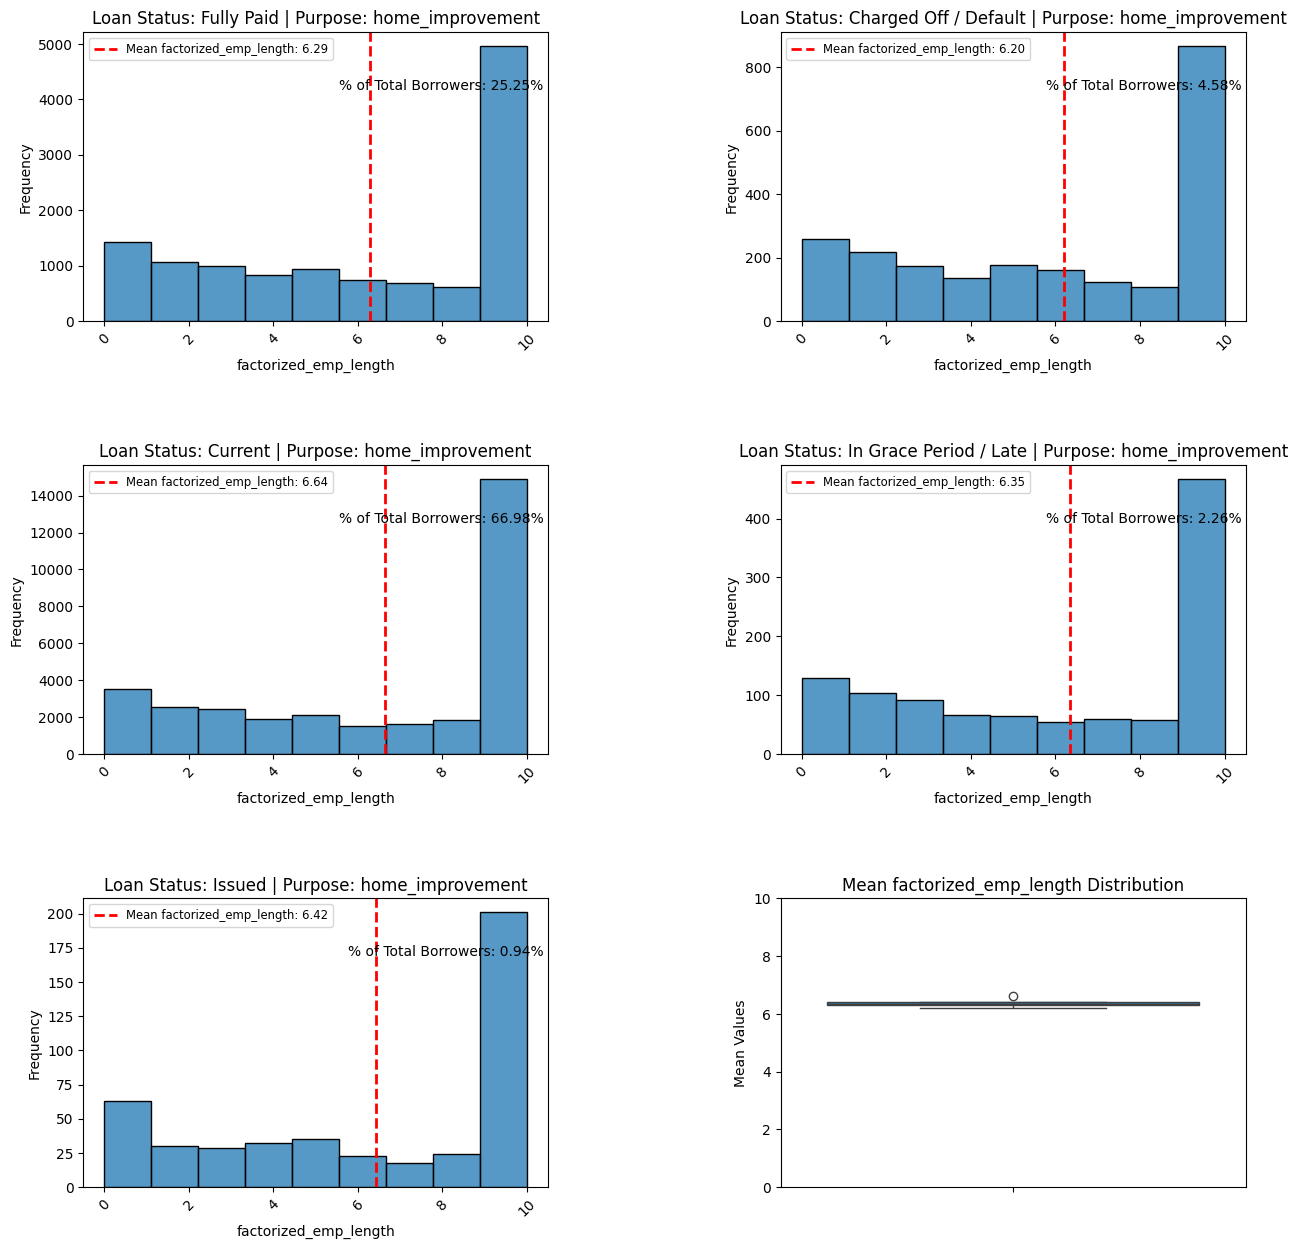

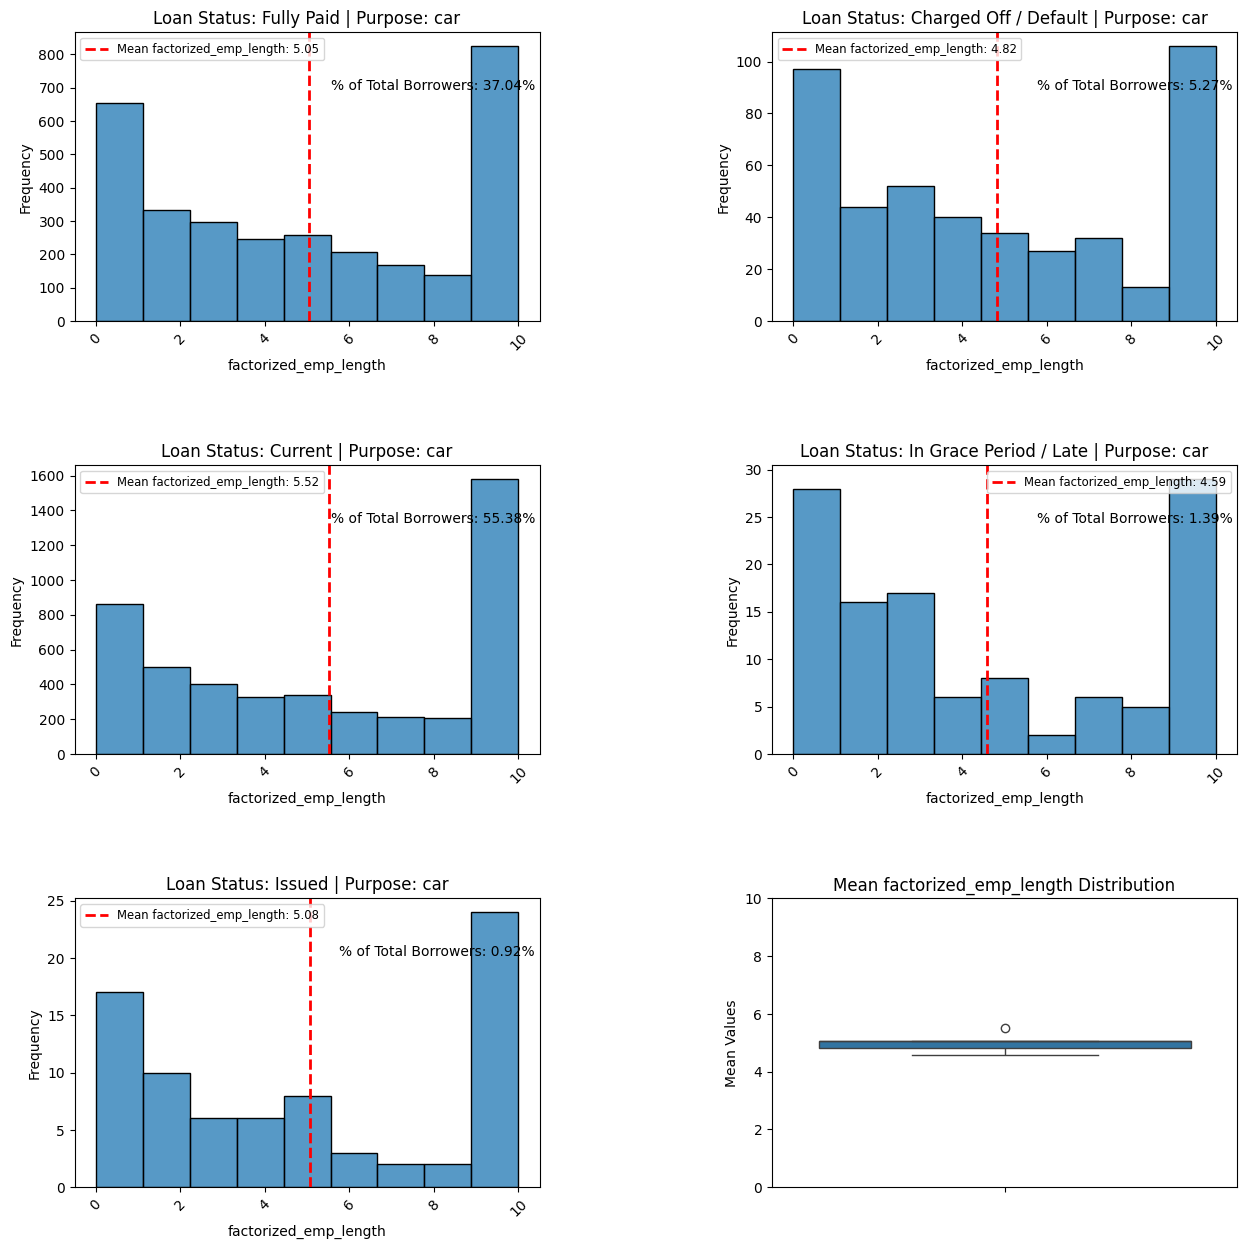

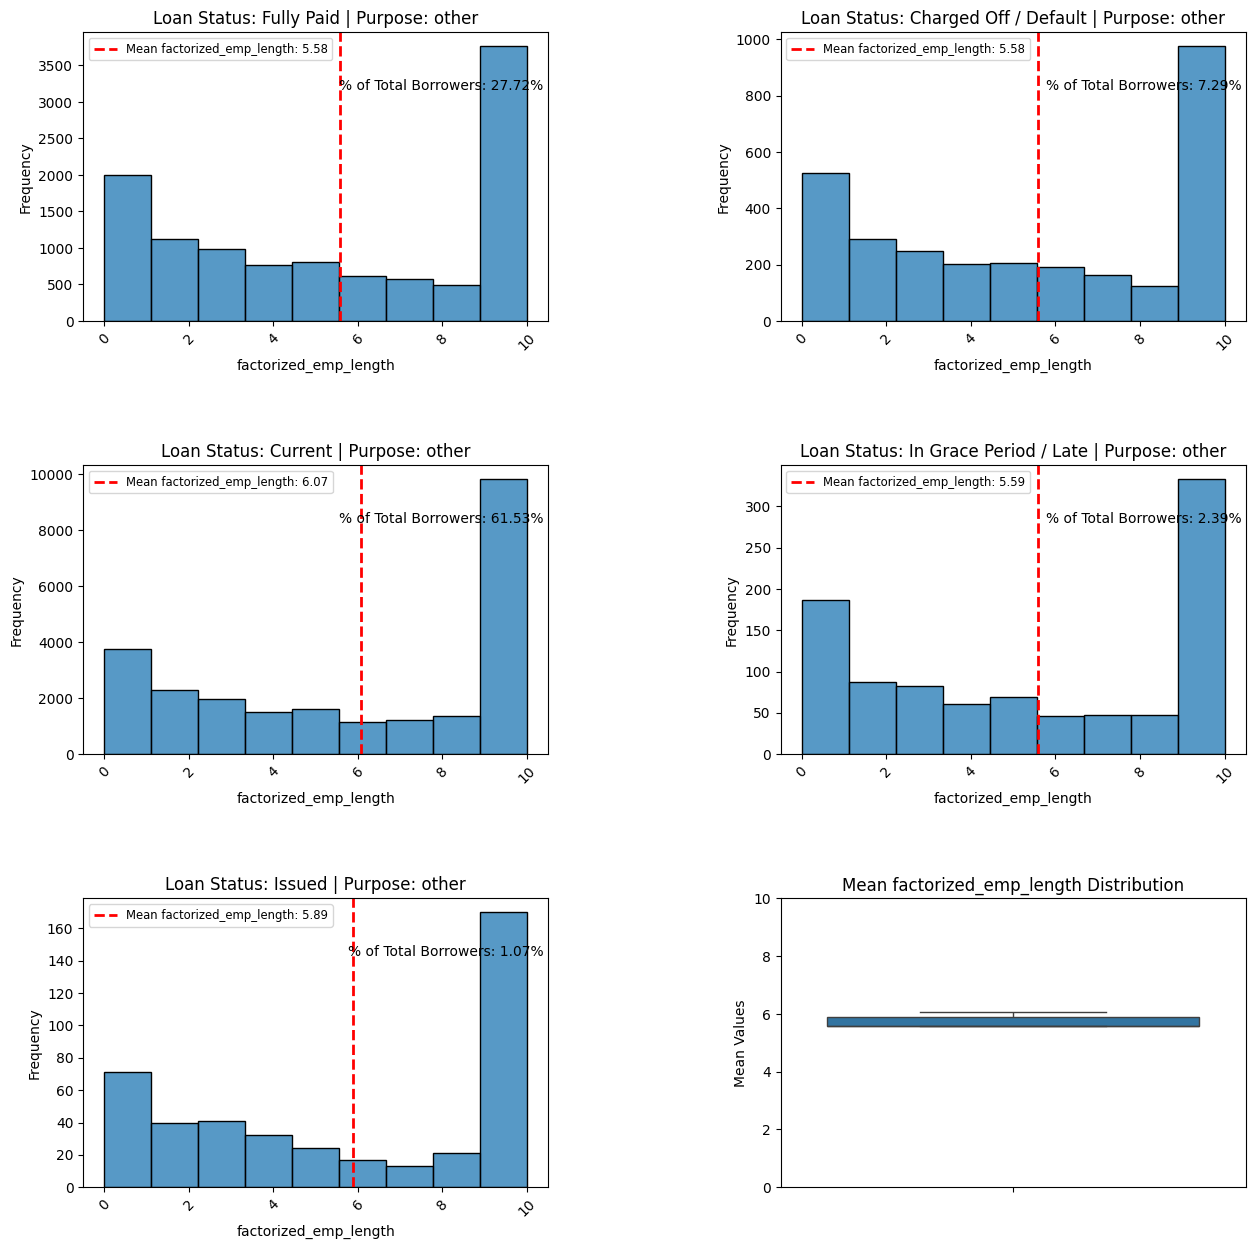

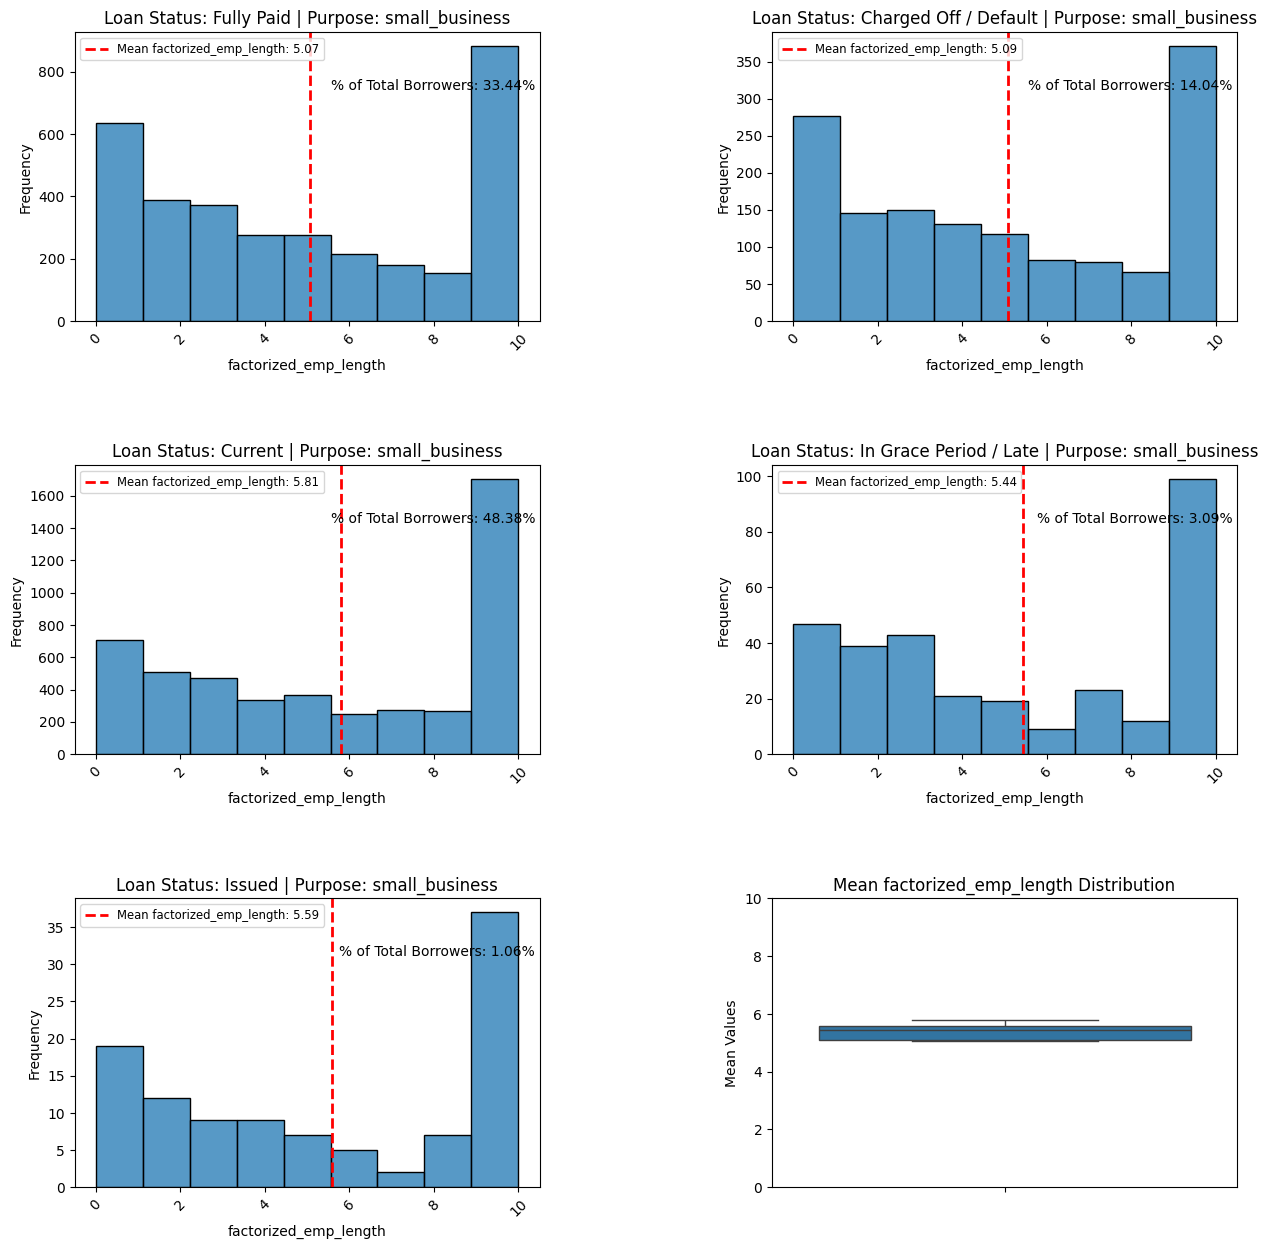

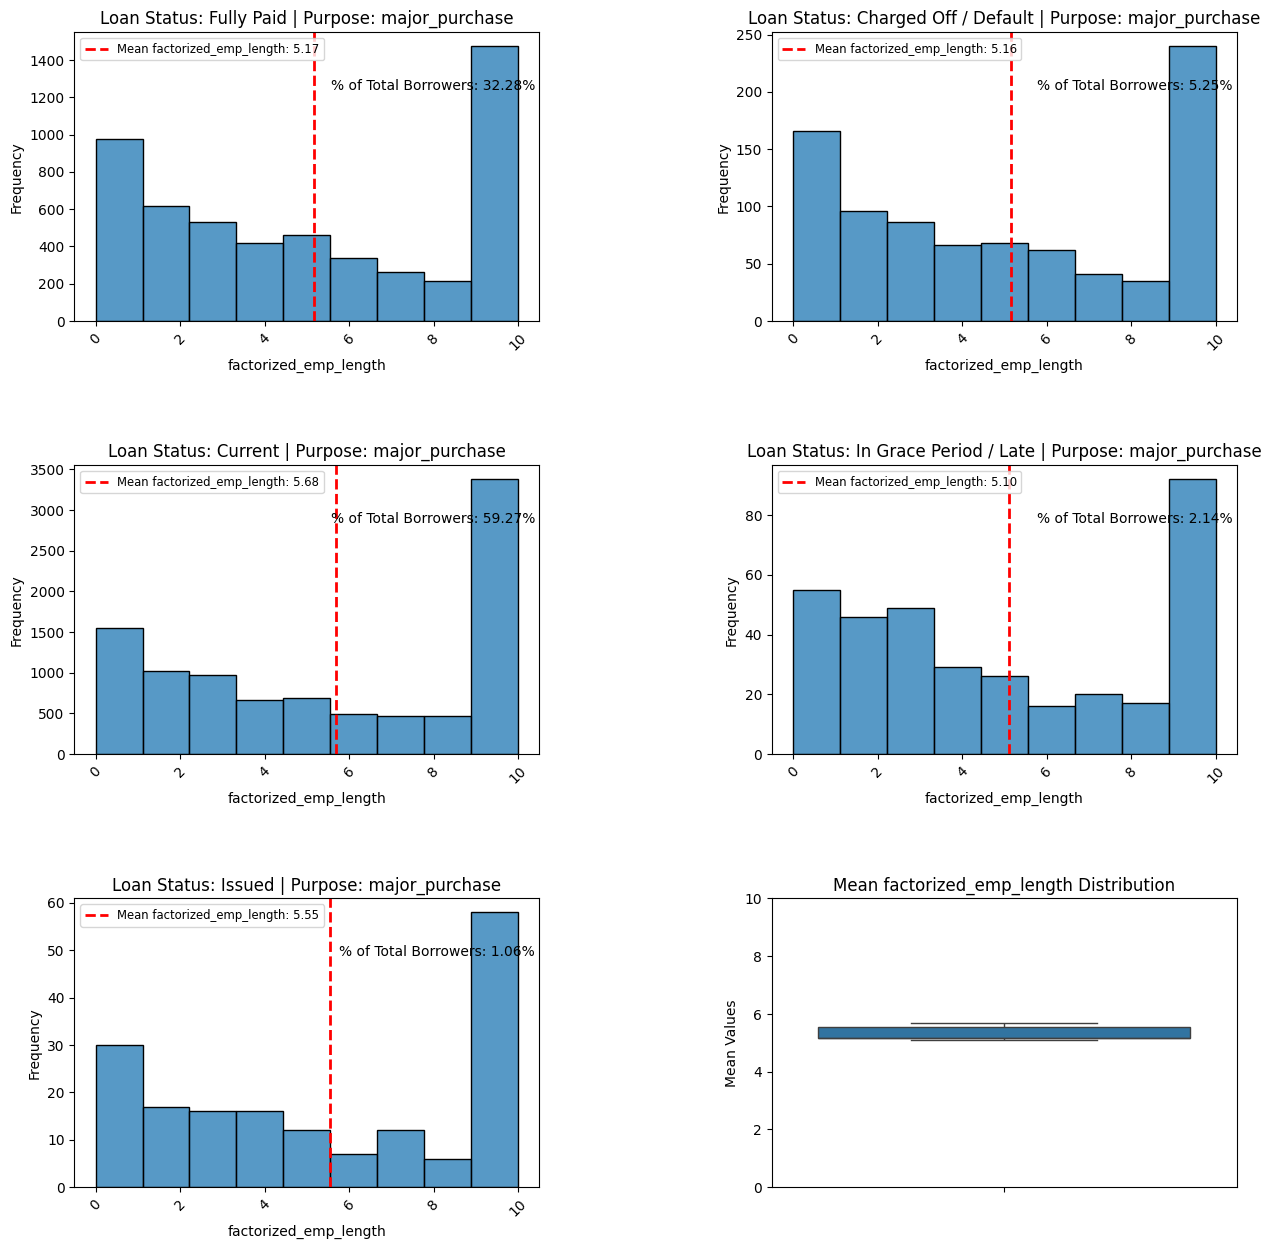

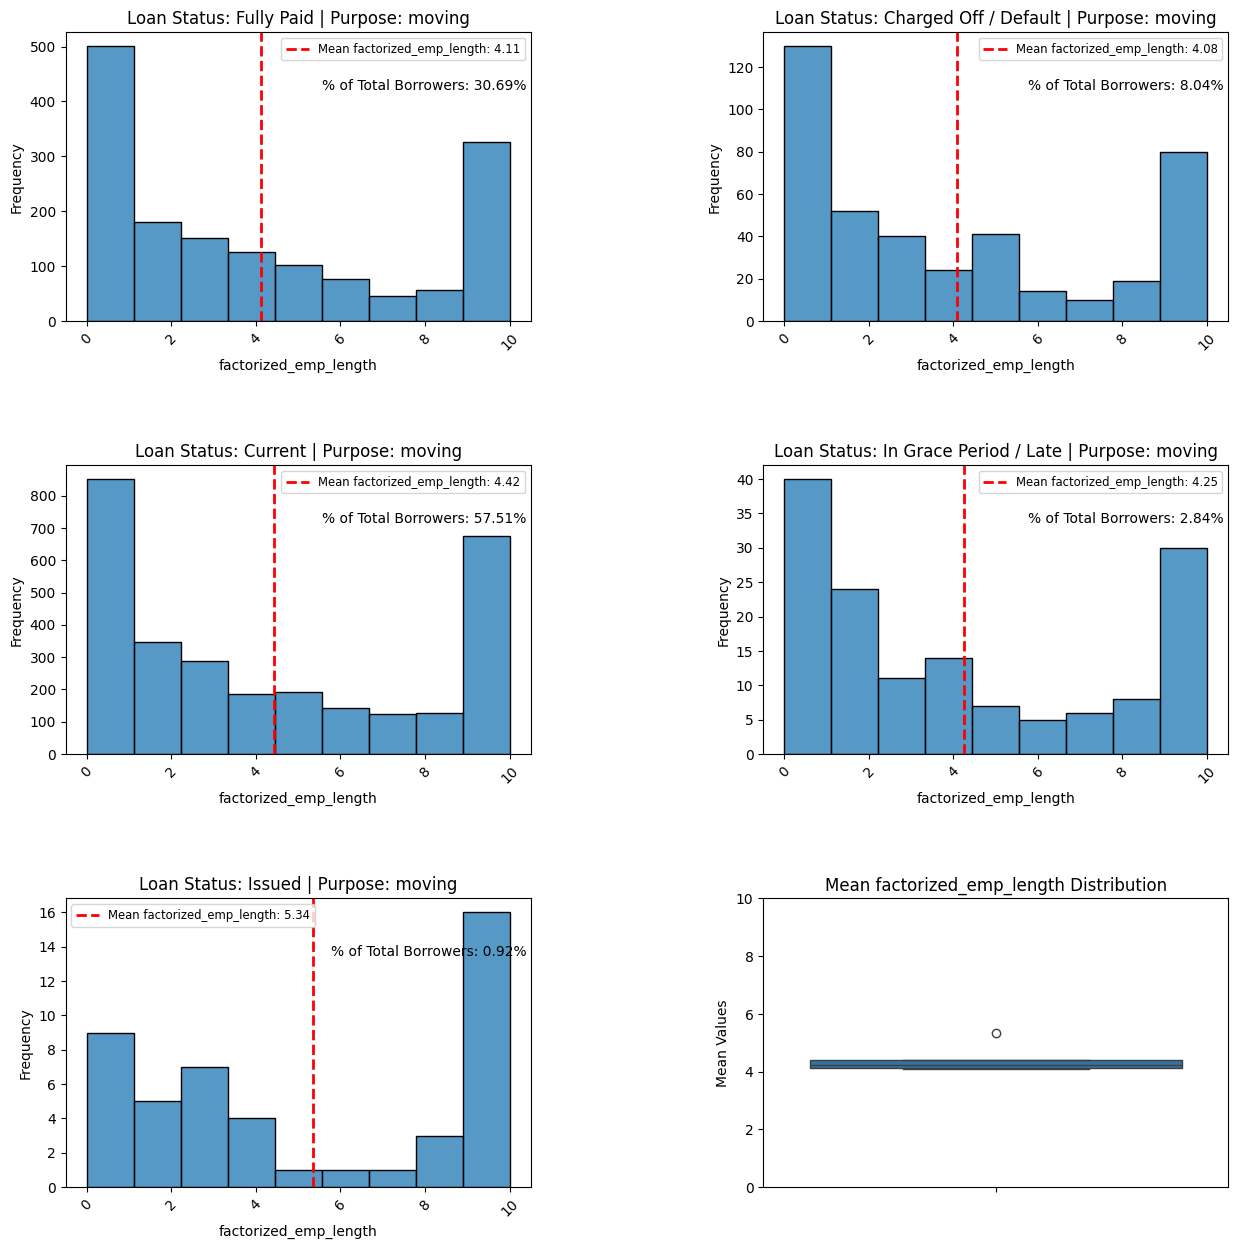

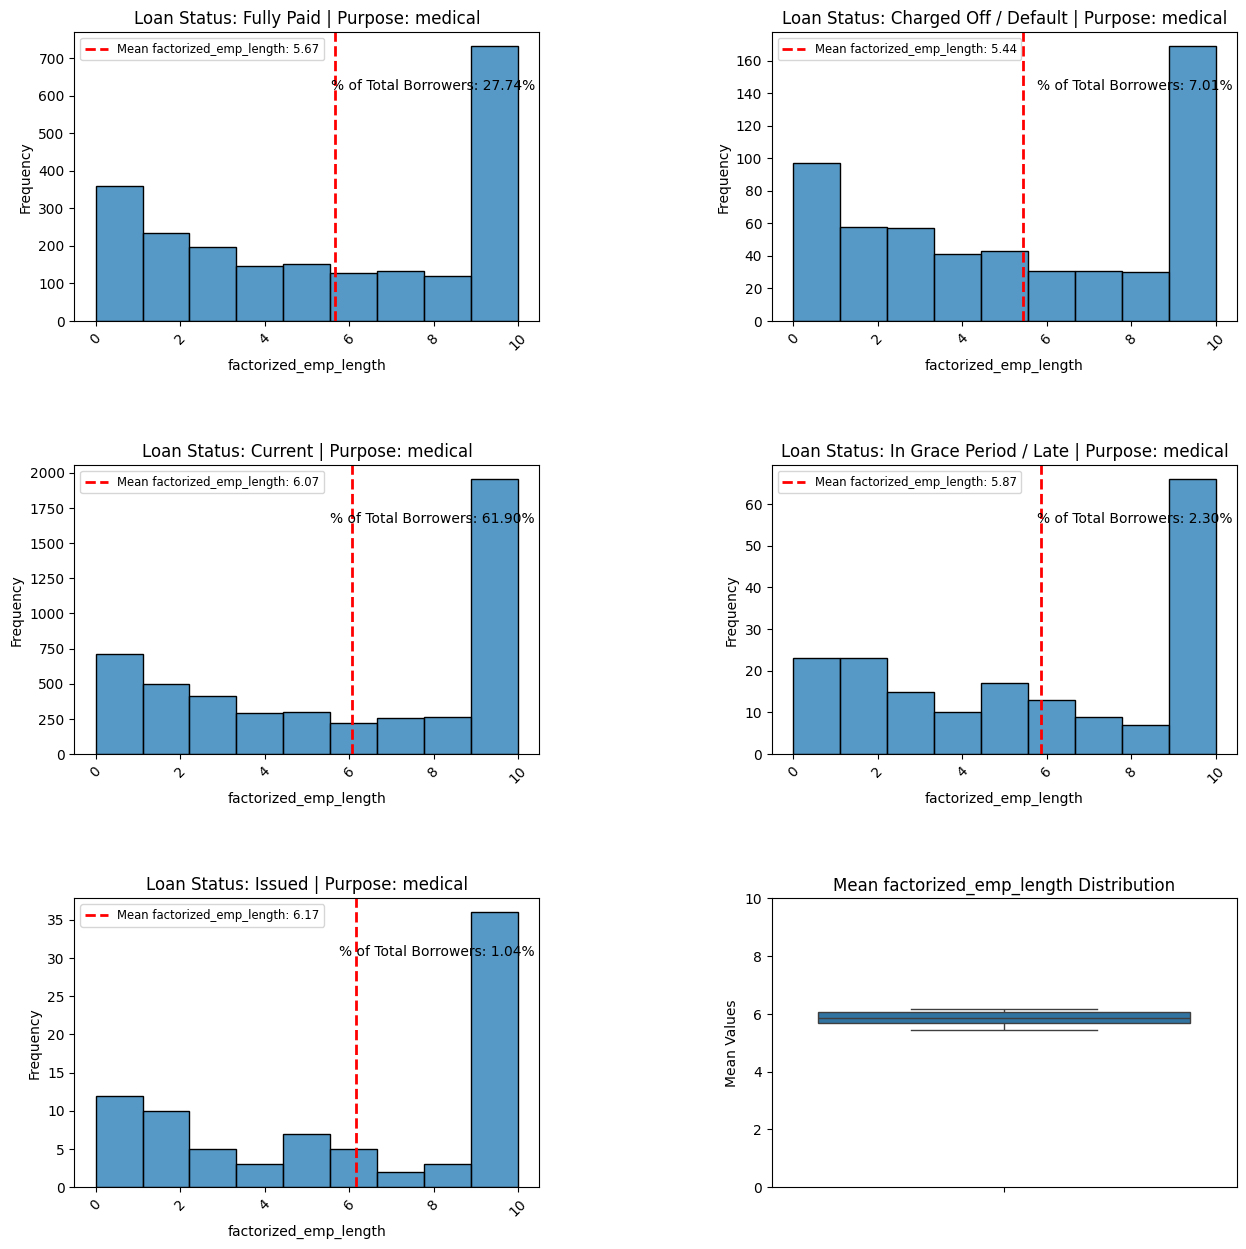

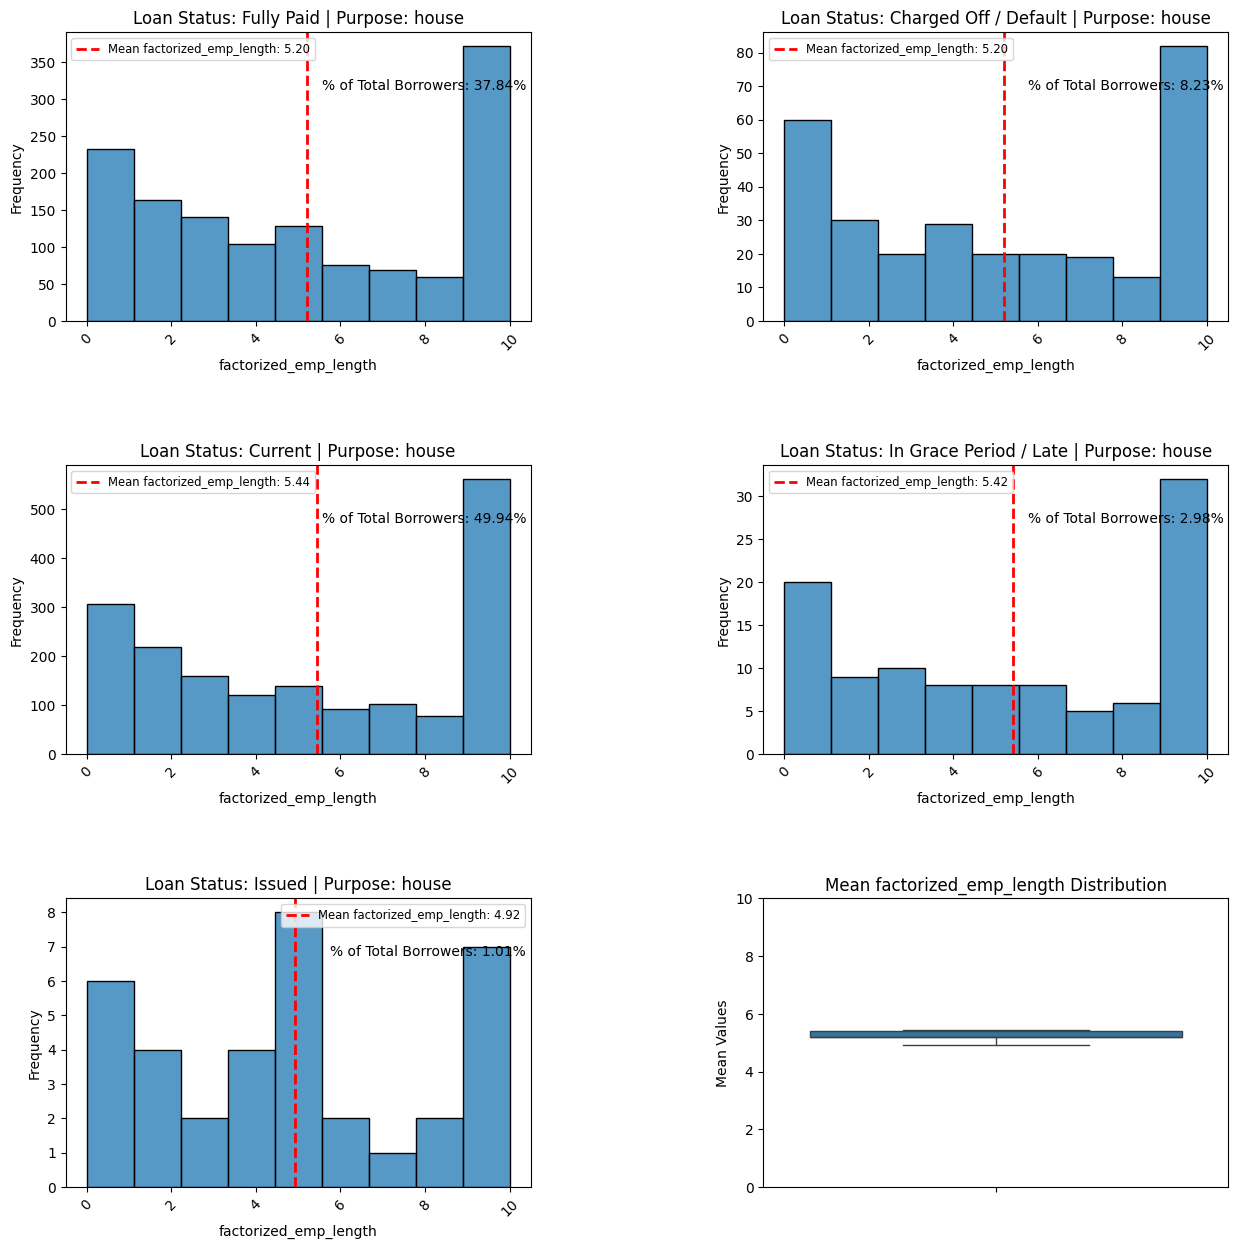

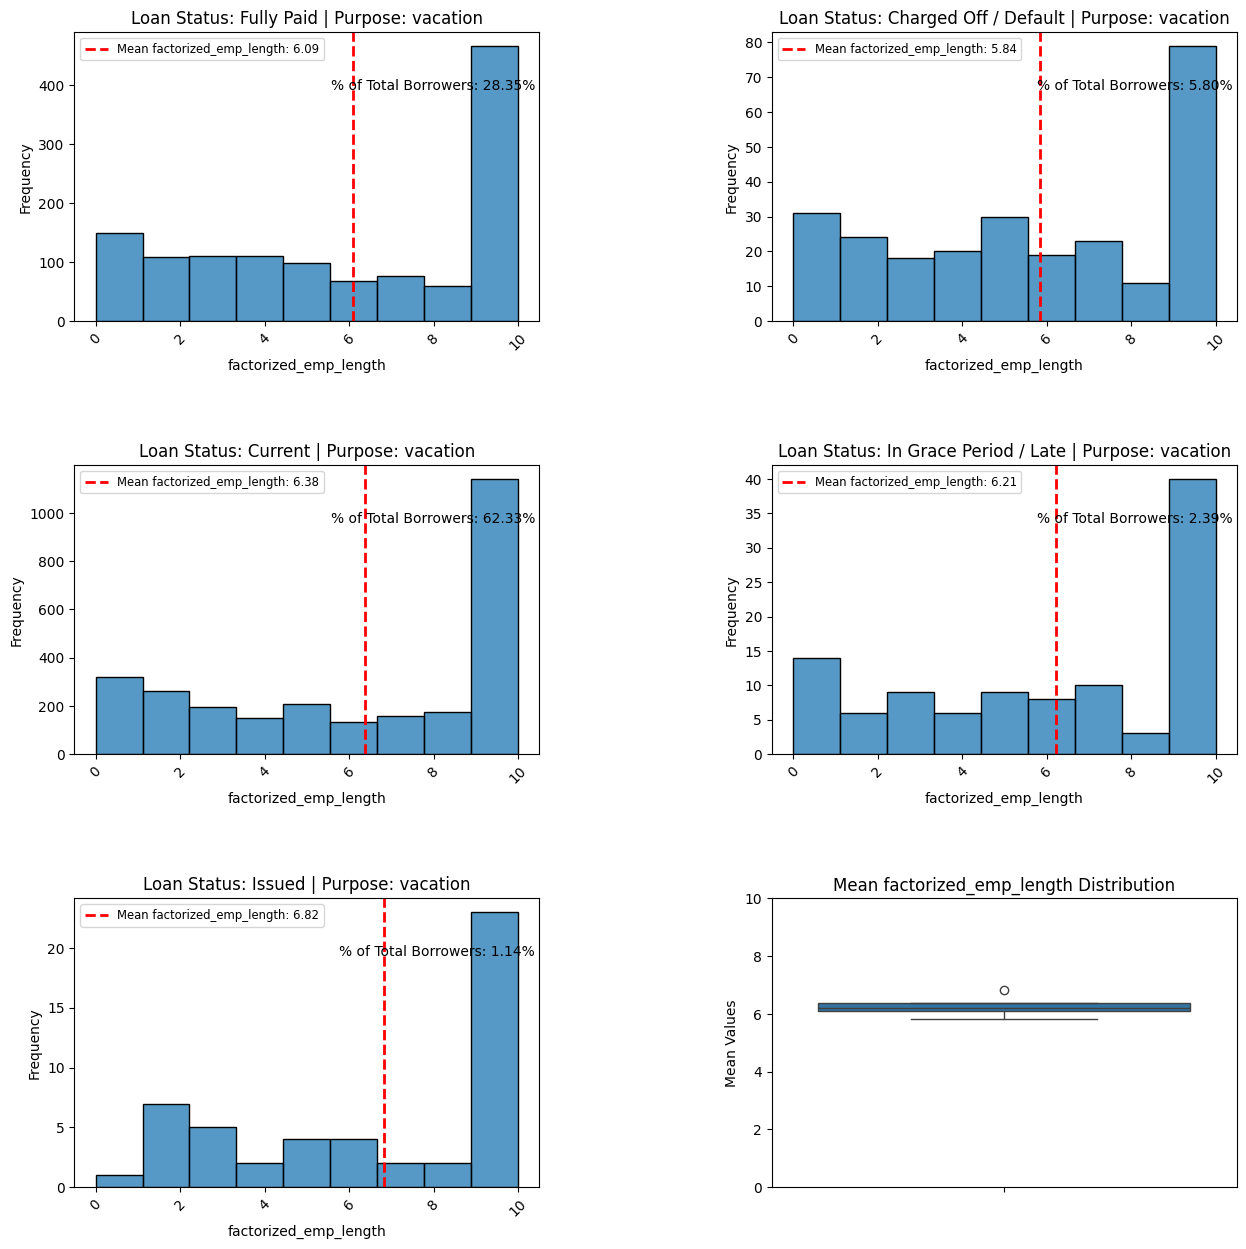

This subset is empty: 
Status: Issued
Purpose: wedding



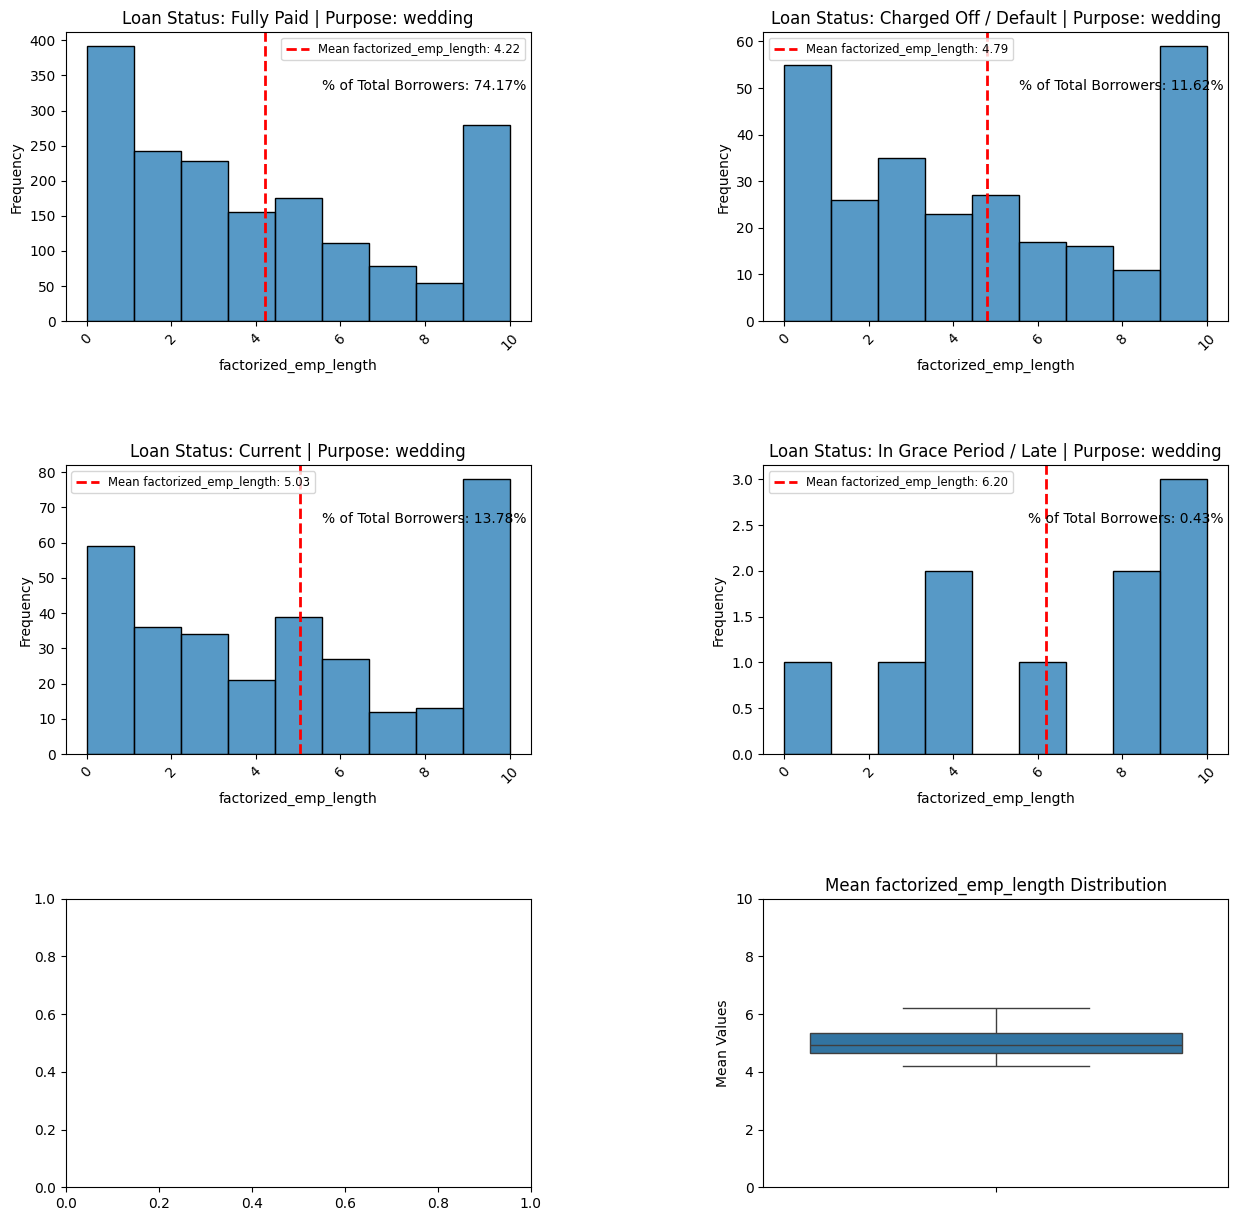

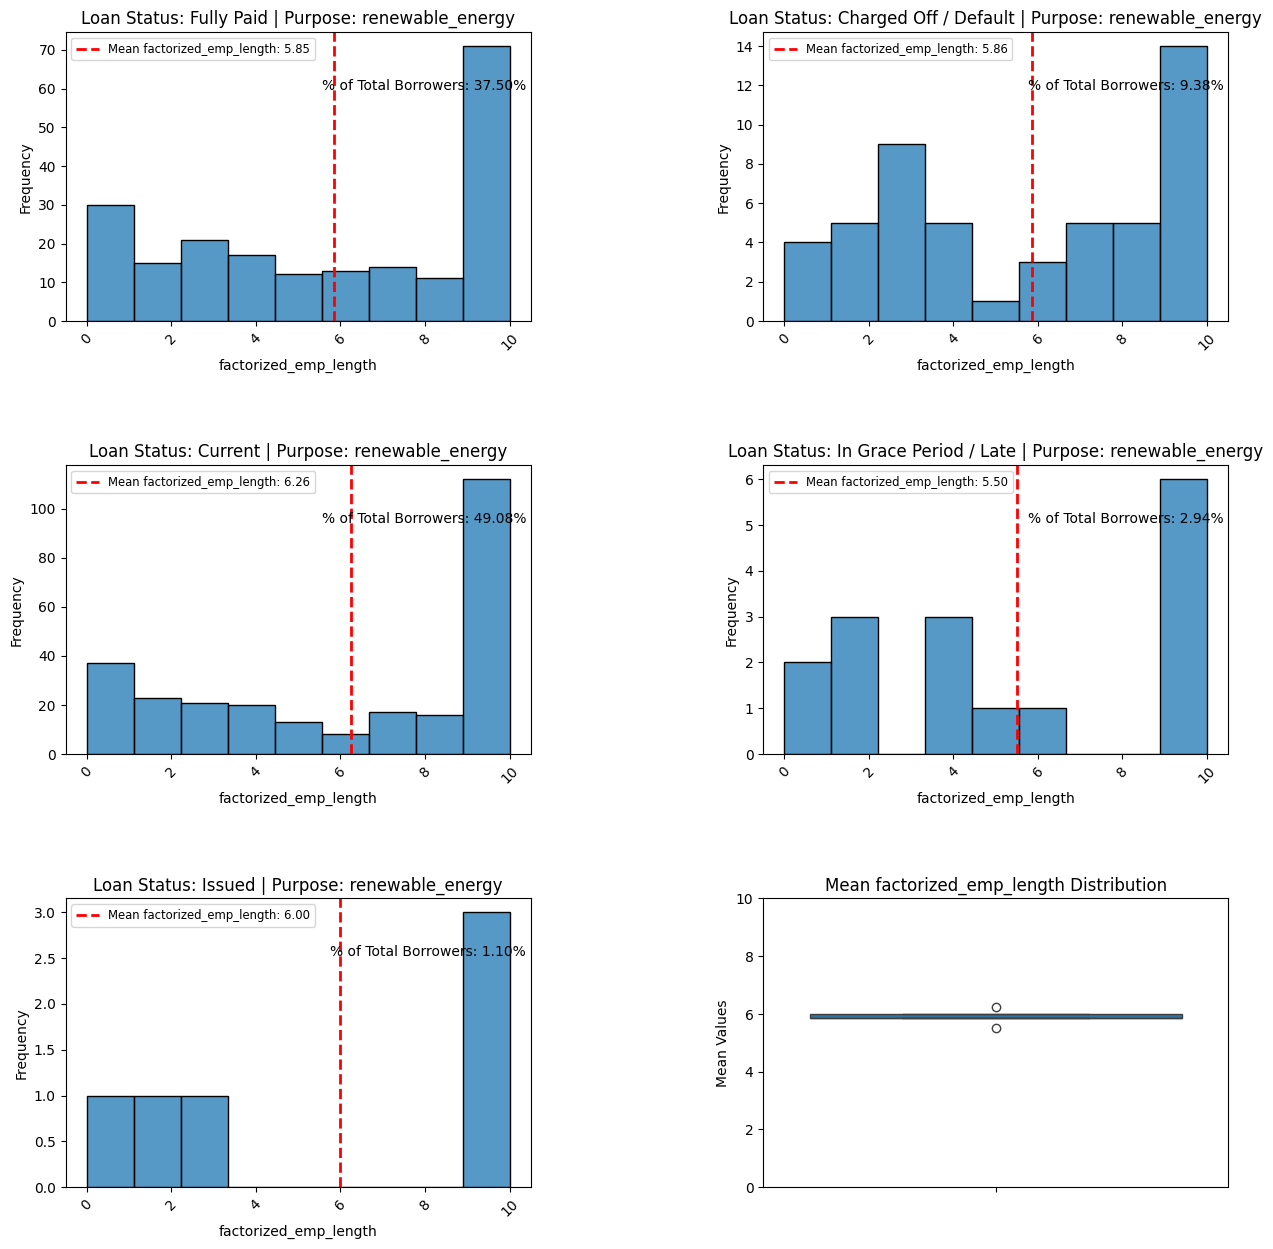

In [22]:
# Calling the function to make all employment length distributions for Loan Status and Loan Purpose
for purpose in purposes:
    feature_visualization("factorized_emp_length", emp_length_df, statuses, [purpose], calculate_total_individuals("factorized_emp_length", emp_length_df, statuses, [purpose], False), 10, 0, 10, False)